# A/ Présentation des Variables

### **Les variables de région et de date**

*   Les colonnes *Code INSEE région* et *Région* fournissent des informations sur les régions concernées par les relevées énergétiques ;
*   Les colonnes *Date*, *Heure* et *Date - heure* indiquent le moment où les relevés énergétiques ont été réalisés.

### **La variable Nature**

La variable Nature correspond aux "Données consolidées" et "Données définitives".
* Données consolidées : les données ont été vérifiées et complétées (depuis Janvier 2021 au 30 Novembre 2021),
* Données définitives : tous les partenaires ont transmis et vérifié l'ensemble des comptages  (Janvier 2013 à Décembre 2020)


### **La variable de consommation d'énergie**

La colonne 'Consommation' indique la consommation d'énergie réalisée selon la région relevée à un moment précis.

Le comptage se réalise chaque 1/2H.

### **Les différentes variables de production d'énergie - mix énergétique**

Le comptage se réalise chaque 1/2H : 

***Nucléaire (MW)***

énergie produite par le parc nucléaire Français

***Thermique (MW)***

Les filère relatives aux moyens de production d’énergie avec du gaz, fioul et  énergies fossiles (charbon)

***Eolien (MW)***

énergie produite par le parc éolien Français

***Solaire (MW)***

La filière solaire représente la puissance électrique produite par l’ensemble des panneaux photovoltaïques (parcs de production et productions diffuses).

***Hydraulique (MW)***

La filière Hydraulique comprend le fil de l’eau et l’éclusé, les lacs et les stations de transfert d’énergie pour pompage/turbinage (STEP turbinage).

***Bioénergies (MW)***

La filière Bioénergies comprend les biogaz, les biocombustibles solides (bois énergie et autres biocombustibles solides) et les déchets (ménagers et papetiers)


### **TCO (Taux de COuverture) et TCH (Taux de CHarge)**


***TCO (Taux de COuverture)***

Le Taux de COuverture est la part d'une filière de production d'énergie dans la consommation d'une région.

Il correspond à la production d'énergie / la consommation d'énergie d'une région.


***TCH (Taux de CHarge)***

Le Taux de CHarge est le volume de production de la filière de production d'énergie thermique par rapport à sa capacité de production installée et en service.

Il correspond au volume de la prodution d'énergie / la capacité de production d'énergie installée et en service.



---


***Pompage/STEP turbinage (MW)***

Installations hydroélectriques qui puisent aux heures creuses de l'eau dans un bassin inférieur afin de remplir une retenue en amont (lac d'altitude). L'eau est ensuite turbinée aux heures pleines pour produire de l’électricité.

Le comptage se réalise chaque 1/2H.

***Ech. physiques***

Il s'agit du solde des échanges avec les régions limitrophes.

Le comptage se réalise chaque 1/2H.

*À noter que les variables 'Pompage' et 'Ech. physiques' peuvent prendre des valeurs négatives.
En effet, (1) une station de pompage peut consommer de l'électricité en heure creuse et (2) une région peut transférer plus d'énergie qu'elle va en recevoir.*


# B/ Dataset initial

In [253]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn import model_selection
from sklearn.linear_model import LinearRegression

from sklearn import ensemble
from sklearn import svm
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, LassoCV

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.api import anova_lm

from scipy import stats


In [255]:
df_energy = pd.read_csv('/content/drive/MyDrive/DA - Projet Energie/Datasets/eco2mix-regional-cons-def.csv', sep =';')
   

In [256]:
df_energy.shape

(1875456, 28)

In [257]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875456 entries, 0 to 1875455
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Code INSEE région    int64  
 1   Région               object 
 2   Nature               object 
 3   Date                 object 
 4   Heure                object 
 5   Date - Heure         object 
 6   Consommation (MW)    float64
 7   Thermique (MW)       float64
 8   Nucléaire (MW)       float64
 9   Eolien (MW)          float64
 10  Solaire (MW)         float64
 11  Hydraulique (MW)     float64
 12  Pompage (MW)         float64
 13  Bioénergies (MW)     float64
 14  Ech. physiques (MW)  float64
 15  TCO Thermique (%)    float64
 16  TCH Thermique (%)    float64
 17  TCO Nucléaire (%)    float64
 18  TCH Nucléaire (%)    float64
 19  TCO Eolien (%)       float64
 20  TCH Eolien (%)       float64
 21  TCO Solaire (%)      float64
 22  TCH Solaire (%)      float64
 23  TCO Hydraulique (%)  float64
 24

In [258]:
reno = {'Consommation (MW)':'Consommation',
        'Thermique (MW)':'Thermique',
        'Nucléaire (MW)':'Nucléaire',
        'Eolien (MW)':'Eolien',
        'Solaire (MW)':'Solaire',
        'Hydraulique (MW)':'Hydraulique',
        'Pompage (MW)':'Pompage',
        'Bioénergies (MW)':'Bioénergies',
        'Ech. physiques (MW)': 'Ech. physiques'}

# On renomme les variables grâce à la méthode rename
df_energy = df_energy.rename(reno, axis = 1)

df_energy.head(15)

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation,Thermique,Nucléaire,Eolien,...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76,Occitanie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52,Pays de la Loire,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24,Centre-Val de Loire,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28,Normandie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,44,Grand Est,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,75,Nouvelle-Aquitaine,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,53,Bretagne,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,32,Hauts-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# C/ Fixation du Dataset - Traitement des valeurs manquantes

On note de nombreuses valeurs manquantes sur les relevés de façon générale.
Plus particulièrement, un important nombre de relevés de production nucléaire et du pompage sont absents.

***Méthodologie de trairement des valeurs manquantes /fixation du Dataset (proposition):***

**1/** Concaténer les colonnes "Code ISEE région" et "région" pour avoir une donnée sous la forme "27 - Bourgogne-Franche-Comté".

**2/** Supprimer la variable "Nature" qui ne me semble pas apporter des éléments importants pour notre projet

**3/** Supprimer la colonne 'Date -Heure' pour ne conserver que les colonnes 'Date' et 'Heure'

**4/** Pour les colonnes "Consommation", "Thermique", "Eolien", "Solaire", "Hydraulique", "Bioénergies", "Ech. physiques": supprimer simplement les lignes concernées par les valeurs manquantes. Au regard du très faible nombre de lignes concernées, l'impact sur les analyses et le modéle sera non-significatif

**5/** Pour les colonnes "Nucléaire" et "Pompage", remplacer les valeurs manquantes par O. En réalisant un groupby sur les régions et par années ***(étapes B.1 et B.2.)***, on identifie bien des régions avec des productions nulles ce qui peut être expliqué par l'absence d'unité de production nucléaire ou station de pompage dans les régions concernées.
De plus, pour les régions avec des valeurs totales de production non nulles, les valeurs détaillées sur les différentes années sont globalement du même ordre de grandeur et on identifie pas de valeurs aberrantes.

**6/** Mettre de côté les colonnes TCO et TCH de par l'importance du nombre de valeurs manquantes.


**A.1. Identification du nombre de valeurs manquantes par colonnes**

In [259]:
df_energy.isna().sum(axis=0)

Code INSEE région            0
Région                       0
Nature                       0
Date                         0
Heure                        0
Date - Heure                 0
Consommation                12
Thermique                   12
Nucléaire               781447
Eolien                     108
Solaire                     12
Hydraulique                 12
Pompage                 816487
Bioénergies                 12
Ech. physiques              12
TCO Thermique (%)      1472256
TCH Thermique (%)      1472256
TCO Nucléaire (%)      1640256
TCH Nucléaire (%)      1640256
TCO Eolien (%)         1472256
TCH Eolien (%)         1472256
TCO Solaire (%)        1472256
TCH Solaire (%)        1472256
TCO Hydraulique (%)    1472256
TCH Hydraulique (%)    1472256
TCO Bioénergies (%)    1472256
TCH Bioénergies (%)    1472256
Column 26              1875456
dtype: int64

**A.2. Pourcentage de NANs sur tout le df_energy**

In [260]:
for nan in range(0,27):
    print(df_energy.iloc[:, nan].isna().sum()/df_energy.shape[0] * 100)

0.0
0.0
0.0
0.0
0.0
0.0
0.0006398443898443899
0.0006398443898443899
41.66703990922741
0.0057585995085995085
0.0006398443898443899
0.0006398443898443899
43.53538552757303
0.0006398443898443899
0.0006398443898443899
78.50122850122851
78.50122850122851
87.45904995904996
87.45904995904996
78.50122850122851
78.50122850122851
78.50122850122851
78.50122850122851
78.50122850122851
78.50122850122851
78.50122850122851
78.50122850122851


**B.1. Analyse de la production de la  filière nucléaire et le pompage par régions**

In [261]:
df_energy.groupby('Région').agg({'Nucléaire':'sum','Pompage':'sum'})

,Nucléaire,Pompage
Région,,
Auvergne-Rhône-Alpes,1.481894e+09,-68758456.0
Bourgogne-Franche-Comté,0.000000e+00,-479819.0
Bretagne,0.000000e+00,-1049782.0
Centre-Val de Loire,1.300564e+09,0.0
Grand Est,1.369227e+09,-17120352.0
Hauts-de-France,5.930320e+08,0.0
Normandie,1.060729e+09,0.0
Nouvelle-Aquitaine,7.556506e+08,0.0
Occitanie,3.077443e+08,-34357180.0


**B.2. Analyse de la production de la  filière nucléaire et le pompage par régions et par années**

On va créer une colonne 'année' afin de ne conserver que l'année depuis les dates renseignées en colonne 'Date - Heure'.

In [262]:
df_energy['année'] = df_energy['Date - Heure'].apply(lambda x: x.split('-')[0]).astype(int)

In [263]:
df_energy.groupby(['Région','année']).agg({'Nucléaire':'sum','Pompage':'sum'})

Nucléaire    Pompage
Région               année                        
Auvergne-Rhône-Alpes 2013   177772378.0 -7372249.0
                     2014   175667421.0 -8409929.0
                     2015   181653691.0 -7497719.0
                     2016   149861321.0 -7715569.0
                     2017   159892036.0 -7697286.0
...                                 ...        ...
Île-de-France        2017           0.0        0.0
                     2018           0.0        0.0
                     2019           0.0        0.0
                     2020           0.0        0.0
                     2021           0.0        0.0

[108 rows x 2 columns]

**C.1. Fixation des données**

In [264]:
#1 Concaténation
df_energy['Région'] = df_energy['Code INSEE région'].astype('str') + ' - ' + (df_energy['Région'])

df_energy = df_energy.drop(columns = 'Code INSEE région', axis = 1)

#2 Suppression variable 'Nature'
df_energy = df_energy.drop(columns = 'Nature', axis = 1)

#3 Suppression variable 'Date - Heure'
df_energy = df_energy.drop(columns = 'Date - Heure', axis = 1)



In [265]:
#4 Supression des lignes avec valeurs manquantes
df_energy = df_energy.dropna(axis = 0, how = 'any', subset = ["Consommation"])
df_energy = df_energy.dropna(axis = 0, how = 'any', subset = ["Eolien"])

Sur la base du B.1 et B.2, on va remplacer les valeurs manquantes par 0 pour **(Nucléaire)** les régions 'Bourgogne-Franche-Comté', 'Bretagne', 'Pays de la Loire', 'Provence-Alpes-Côtes d'Azur' et 'Île-de-France et **(Pompage)** les régions 'Centre-Val de Loire', 'Hauts-de-France', 'Normandie', 'Nouvelle-Aquitaine', 'Pays de la Loire', 'Île-de-France'.

In [266]:
df_energy['Région'].unique()

array(['75 - Nouvelle-Aquitaine', '52 - Pays de la Loire',
       '27 - Bourgogne-Franche-Comté', '44 - Grand Est',
       '11 - Île-de-France', '76 - Occitanie',
       '84 - Auvergne-Rhône-Alpes', '53 - Bretagne',
       '32 - Hauts-de-France', '24 - Centre-Val de Loire',
       '28 - Normandie', "93 - Provence-Alpes-Côte d'Azur"], dtype=object)

In [267]:
#5 Remplacer les valeurs manquantes par 0 pour les variables "Nucléaire" et "Pompage"
df_energy['Nucléaire'][(df_energy['Région'] == '27 - Bourgogne-Franche-Comté')| 
                       (df_energy['Région'] =='53 - Bretagne')|
                       (df_energy['Région'] =='52 - Pays de la Loire')|
                       (df_energy['Région'] =="93 - Provence-Alpes-Côte d'Azur")|
                       (df_energy['Région'] =='11 - Île-de-France')] = df_energy['Nucléaire'][(df_energy['Région'] == '27 - Bourgogne-Franche-Comté')| 
                       (df_energy['Région'] =='53 - Bretagne')|
                       (df_energy['Région'] =='52 - Pays de la Loire')|
                       (df_energy['Région'] =="93 - Provence-Alpes-Côte d'Azur")|
                       (df_energy['Région'] =='11 - Île-de-France')].fillna(0)

df_energy['Pompage'][(df_energy['Région'] == '24 - Centre-Val de Loire')| 
                       (df_energy['Région'] =='32 - Hauts-de-France')|
                       (df_energy['Région'] =='52 - Pays de la Loire')|
                       (df_energy['Région'] =="28 - Normandie")|
                       (df_energy['Région'] =='11 - Île-de-France')|
                       (df_energy['Région'] =="75 - Nouvelle-Aquitaine")]= df_energy['Pompage'][(df_energy['Région'] == '24 - Centre-Val de Loire')| 
                       (df_energy['Région'] =='32 - Hauts-de-France')|
                       (df_energy['Région'] =='52 - Pays de la Loire')|
                       (df_energy['Région'] =="28 - Normandie")|
                       (df_energy['Région'] =='11 - Île-de-France')|
                       (df_energy['Région'] =="75 - Nouvelle-Aquitaine")].fillna(0)



In [268]:
#6 Mettre de côté les colonnes TCO et TCH

df_energy = df_energy.drop(df_energy.columns [12:25], axis=1)
df_energy = df_energy.reset_index(drop=True)

In [269]:
df_energy.isna().sum(axis=0)

Région            0
Date              0
Heure             0
Consommation      0
Thermique         0
Nucléaire         0
Eolien            0
Solaire           0
Hydraulique       0
Pompage           0
Bioénergies       0
Ech. physiques    0
année             0
dtype: int64

# D/ Visualisations Graphiques

### 0/ Le Dataset fixé



In [270]:
df_energy

,Région,Date,Heure,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,année
0,75 - Nouvelle-Aquitaine,2013-01-01,00:30,5464.0,240.0,4993.0,175.0,0.0,427.0,0.0,142.0,-518.0,2013
1,52 - Pays de la Loire,2013-01-01,00:30,3595.0,127.0,0.0,182.0,0.0,0.0,0.0,32.0,3252.0,2013
2,27 - Bourgogne-Franche-Comté,2013-01-01,00:30,2357.0,236.0,0.0,106.0,0.0,105.0,0.0,12.0,1894.0,2013
3,44 - Grand Est,2013-01-01,00:30,4943.0,319.0,9137.0,1109.0,0.0,1418.0,0.0,57.0,-7102.0,2013
4,11 - Île-de-France,2013-01-01,00:30,9134.0,685.0,0.0,16.0,0.0,0.0,0.0,142.0,8289.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875343,93 - Provence-Alpes-Côte d'Azur,2021-11-30,23:30,6663.0,1486.0,0.0,35.0,0.0,544.0,0.0,89.0,4510.0,2021
1875344,24 - Centre-Val de Loire,2021-11-30,23:30,2912.0,83.0,7831.0,1022.0,0.0,1.0,0.0,53.0,-6079.0,2021
1875345,27 - Bourgogne-Franche-Comté,2021-11-30,23:30,3120.0,173.0,0.0,635.0,0.0,32.0,0.0,47.0,2234.0,2021
1875346,53 - Bretagne,2021-11-30,23:30,3208.0,275.0,0.0,672.0,0.0,90.0,-1.0,50.0,2122.0,2021


### 0/ Retraitement de la colonne de date avant réalisation des visualisation graphiques

Le Dataset présente 1875348 lignes après retraitements des valeurs manquantes : en effet, nous avons ici les rélevés énergétiques de production et consommation pour chacune des régions présentées chaque jour, chaque 30 minutes et sur une période de presque 9 ans.

Il nous a semblé peu pertinent de conserver les heures et jours de relevés dans la mesure où la périodicité des relevés(chaque 30 minutes) allaient être difficilement visualisables sur une période de 9 ans, réduisant le caractère interprétable des visualisations et leurs évolutions (notamment les courbes) sur ce même intervalle.


---



**Nous avons fait le choix de nous baser sur les années et mois en fonction de la nature du graphique:** 

Les diagrammes en bar et les camemberts nous permettent de réaliser une 
comparaison de totaux de production/consommation entre différentes années.
L'objectif étant de pouvoir identifier et caractériser les évolutions générales sur de longue période, il n'est pas ici pertinent de s'interesser aux mois.

Pour les courbes, la définition des mois apporte un degré de précision qui permet d'apprécier les variations de consommations et de productions au sein de chaque année dans l'idée d'identifier des périodes à risque (production < consommation).
Aussi, on observe une saisonalité des variations avec un pic qui semble être atteint durant les périodes hivernales.



In [271]:
# On souhaite obtenir la colonne "Date" en format datetime "YY/MM" et "YY"

import datetime
df_energy['Date'] = pd.to_datetime(df_energy['Date'])

df_energy['Date_YYMM'] = df_energy['Date'].dt.strftime('%Y-%m')
df_energy['Date_YY'] = df_energy['Date'].dt.strftime('%Y')


In [272]:
# On ne conserve que les colonnes "Date_YYMM", "Date" et "Date_YY" et "Heure"

df_energy = df_energy.drop(['année'], axis = 1)

# On transforme la colonne "Date_YYMM" au format datetime

df_energy['Date_YYMM'] = pd.to_datetime(df_energy['Date_YYMM'])

In [273]:
# Visualisation du Dataset

df_energy

,Région,Date,Heure,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Date_YYMM,Date_YY
0,75 - Nouvelle-Aquitaine,2013-01-01,00:30,5464.0,240.0,4993.0,175.0,0.0,427.0,0.0,142.0,-518.0,2013-01-01,2013
1,52 - Pays de la Loire,2013-01-01,00:30,3595.0,127.0,0.0,182.0,0.0,0.0,0.0,32.0,3252.0,2013-01-01,2013
2,27 - Bourgogne-Franche-Comté,2013-01-01,00:30,2357.0,236.0,0.0,106.0,0.0,105.0,0.0,12.0,1894.0,2013-01-01,2013
3,44 - Grand Est,2013-01-01,00:30,4943.0,319.0,9137.0,1109.0,0.0,1418.0,0.0,57.0,-7102.0,2013-01-01,2013
4,11 - Île-de-France,2013-01-01,00:30,9134.0,685.0,0.0,16.0,0.0,0.0,0.0,142.0,8289.0,2013-01-01,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875343,93 - Provence-Alpes-Côte d'Azur,2021-11-30,23:30,6663.0,1486.0,0.0,35.0,0.0,544.0,0.0,89.0,4510.0,2021-11-01,2021
1875344,24 - Centre-Val de Loire,2021-11-30,23:30,2912.0,83.0,7831.0,1022.0,0.0,1.0,0.0,53.0,-6079.0,2021-11-01,2021
1875345,27 - Bourgogne-Franche-Comté,2021-11-30,23:30,3120.0,173.0,0.0,635.0,0.0,32.0,0.0,47.0,2234.0,2021-11-01,2021
1875346,53 - Bretagne,2021-11-30,23:30,3208.0,275.0,0.0,672.0,0.0,90.0,-1.0,50.0,2122.0,2021-11-01,2021


### 1/ Phasage entre la consommation et la production énergétique au niveau national et au niveau départemental


#### Retraitements avant visualisation - National

In [274]:
# On utilise un groupby afin d'obtenir la somme des valeurs de consommation et production (pour chaque filière) par mois et années (en non plus par jour et par heure) sans tenir compte de la région
df_energy_n = df_energy.groupby(['Date_YYMM']).agg({'Consommation':'sum',
                                               'Thermique':'sum',
                                               'Nucléaire':'sum',
                                               'Eolien':'sum',
                                               'Solaire':'sum',
                                               'Hydraulique':'sum',
                                               'Pompage':'sum',
                                               'Bioénergies':'sum',
                                               'Ech. physiques':'sum'})

# On souhaite obtenir la production totale (toutes filières confondues)
df_energy_n['Production_totale'] = df_energy_n.Thermique +	df_energy_n.Nucléaire +	df_energy_n.Eolien +	df_energy_n.Solaire +	df_energy_n.Hydraulique	+ df_energy_n.Pompage +	df_energy_n.Bioénergies

# On convertit l'index en la colonne "Date_YYMM"
df_energy_n = df_energy_n.reset_index()

In [275]:
df_energy_n

,Date_YYMM,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Production_totale
0,2013-01-01,106515355.0,12575951.0,84708335.0,2627826.0,275544.0,13618137.0,-1204944.0,1089974.0,-7229744.0,113690823.0
1,2013-02-01,98659091.0,12699120.0,73478789.0,2911326.0,441789.0,13528331.0,-945548.0,981454.0,-4486185.0,103095261.0
2,2013-03-01,98492373.0,12589251.0,73628178.0,2689621.0,666161.0,12713769.0,-1200411.0,1067519.0,-3721243.0,102154088.0
3,2013-04-01,80269032.0,6082453.0,62938389.0,2963937.0,839159.0,14237985.0,-1085516.0,846559.0,-6611003.0,86822966.0
4,2013-05-01,73023731.0,2904854.0,62265278.0,2290765.0,972221.0,17002185.0,-1349586.0,973894.0,-12089887.0,85059611.0
...,...,...,...,...,...,...,...,...,...,...,...
102,2021-07-01,65195587.0,3004759.0,56869735.0,4342646.0,3480190.0,11087782.0,-660010.0,1765008.0,-14682946.0,79890110.0
103,2021-08-01,61096040.0,1700300.0,57989499.0,3910320.0,3307067.0,8686868.0,-758886.0,1627630.0,-15345918.0,76462798.0
104,2021-09-01,64161277.0,4191864.0,58005635.0,3249055.0,2808799.0,6747025.0,-781268.0,1585484.0,-11616042.0,75806594.0
105,2021-10-01,73117116.0,4987350.0,61166784.0,6879070.0,2458404.0,6008601.0,-1291284.0,1605365.0,-8687252.0,81814290.0


#### Visualisation et commentaires - National

Ces graphiques permettent de comparer la production globale d'énergie au niveau national avec la consommation globale d'énergie au niveau national sur une échelle de temps allant de 2013 à 2021.

**Visualisation 1A**

Il semble que de façon générale, sur la période allant de 2013 à Novembre 2021, la production nationale toutes filières confondues couvre la consommation énergétique totale en France.

**Visualisation 1B**

Par comparaison des variations des 2 courbes, il apparaît que la courbe de la consommation est majoritairement en dessous de celle de la production au cours des années et des mois.

**Visualisation  1Bbis** 

Ce graphique permet de comparer et de visualiser dans le temps les niveaux globaux de production et de consommation d'énergie, à l'échelle nationale, sur une échelle de temps annuelle entre 2013 et 2021.

On peut y remarquer que les niveaux de production et de consommation toutes filières confondues décroissent fortement depuis 2019.

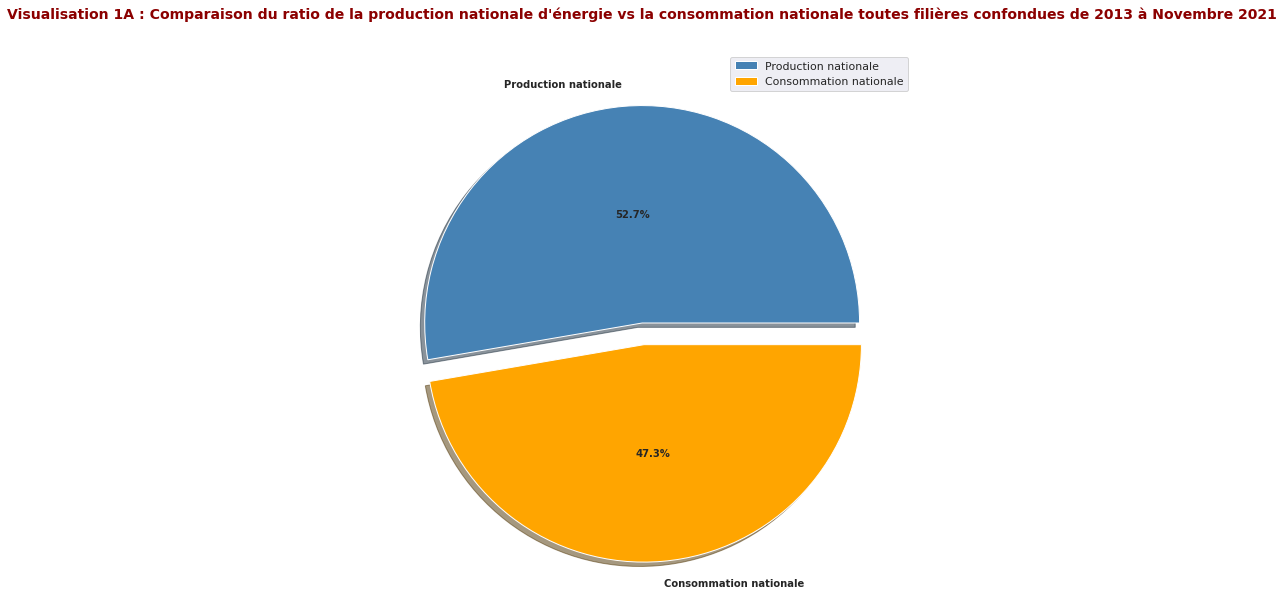

In [276]:
plt.figure(figsize = (10, 10))

plt.pie([df_energy_n.Production_totale.sum(), df_energy_n.Consommation.sum()], 
        labels = ['Production nationale', 'Consommation nationale'],
        colors = ["steelblue", "orange"],
        explode = [0, 0.1],
        autopct = lambda x: str(round(x, 2)) + '%',
        pctdistance = 0.5, labeldistance = 1.1,
        textprops={'fontsize': 10,  'weight': 'bold'},
        shadow = True)

plt.title("Visualisation 1A : Comparaison du ratio de la production nationale d'énergie vs la consommation nationale toutes filières confondues de 2013 à Novembre 2021", fontdict={'color' : 'darkred',
                    'weight': 'bold',
                    'size': 14}, y = 1.05)
plt.legend();

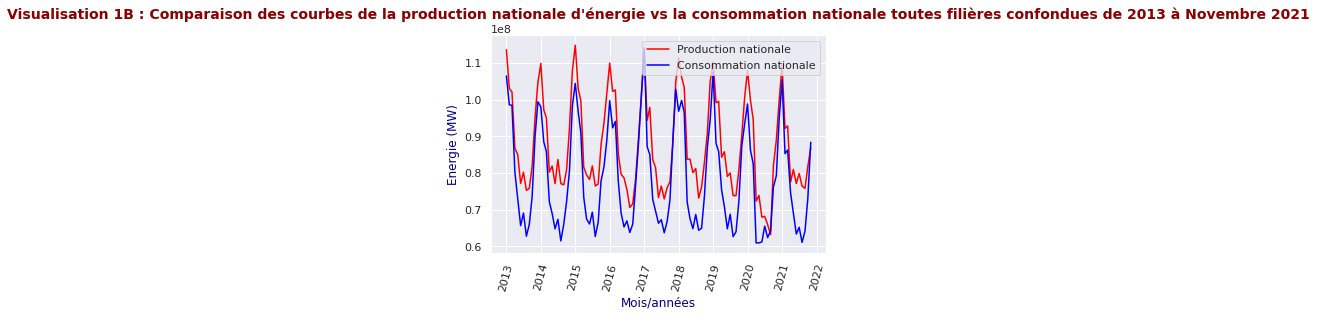

In [277]:
# On trace les courbes de la consommation et production totale au niveau national dans le temps sur un même graphique
plt.title("Visualisation 1B : Comparaison des courbes de la production nationale d'énergie vs la consommation nationale toutes filières confondues de 2013 à Novembre 2021", fontdict={'color' : 'darkred',
                    'weight': 'bold',
                    'size': 14}, y = 1.05 )

sns.set(rc = {'figure.figsize':(15,10)})
sns.lineplot('Date_YYMM', 'Production_totale', data = df_energy_n,ci = None, color = 'red', label = 'Production nationale')
plt.xticks(rotation=75)
sns.lineplot('Date_YYMM', 'Consommation', data = df_energy_n,ci = None, color = 'blue', label = 'Consommation nationale')
plt.xticks(rotation=75)
plt.xlabel('Mois/années', fontdict={'color' : 'darkblue',
                    'size': 12})
plt.ylabel('Energie (MW)', fontdict={'color' : 'darkblue',
                    'size': 12});


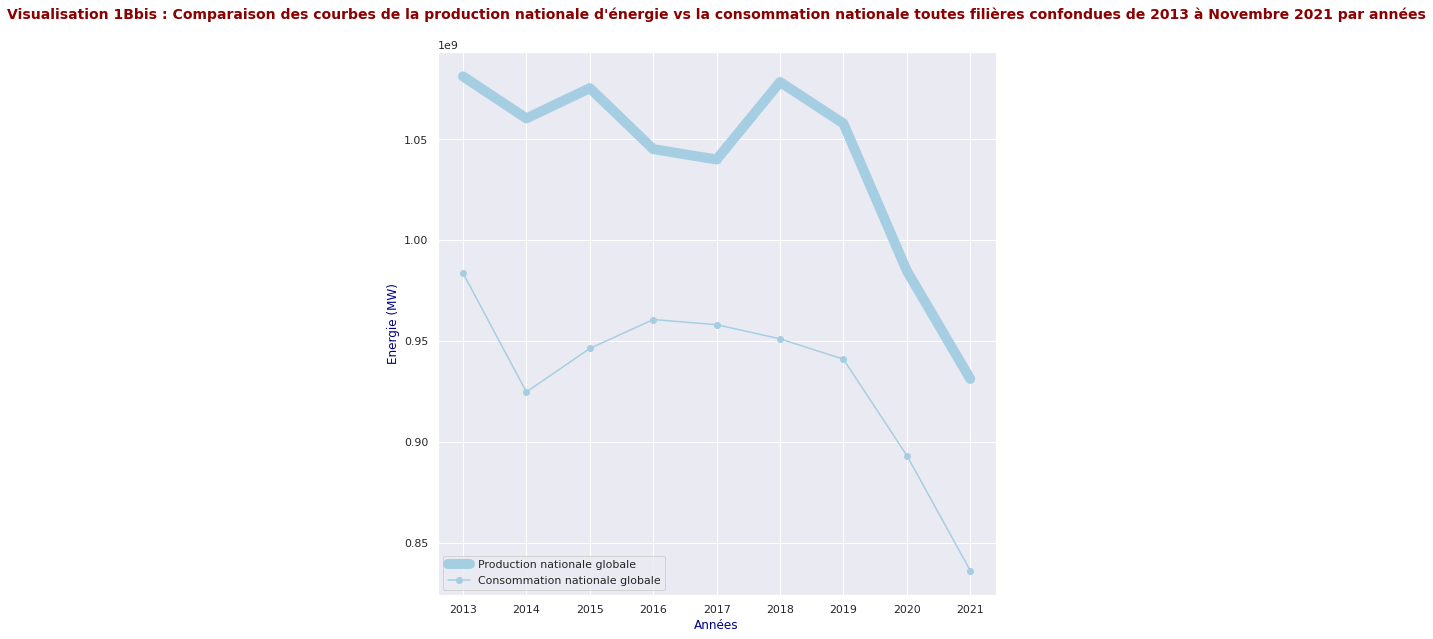

In [278]:
from matplotlib import cm

plt.title("Visualisation 1Bbis : Comparaison des courbes de la production nationale d'énergie vs la consommation nationale toutes filières confondues de 2013 à Novembre 2021 par années", fontdict={'color' : 'darkred',
                    'weight': 'bold',
                    'size': 14}, y = 1.05 )
prod_nationale = df_energy.groupby('Date_YY').sum()
prod_nationale = prod_nationale[['Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage','Bioénergies']]
prod_nationale = prod_nationale.sum(axis = 1)


conso_nationale = df_energy.groupby('Date_YY').sum()
conso_nationale = conso_nationale["Consommation"]



cmap = cm.get_cmap('Paired')
graph=prod_nationale.plot(figsize=(10,10),
                          rot = 0, 
                          linewidth=10,
                          cmap=cmap, 
                          style='x-', 
                          label = "Production nationale globale");

conso_nationale.plot(figsize=(10,10), 
                     rot = 0, 
                     ax = graph, 
                     cmap=cmap, 
                     style="o-", 
                     label = "Consommation nationale globale")

graph.set_xlabel("Années", fontdict={'color' : 'darkblue',
                    'size': 12})
graph.set_ylabel("Energie (MW)",fontdict={'color' : 'darkblue',
                    'size': 12} )

plt.legend(loc = "best");

#### Retraitements avant visualisation - Régional

In [279]:
# On utilise un groupby afin d'obtenir la somme des valeurs de consommation et production (pour chaque filière) par mois et années (en non plus par jour et par heure) et par régions
df_energy_r = df_energy.groupby(['Date_YYMM','Région']).agg({'Consommation':'sum',
                                               'Thermique':'sum',
                                               'Nucléaire':'sum',
                                               'Eolien':'sum',
                                               'Solaire':'sum',
                                               'Hydraulique':'sum',
                                               'Pompage':'sum',
                                               'Bioénergies':'sum',
                                               'Ech. physiques':'sum'})

# On souhaite obtenir la production totale (toutes filières confondues)
df_energy_r['Production_totale'] = df_energy_r.Thermique +	df_energy_r.Nucléaire +	df_energy_r.Eolien +	df_energy_r.Solaire +	df_energy_r.Hydraulique	+ df_energy_r.Pompage +	df_energy_r.Bioénergies

# On convertit le multi-index en 2 colonnes "Région" et "Date_YYMM"
df_energy_r = df_energy_r.reset_index()

In [280]:
df_energy_r

,Date_YYMM,Région,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Production_totale
0,2013-01-01,11 - Île-de-France,16826536.0,1511681.0,0.0,5861.0,1614.0,86.0,0.0,187515.0,15116737.0,1706757.0
1,2013-01-01,24 - Centre-Val de Loire,4418962.0,142685.0,15413978.0,243996.0,6996.0,47386.0,0.0,33722.0,-11472246.0,15888763.0
2,2013-01-01,27 - Bourgogne-Franche-Comté,4704866.0,487702.0,0.0,42601.0,4347.0,241036.0,-6.0,20181.0,3903732.0,795861.0
3,2013-01-01,28 - Normandie,6496893.0,1359372.0,14923798.0,172793.0,3332.0,28783.0,0.0,75817.0,-10071821.0,16563895.0
4,2013-01-01,32 - Hauts-de-France,11056438.0,1655356.0,7314899.0,533164.0,2851.0,1486.0,0.0,103008.0,1440237.0,9610764.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1279,2021-11-01,53 - Bretagne,4376911.0,364237.0,0.0,280233.0,27554.0,102657.0,-12965.0,69083.0,3546154.0,830799.0
1280,2021-11-01,75 - Nouvelle-Aquitaine,8337873.0,300660.0,5248330.0,399073.0,331384.0,479790.0,0.0,238208.0,1341218.0,6997445.0
1281,2021-11-01,76 - Occitanie,7158412.0,119015.0,1795398.0,693943.0,277778.0,1272454.0,-340005.0,121702.0,3218278.0,3940285.0
1282,2021-11-01,84 - Auvergne-Rhône-Alpes,12271430.0,588255.0,15737734.0,208634.0,122451.0,3577833.0,-690217.0,178997.0,-7452355.0,19723687.0


#### Visualisation et commentaires - Régional

Ces graphiques permettent de comparer la production globale d'énergie au niveau régional avec la consommation globale d'énergie au niveau régional sur une échelle de temps allant de 2013 à 2021. Nous avons sélectionné pour chacun des 3 cas que nous souhaitons illuster 2 régions dont les informations sont présentées ci-dessus.

On peut y remarquer des disparités entre les régions qui fonctionnent globalement :

**1/** les régions qui présentent un excédent de production, c'est-à-dire que leur niveau de production est très supérieur à leur niveau de consommation. On pourra voir dans la suite que la production d'énergie dans ces régions est majoritairement portée par la filière du nucléaire.

**2/** en auto-suffisance, c'est-à-dire que leur niveau de production d'énergie couvre leur consommation globale. On notera que des pics de consommation ou des faiblesses de production peuvent intervenir au fil des années, bien que les 2 régions sélectionnées semblent avoir un niveau de production adapté au besoin de consommation depuis 2 à 3 ans.
Le phasage énergétiques de ces régions requiert un suivi déjà plus poussé afin de s'assurer du bon approvisionnement constant en énergie. 

**3/** les régions qui présentent un déficit de production, c'est-à-dire que leur niveau de production est inférieur à leur niveau de consommation et qui nécessitent des flux physiques interrégionaux. Le faible niveau de production énergétique est essentiellement soutenu par les énergies thermiques et hydrauliques.

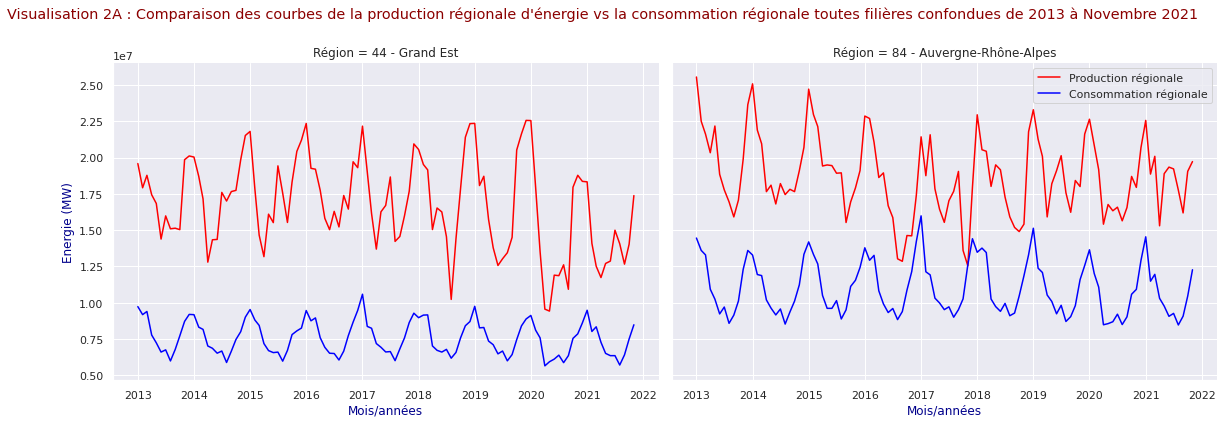

In [281]:
# 1/ On trace les courbes de la consommation et production totale au niveau de chaque région dans le temps sur un même graphique
g = sns.FacetGrid(df_energy_r[(df_energy_r['Région'] == '84 - Auvergne-Rhône-Alpes') | (df_energy_r['Région'] == '44 - Grand Est')], col='Région',height=6, aspect= 1.33, col_wrap = 4)
g.map(plt.plot, 'Date_YYMM', 'Production_totale', color='red', label = 'Production régionale')
g.map(plt.plot, 'Date_YYMM', 'Consommation', color='blue', label = 'Consommation régionale')
plt.legend(loc = 'upper right')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Visualisation 2A : Comparaison des courbes de la production régionale d'énergie vs la consommation régionale toutes filières confondues de 2013 à Novembre 2021", horizontalalignment='right',
          fontdict={'color' : 'darkred',
                    'weight': 'bold',
                    'size': 16})
g.set_xlabels('Mois/années',fontdict={'color' : 'darkblue',
                    'size': 12})
g.set_ylabels('Energie (MW)',fontdict={'color' : 'darkblue',
                    'size': 12})
plt.show()

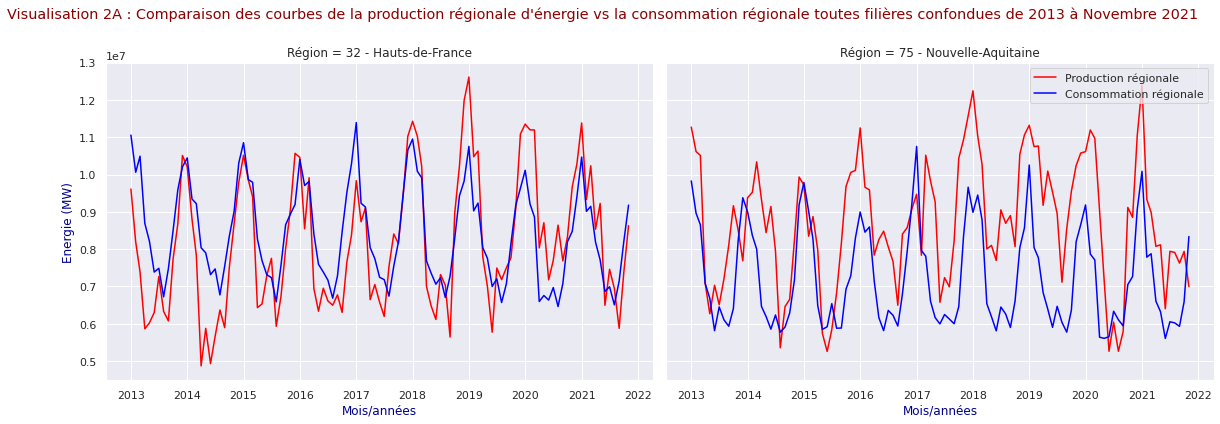

In [282]:
# 2/ On trace les courbes de la consommation et production totale au niveau de chaque région dans le temps sur un même graphique
g = sns.FacetGrid(df_energy_r[(df_energy_r['Région'] == '75 - Nouvelle-Aquitaine') | (df_energy_r['Région'] == '32 - Hauts-de-France')], col='Région',height=6, aspect= 1.33, col_wrap = 4)

g.map(plt.plot, 'Date_YYMM', 'Production_totale', color='red', label = 'Production régionale')
g.map(plt.plot, 'Date_YYMM', 'Consommation', color='blue', label = 'Consommation régionale')
plt.legend(loc = 'upper right')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Visualisation 2A : Comparaison des courbes de la production régionale d'énergie vs la consommation régionale toutes filières confondues de 2013 à Novembre 2021", horizontalalignment='right',
          fontdict={'color' : 'darkred',
                    'weight': 'bold',
                    'size': 16})
g.set_xlabels('Mois/années',fontdict={'color' : 'darkblue',
                    'size': 12})
g.set_ylabels('Energie (MW)',fontdict={'color' : 'darkblue',
                    'size': 12})
plt.show()

Commentaires

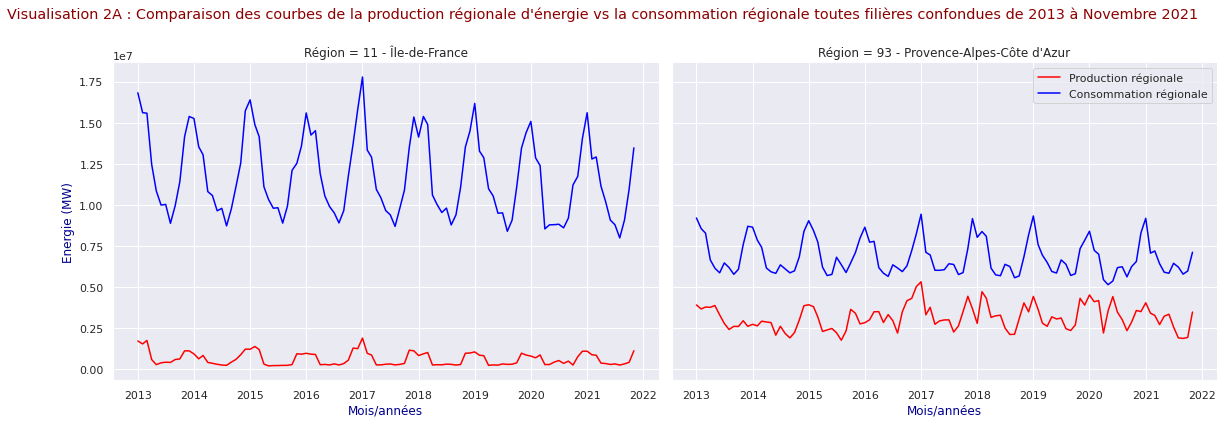

In [283]:
# 3/ On trace les courbes de la consommation et production totale au niveau de chaque région dans le temps sur un même graphique
g = sns.FacetGrid(df_energy_r[(df_energy_r['Région'] == "93 - Provence-Alpes-Côte d'Azur") | (df_energy_r['Région'] == '11 - Île-de-France')], col='Région',height=6, aspect= 1.33, col_wrap = 4)

g.map(plt.plot, 'Date_YYMM', 'Production_totale', color='red', label = 'Production régionale')
g.map(plt.plot, 'Date_YYMM', 'Consommation', color='blue', label = 'Consommation régionale')
plt.legend(loc = 'upper right')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Visualisation 2A : Comparaison des courbes de la production régionale d'énergie vs la consommation régionale toutes filières confondues de 2013 à Novembre 2021", horizontalalignment='right',
          fontdict={'color' : 'darkred',
                    'weight': 'bold',
                    'size': 16})
g.set_xlabels('Mois/années',fontdict={'color' : 'darkblue',
                    'size': 12})
g.set_ylabels('Energie (MW)',fontdict={'color' : 'darkblue',
                    'size': 12})
plt.show()

#### Graphes complémentaires

En complément des graphiques réalisés précédemment, ces graphiques représentent les disparités entre les régions mentionnées précédemment sur la même échelle de temps (2013 à 2021), mais sur une fréquence annuelle.


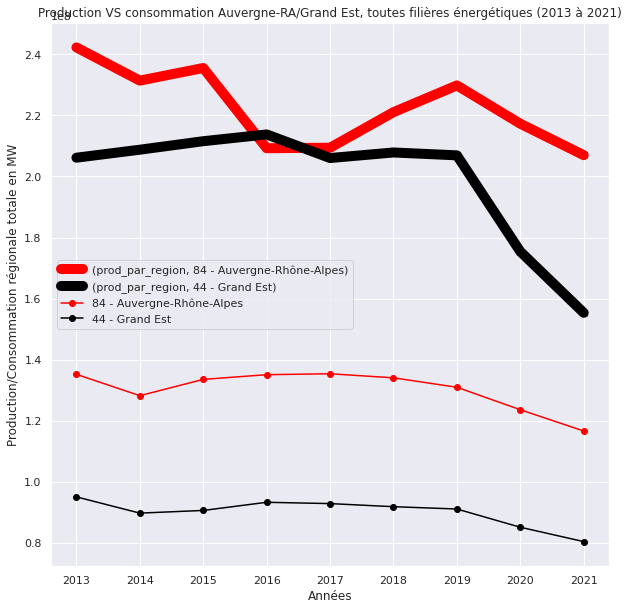

In [284]:
from matplotlib import cm

prod_regionale = df_energy.groupby(["Date_YY", "Région"]).sum()
prod_regionale = prod_regionale[['Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage','Bioénergies']]

prod_regionale['prod_par_region'] = prod_regionale[['Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage','Bioénergies']].sum(axis = 1)

prod_regionale = prod_regionale[["prod_par_region"]]

conso_regionale = df_energy.groupby(["Date_YY", "Région"]).sum()
conso_regionale = conso_regionale["Consommation"]

new_prod_reg = prod_regionale.unstack(level=1)

new_prod_reg_exced = new_prod_reg[[('prod_par_region',       '84 - Auvergne-Rhône-Alpes'), ('prod_par_region',       '44 - Grand Est')]]

new_conso_reg = conso_regionale.unstack(level=1)

new_conso_reg_exced = new_conso_reg[[('84 - Auvergne-Rhône-Alpes'), ('44 - Grand Est')]]


cmap = cm.get_cmap('flag')
graph=new_prod_reg_exced.plot(rot = 0, 
                              figsize=(10, 10), 
                              linewidth=10 , 
                              cmap=cmap, 
                              style='x-');
new_conso_reg_exced.plot(rot = 0, 
                         figsize=(10 ,10),
                         ax = graph, 
                         cmap=cmap, 
                         style="o-")

graph.set_xlabel("Années");
graph.set_ylabel("Production/Consommation régionale totale en MW")

plt.title("Production VS consommation Auvergne-RA/Grand Est, toutes filières énergétiques (2013 à 2021)")

plt.legend(loc = "best");

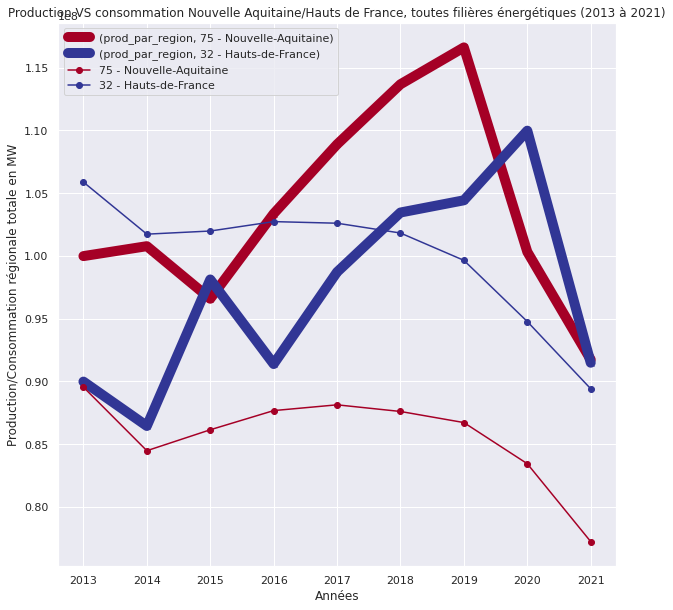

In [285]:
new_prod_reg_auto = new_prod_reg[[('prod_par_region',         '75 - Nouvelle-Aquitaine'), ('prod_par_region',            '32 - Hauts-de-France')]]

new_conso_reg_auto = new_conso_reg[[('75 - Nouvelle-Aquitaine'), ('32 - Hauts-de-France')]]


cmap = cm.get_cmap('RdYlBu')
graph=new_prod_reg_auto.plot(rot = 0, 
                             figsize=(10, 10), 
                             linewidth=10 , 
                             cmap=cmap, 
                             style='x-');
new_conso_reg_auto.plot(rot = 0, 
                        figsize=(10 ,10),
                        ax = graph, 
                        cmap=cmap, 
                        style="o-")


graph.set_xlabel("Années");
graph.set_ylabel("Production/Consommation régionale totale en MW")

plt.title("Production VS consommation Nouvelle Aquitaine/Hauts de France, toutes filières énergétiques (2013 à 2021)")

plt.legend(loc = "best");


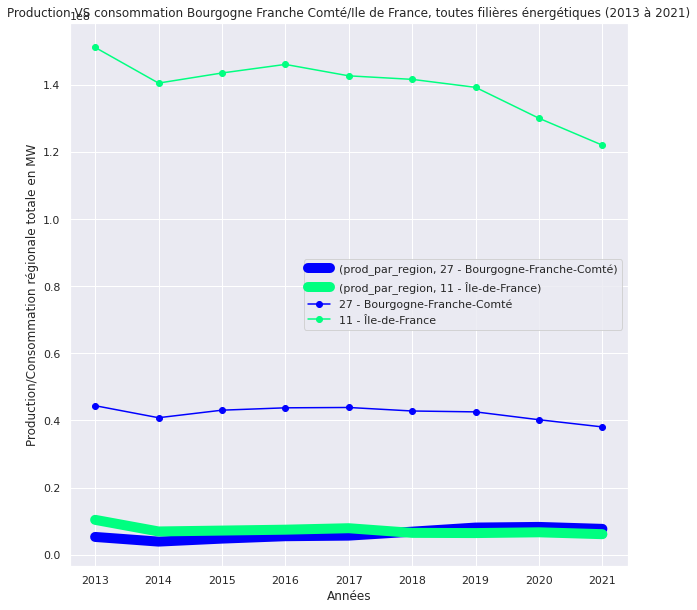

In [286]:
new_prod_reg_deficit = new_prod_reg[[('prod_par_region',    '27 - Bourgogne-Franche-Comté'), ('prod_par_region',              '11 - Île-de-France')]]

new_conso_reg_deficit = new_conso_reg[[('27 - Bourgogne-Franche-Comté'), ('11 - Île-de-France')]]

cmap = cm.get_cmap('winter')
graph=new_prod_reg_deficit.plot(rot = 0, 
                                figsize=(10, 10), 
                                linewidth=10 , 
                                cmap=cmap, 
                                style='x-');
new_conso_reg_deficit.plot(rot = 0, 
                           figsize=(10 ,10),
                           ax = graph, 
                           cmap=cmap, 
                           style="o-")

graph.set_xlabel("Années");
graph.set_ylabel("Production/Consommation régionale totale en MW")

plt.title("Production VS consommation Bourgogne Franche Comté/Ile de France, toutes filières énergétiques (2013 à 2021)")

plt.legend(loc = "best");

#### Retraitements avant visualisation - Echanges physiques

In [287]:
# On utilise un groupby afin d'obtenir la somme des valeurs des échanges physiques par années (en non plus par jour et par heure) et par régions
df_energy_ec = df_energy.groupby(['Date_YY','Région']).agg({'Ech. physiques':'sum',})

# On convertit le multi-index en 2 colonnes "Région" et "Date_YY"
df_energy_ec = df_energy_ec.reset_index()

In [288]:
df_energy_ec

,Date_YY,Région,Ech. physiques
0,2013,11 - Île-de-France,140662973.0
1,2013,24 - Centre-Val de Loire,-101706186.0
2,2013,27 - Bourgogne-Franche-Comté,39023836.0
3,2013,28 - Normandie,-98469204.0
4,2013,32 - Hauts-de-France,15828412.0
...,...,...,...
103,2021,53 - Bretagne,34105155.0
104,2021,75 - Nouvelle-Aquitaine,-14495601.0
105,2021,76 - Occitanie,10964347.0
106,2021,84 - Auvergne-Rhône-Alpes,-90323343.0


#### Visualisation et commentaires -  Echanges physiques

En accord avec les précédents commentaires, on note que les régions en excédent de production fournissent de l'énergie à d'autres régions. En effet, la valeur des échanges physiques est significativement négative pour les régions concernées (Grand-Est et Auvergne-Rhône-Alpes).
A l'inverse, les régions en déficit (Île-de-France par exemple) recoivent d'importants volumes d'énergie afin de palier à la faible production régionale.

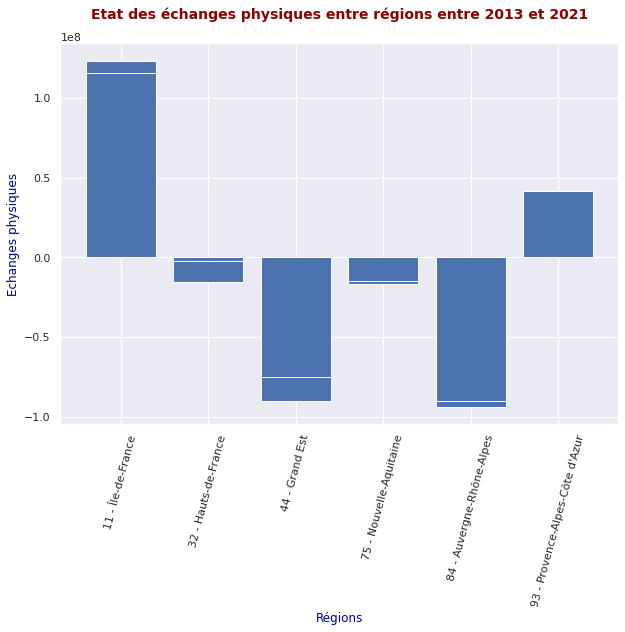

In [289]:
plt.figure (figsize = (10,7))

plt.bar ("Région", 'Ech. physiques', 
         data=df_energy_ec[((df_energy_ec['Date_YY'] == '2020')|(df_energy_ec['Date_YY'] == '2021')) &
                             ((df_energy_ec['Région'] == '75 - Nouvelle-Aquitaine') |
                              (df_energy_ec['Région'] == '32 - Hauts-de-France')|
                              (df_energy_ec['Région'] == '84 - Auvergne-Rhône-Alpes') |
                              (df_energy_ec['Région'] == '44 - Grand Est') |
                              (df_energy_ec['Région'] == "93 - Provence-Alpes-Côte d'Azur") |
                              (df_energy_ec['Région'] == '11 - Île-de-France'))])

 
plt.ylabel("Echanges physiques", fontdict={'color' : 'darkblue',
                    'size': 12})
plt.xlabel("Régions",  fontdict={'color' : 'darkblue',
                    'size': 12})
plt.title("Etat des échanges physiques entre régions entre 2013 et 2021", fontdict={'color' : 'darkred',
                    'weight': 'bold',
                    'size': 14}, x = 0.5, y= 1.05)
plt.xticks(rotation=75)
plt.legend
plt.show();

### 2/ Analyse par filière de production : énergie nucléaire / renouvelable

#### Retraitements avant visualisation - National

In [290]:
# On utilise un groupby afin d'obtenir la somme des valeurs de consommation et production (pour chaque filière) par années (en non plus par jour et par heure)

df_energy_n_er = df_energy.groupby(['Date_YY']).agg({'Consommation':'sum',
                                               'Thermique':'sum',
                                               'Nucléaire':'sum',
                                               'Eolien':'sum',
                                               'Solaire':'sum',
                                               'Hydraulique':'sum',
                                               'Pompage':'sum',
                                               'Bioénergies':'sum',
                                               'Ech. physiques':'sum'})

# On souhaite obtenir la production totale d'énergie renouvelable 
df_energy_n_er['Production_totale_ER'] = df_energy_n_er.Eolien + df_energy_n_er.Solaire + df_energy_n_er.Hydraulique + df_energy_n_er.Pompage + df_energy_n_er.Bioénergies

# On convertit l'index en une colonne "Date_YY"
df_energy_n_er = df_energy_n_er.reset_index()

#### Visualisation et commentaires - National

Le nucléaire est la principale filière productrice d'énergie en France.
Cependant, on note un essor timide des énergies renouvelables entre 2013 et 2021(+5 points) au détriment des filières thermique et nucléaire.

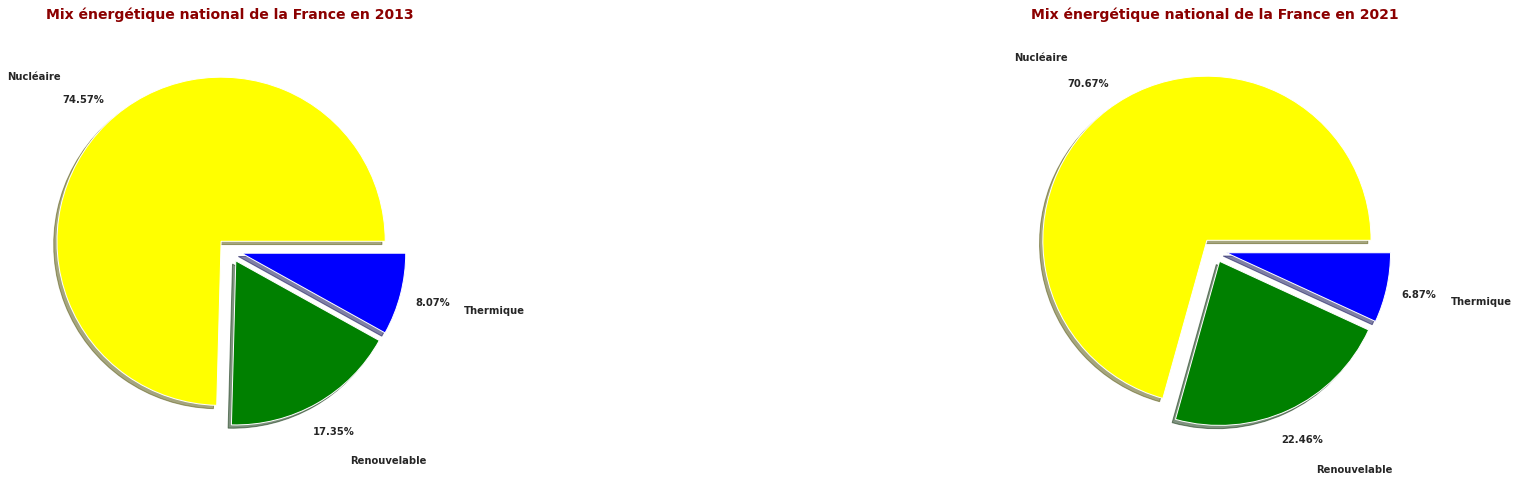

In [291]:
df_energy_n_er2013 =df_energy_n_er[df_energy_n_er['Date_YY'] == '2013']
df_energy_n_er2021 =df_energy_n_er[df_energy_n_er['Date_YY'] == '2021']

plt.figure(figsize = (25, 25))

plt.subplot(131)

plt.pie([df_energy_n_er2013['Nucléaire'].sum(), df_energy_n_er2013['Production_totale_ER'].sum(),df_energy_n_er2013['Thermique'].sum()],
        labels = ['Nucléaire', 'Renouvelable','Thermique'],
        colors = ['yellow', 'green', 'blue'],
        explode = [0.075, 0.075, 0.075],
        autopct = lambda x: str(round(x, 2)) + '%',
        pctdistance = 1.2, labeldistance = 1.4,
         textprops={'fontsize': 10,  'weight': 'bold'},
        shadow = True)
plt.title("Mix énergétique national de la France en 2013", fontdict={'color' : 'darkred',
                    'weight': 'bold',
                    'size': 14},y = 1.05);

plt.subplot(133)

plt.pie([df_energy_n_er2021['Nucléaire'].sum(), df_energy_n_er2021['Production_totale_ER'].sum(),df_energy_n_er2021['Thermique'].sum()],
        labels = ['Nucléaire', 'Renouvelable','Thermique'],
        colors = ['yellow', 'green', 'blue'],
        explode = [0.075, 0.075, 0.075],
        autopct = lambda x: str(round(x, 2)) + '%',
        pctdistance = 1.2, labeldistance = 1.4,
         textprops={'fontsize': 10,  'weight': 'bold'},
        shadow = True)
plt.title("Mix énergétique national de la France en 2021", fontdict={'color' : 'darkred',
                    'weight': 'bold',
                    'size': 14},y = 1.05);


#### Retraitements avant visualisation - Régional

In [292]:
# On utilise un groupby afin d'obtenir la somme des valeurs de consommation et production (pour chaque filière) par années (en non plus par jour et par heure) et par régions
df_energy_r_er = df_energy.groupby(['Date_YY','Région']).agg({'Consommation':'sum',
                                               'Thermique':'sum',
                                               'Nucléaire':'sum',
                                               'Eolien':'sum',
                                               'Solaire':'sum',
                                               'Hydraulique':'sum',
                                               'Pompage':'sum',
                                               'Bioénergies':'sum',
                                               'Ech. physiques':'sum',})

# On souhaite obtenir la production totale (toutes filières confondues)
df_energy_r_er['Production_totale'] = df_energy_r_er.Thermique + df_energy_r_er.Nucléaire + df_energy_r_er.Eolien + df_energy_r_er.Solaire + df_energy_r_er.Hydraulique + df_energy_r_er.Pompage + df_energy_r_er.Bioénergies

# On souhaite obtenir la production totale d'énergie renouvelable 
df_energy_r_er['Production_totale_ER'] = df_energy_r_er.Eolien + df_energy_r_er.Solaire + df_energy_r_er.Hydraulique + df_energy_r_er.Pompage + df_energy_r_er.Bioénergies

# On convertit le multi-index en 2 colonnes "Région" et "Date_YY"
df_energy_r_er = df_energy_r_er.reset_index()

In [293]:
df_energy_r_er

,Date_YY,Région,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Production_totale,Production_totale_ER
0,2013,11 - Île-de-France,151110096.0,8033453.0,0.0,69062.0,111846.0,63775.0,0.0,2135201.0,140662973.0,10413337.0,2379884.0
1,2013,24 - Centre-Val de Loire,39243659.0,678778.0,136101632.0,3016843.0,328411.0,331283.0,0.0,495252.0,-101706186.0,140952199.0,4171789.0
2,2013,27 - Bourgogne-Franche-Comté,44410924.0,2139425.0,0.0,561235.0,293134.0,2107240.0,-153.0,219619.0,39023836.0,5320500.0,3181075.0
3,2013,28 - Normandie,60092313.0,11398192.0,143961416.0,1919243.0,176313.0,255673.0,0.0,790341.0,-98469204.0,158501178.0,3141570.0
4,2013,32 - Hauts-de-France,105873338.0,11822155.0,70226195.0,6505174.0,205284.0,15616.0,0.0,1201115.0,15828412.0,89975539.0,7927189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2021,53 - Bretagne,41344248.0,1592212.0,0.0,3340653.0,555372.0,1097561.0,-133658.0,786784.0,34105155.0,7238924.0,5646712.0
104,2021,75 - Nouvelle-Aquitaine,77226913.0,1465671.0,68984021.0,4550992.0,7262049.0,6848955.0,0.0,2616174.0,-14495601.0,91727862.0,21278170.0
105,2021,76 - Occitanie,67228498.0,493911.0,26790656.0,6348281.0,5680733.0,18374961.0,-2640914.0,1249249.0,10964347.0,56296877.0,29012310.0
106,2021,84 - Auvergne-Rhône-Alpes,116652754.0,3723821.0,150839549.0,2224835.0,2922916.0,51737485.0,-6288671.0,1816736.0,-90323343.0,206976671.0,52413301.0


#### Visualisation et commentaires - Régional

L'augmentation de la part des énergies renouvelables dans le mix énergétique français se confirme au niveau régional à travers une tendance à la hausse de la production des énergies vertes.
On note tout de même que le nucléaire reste la source d'énergie dominante par rapport aux énergies vertes et les régions avec un niveau de production d'énergie bas se démarquent par l'abscence d'unité de production nucléaire.

Aussi, les énergies vertes restent aujourd'hui insuffisantes pour assurer l'indépendance énergétiques des régions qui misent sur cette filière.

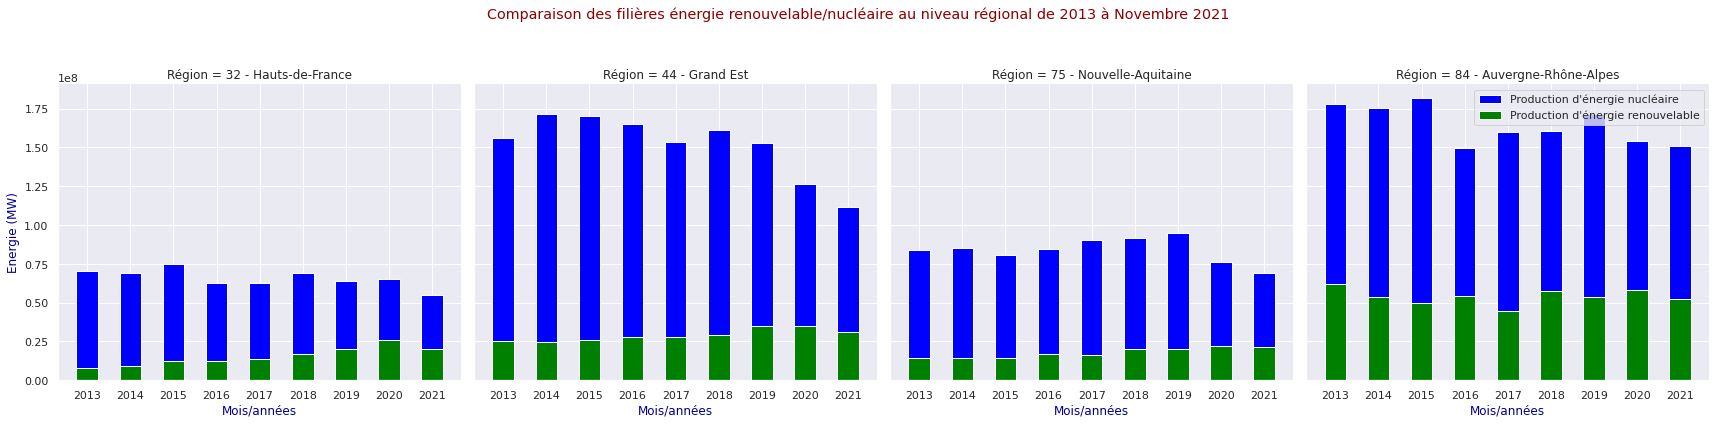

In [294]:
g = sns.FacetGrid(df_energy_r_er[(df_energy_r_er['Région'] == '84 - Auvergne-Rhône-Alpes') | (df_energy_r_er['Région'] == '44 - Grand Est') |(df_energy_r_er['Région'] == '75 - Nouvelle-Aquitaine') | (df_energy_r_er['Région'] == '32 - Hauts-de-France')], col='Région', height = 6)


g.map(plt.bar,'Date_YY', 'Nucléaire', color = 'blue', width= 0.5, label = "Production d'énergie nucléaire")
g.map(plt.bar,'Date_YY', 'Production_totale_ER', color = "green", width= 0.5, label = "Production d'énergie renouvelable")

plt.legend(loc = 'upper right')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Comparaison des filières énergie renouvelable/nucléaire au niveau régional de 2013 à Novembre 2021", horizontalalignment='center',
          fontdict={'color' : 'darkred',
                    'weight': 'bold',
                    'size': 16})
g.set_xlabels('Mois/années',fontdict={'color' : 'darkblue',
                    'size': 12})
g.set_ylabels('Energie (MW)',fontdict={'color' : 'darkblue',
                    'size': 12})

plt.legend()
plt.show()


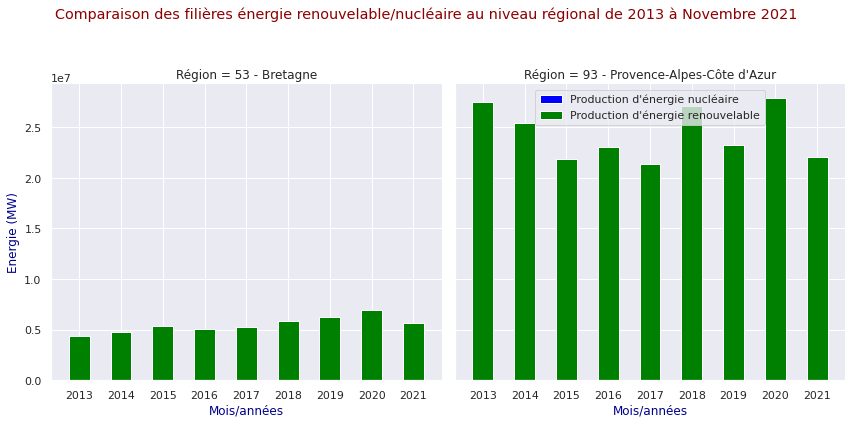

In [295]:
g = sns.FacetGrid(df_energy_r_er[(df_energy_r_er['Région'] == "93 - Provence-Alpes-Côte d'Azur") | (df_energy_r_er['Région'] == '53 - Bretagne')], col='Région', height = 6)


g.map(plt.bar,'Date_YY', 'Nucléaire', color = 'blue', width= 0.5, label = "Production d'énergie nucléaire")
g.map(plt.bar,'Date_YY', 'Production_totale_ER', color = "green", width= 0.5, label = "Production d'énergie renouvelable")

plt.legend(loc = 'upper right')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Comparaison des filières énergie renouvelable/nucléaire au niveau régional de 2013 à Novembre 2021", horizontalalignment='center',
          fontdict={'color' : 'darkred',
                    'weight': 'bold',
                    'size': 16})
g.set_xlabels('Mois/années',fontdict={'color' : 'darkblue',
                    'size': 12})
g.set_ylabels('Energie (MW)',fontdict={'color' : 'darkblue',
                    'size': 12})
plt.legend()
plt.show()

### 3/ Focus sur les énergies renouvelables

#### Retraitements avant visualisation - National

In [296]:
# On trie pour obtenir les 5 régions principales productrices d'énergie verte pour 2013
df_energy_r_er2013 =df_energy_r_er[df_energy_r_er['Date_YY'] == '2013']
df_energy_r_er2013['%'] = df_energy_r_er2013['Production_totale_ER']/ df_energy_r_er2013['Production_totale_ER'].sum() *100
df_energy_r_er2013.sort_values('Production_totale_ER', axis = 0, ascending=False, inplace = True)

# On trie pour obtenir les 5 régions principales productrices d'énergie verte pour 2021
df_energy_r_er2021 =df_energy_r_er[df_energy_r_er['Date_YY'] == '2021']
df_energy_r_er2021['%'] = df_energy_r_er2021['Production_totale_ER']/ df_energy_r_er2021['Production_totale_ER'].sum() *100
df_energy_r_er2021.sort_values('Production_totale_ER', axis = 0, ascending=False, inplace = True)

#### Visualisation et commentaires - National

Entre 2013 et 2021, les régions principales productrices d'énergie renouvelable restent les mêmes : Auvergne-Rhônes-Alpes, Occitanie, Nouvelle-Aquitaine, Provence-Alpes-Côte d'Azur et Grand Est.
On peut noter un réequilibrage de la part de production d'énergie verte au profit de plus petites régions productrices comme la Normandie, la Bourgogne-Franche-Comté ou encore le Centre-Val de Loire (+10 points dans la catégorie 'Autres').

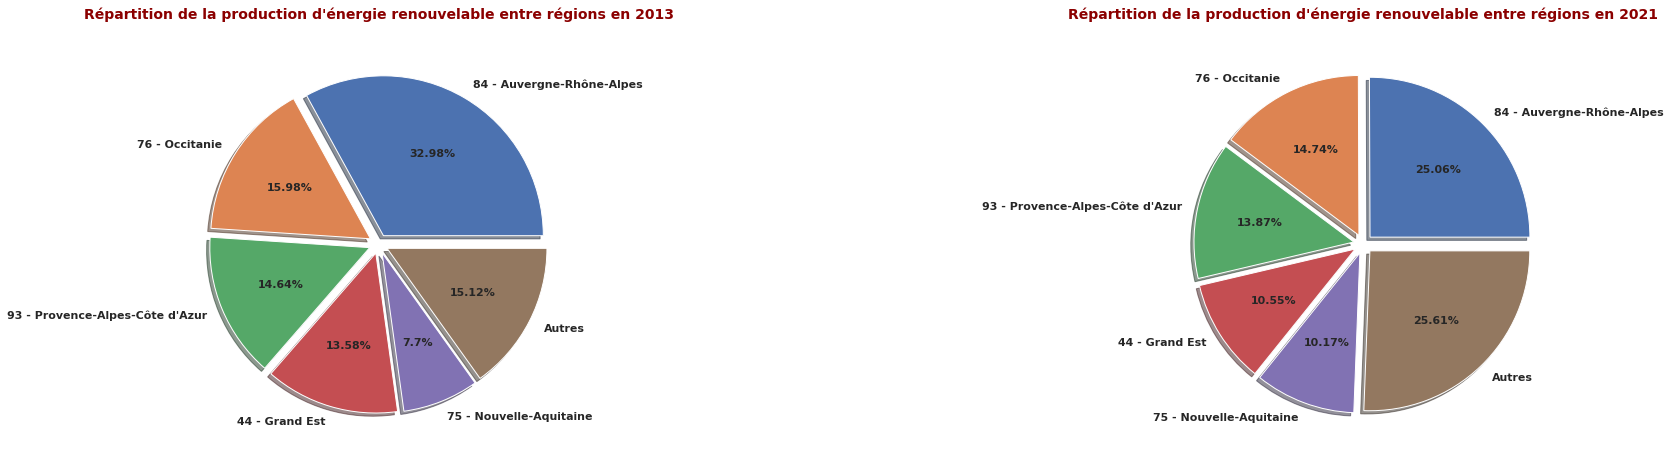

In [297]:
plt.figure(figsize = (25, 25))

plt.subplot(337)
 
plt.pie([df_energy_r_er2013['Production_totale_ER'].iloc[0],
         df_energy_r_er2013['Production_totale_ER'].iloc[1],
         df_energy_r_er2013['Production_totale_ER'].iloc[2],
         df_energy_r_er2013['Production_totale_ER'].iloc[3],
         df_energy_r_er2013['Production_totale_ER'].iloc[4],
         df_energy_r_er2013['Production_totale_ER'].iloc[5:].sum()],
        labels = ['84 - Auvergne-Rhône-Alpes', '76 - Occitanie',"93 - Provence-Alpes-Côte d'Azur",'44 - Grand Est',
                  '75 - Nouvelle-Aquitaine','Autres'],
        explode = [0.06, 0.06, 0.06,0.06,0.06, 0.06],
        autopct = lambda x: str(round(x, 2)) + '%',
        textprops={'fontsize': 11,  'weight': 'bold'},
        pctdistance = 0.6, labeldistance = 1.1,
        shadow = True)
plt.title("Répartition de la production d'énergie renouvelable entre régions en 2013", fontdict={'color' : 'darkred',
                    'weight': 'bold',
                    'size': 14}, y = 1.05 )

plt.subplot(339)

plt.pie([df_energy_r_er2021['Production_totale_ER'].iloc[0],
         df_energy_r_er2021['Production_totale_ER'].iloc[1],
         df_energy_r_er2021['Production_totale_ER'].iloc[2],
         df_energy_r_er2021['Production_totale_ER'].iloc[3],
         df_energy_r_er2021['Production_totale_ER'].iloc[4],
         df_energy_r_er2021['Production_totale_ER'].iloc[5:].sum()],
        labels = ['84 - Auvergne-Rhône-Alpes', '76 - Occitanie',"93 - Provence-Alpes-Côte d'Azur",'44 - Grand Est',
                  '75 - Nouvelle-Aquitaine','Autres'],
        explode = [0.06, 0.06, 0.06,0.06,0.06, 0.06],
        autopct = lambda x: str(round(x, 2)) + '%',
        textprops={'fontsize': 11,  'weight': 'bold'},
        pctdistance = 0.6, labeldistance = 1.1,
        shadow = True)
plt.title("Répartition de la production d'énergie renouvelable entre régions en 2021", fontdict={'color' : 'darkred',
                    'weight': 'bold',
                    'size': 14},y = 1.05);

#### Visualisation et commentaires - Régional

En se basant sur les 6 plus grandes régions productrices identifiées précédemment, on note que l'énergie renouvelable est majoritairement hydraulique avec un faible volume de bioénergies.
Les énergies solaires et éoliennes représentent un volume quasi_négligeable et ne concernent que certaines régions (Grand Est et Nouvelle-Aquitaine).

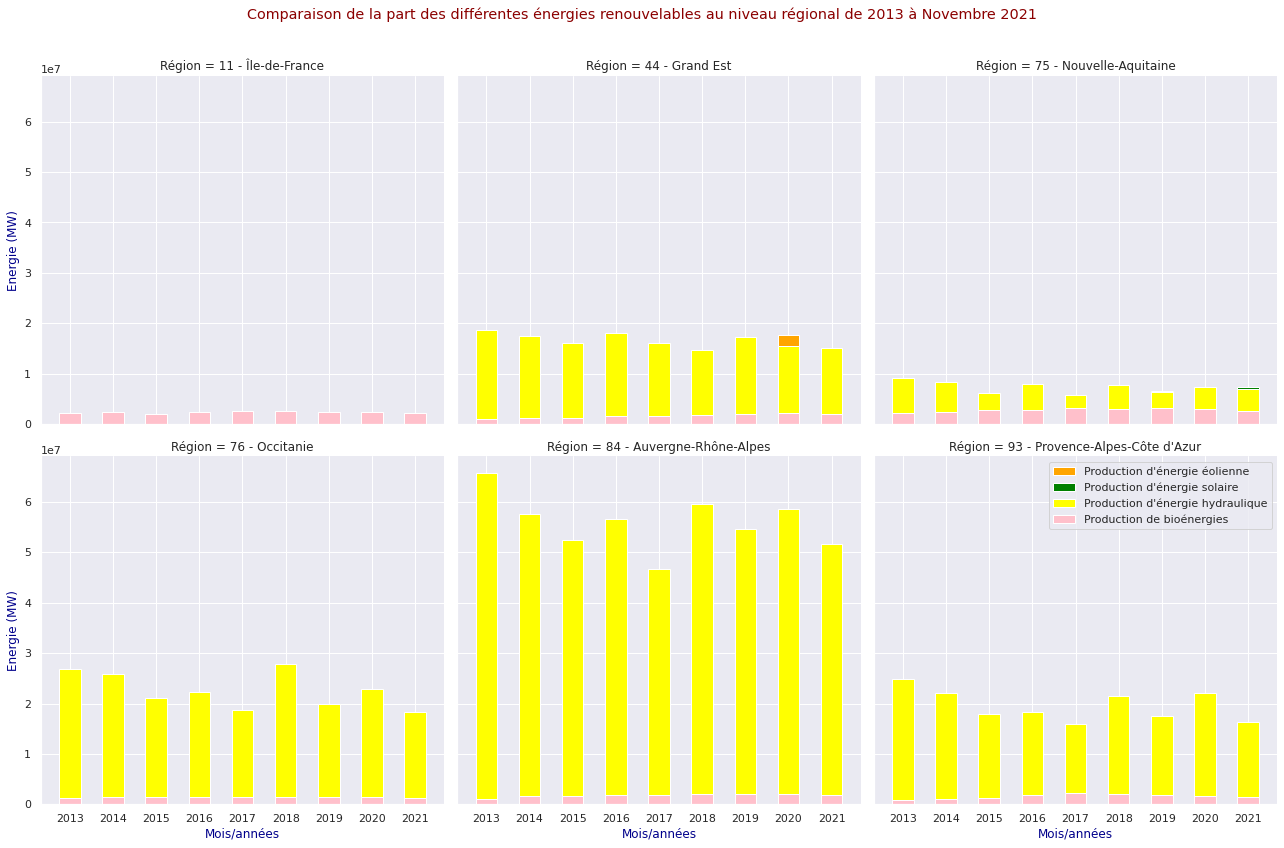

In [298]:
g = sns.FacetGrid(df_energy_r_er[(df_energy_r_er['Région'] ==  '76 - Occitanie') |
        (df_energy_r_er['Région'] == "93 - Provence-Alpes-Côte d'Azur")|
        (df_energy_r_er['Région'] == "84 - Auvergne-Rhône-Alpes") |
         (df_energy_r_er['Région'] == "11 - Île-de-France")|
         (df_energy_r_er['Région'] == "44 - Grand Est")|
         (df_energy_r_er['Région'] == "75 - Nouvelle-Aquitaine")], col='Région', height = 6, col_wrap = 3)


g.map(plt.bar,'Date_YY', 'Eolien', color = 'orange', width= 0.5, label = "Production d'énergie éolienne")
g.map(plt.bar,'Date_YY', 'Solaire', color = "green", width= 0.5, label = "Production d'énergie solaire")
g.map(plt.bar,'Date_YY', 'Hydraulique', color = "yellow", width= 0.5, label = "Production d'énergie hydraulique")
g.map(plt.bar,'Date_YY', 'Bioénergies', color = "pink", width= 0.5, label = "Production de bioénergies")

plt.legend(loc = 'upper right')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Comparaison de la part des différentes énergies renouvelables au niveau régional de 2013 à Novembre 2021", horizontalalignment='center',
          fontdict={'color' : 'darkred',
                    'weight': 'bold',
                    'size': 16})
g.set_xlabels('Mois/années',fontdict={'color' : 'darkblue',
                    'size': 12})
g.set_ylabels('Energie (MW)',fontdict={'color' : 'darkblue',
                    'size': 12})

plt.legend()
plt.show()

# E/ Itération de modèles

## 1/ Série temporelle

### Série temporelle - Consommation énergétique nationale

#### Retraitements avant itération

In [299]:
# On récupère le Dataframe "df_energy_n" crée pour les visualisations graphiques (1/) et on indexe la série par des données calendaires
df_energy_n.set_index('Date_YYMM', inplace = True)

In [300]:
# Visualisation du Dataset avec les données calendaires indexées
df_energy_n

,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Production_totale
Date_YYMM,,,,,,,,,,
2013-01-01,106515355.0,12575951.0,84708335.0,2627826.0,275544.0,13618137.0,-1204944.0,1089974.0,-7229744.0,113690823.0
2013-02-01,98659091.0,12699120.0,73478789.0,2911326.0,441789.0,13528331.0,-945548.0,981454.0,-4486185.0,103095261.0
2013-03-01,98492373.0,12589251.0,73628178.0,2689621.0,666161.0,12713769.0,-1200411.0,1067519.0,-3721243.0,102154088.0
2013-04-01,80269032.0,6082453.0,62938389.0,2963937.0,839159.0,14237985.0,-1085516.0,846559.0,-6611003.0,86822966.0
2013-05-01,73023731.0,2904854.0,62265278.0,2290765.0,972221.0,17002185.0,-1349586.0,973894.0,-12089887.0,85059611.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-01,65195587.0,3004759.0,56869735.0,4342646.0,3480190.0,11087782.0,-660010.0,1765008.0,-14682946.0,79890110.0
2021-08-01,61096040.0,1700300.0,57989499.0,3910320.0,3307067.0,8686868.0,-758886.0,1627630.0,-15345918.0,76462798.0
2021-09-01,64161277.0,4191864.0,58005635.0,3249055.0,2808799.0,6747025.0,-781268.0,1585484.0,-11616042.0,75806594.0


In [301]:
# Création de la variable cible
conso_n = df_energy_n['Consommation']

**La p-valeur obtenue est inférieure à 5%, nous pouvons considérer la série comme stationnaire.**

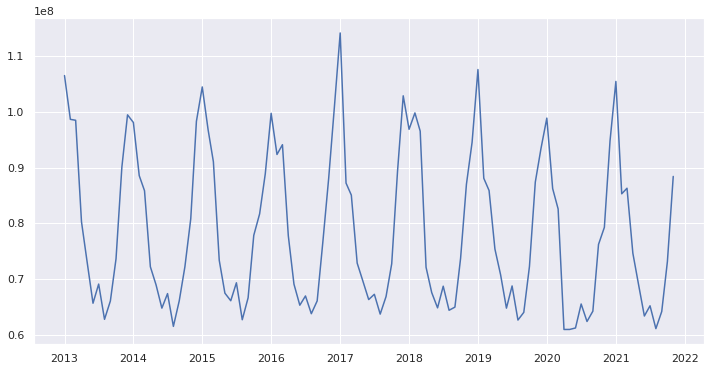

In [302]:
# Affichage de la variable "Consommation"
fig = plt.figure(figsize = (12,6))
plt.plot(conso_n)
plt.show()

#### Différentiation

In [303]:
# Différenciation ordre 1
conso_n1 = conso_n.diff().dropna()

# Différenciation d'ordre 12
conso_n2 = conso_n1.diff(periods = 12).dropna()

In [304]:
# Utilisation du test augmenté de Dickey-Fuller pour déterminer si la série est stationnaire ou non
import statsmodels.api as sm
_, p_value, _, _, _, _  = sm.tsa.stattools.adfuller(conso_n2)
p_value 


1.1393641881814215e-05

#### Génération d'une configuration optimale SARIMAX : selection des parametres

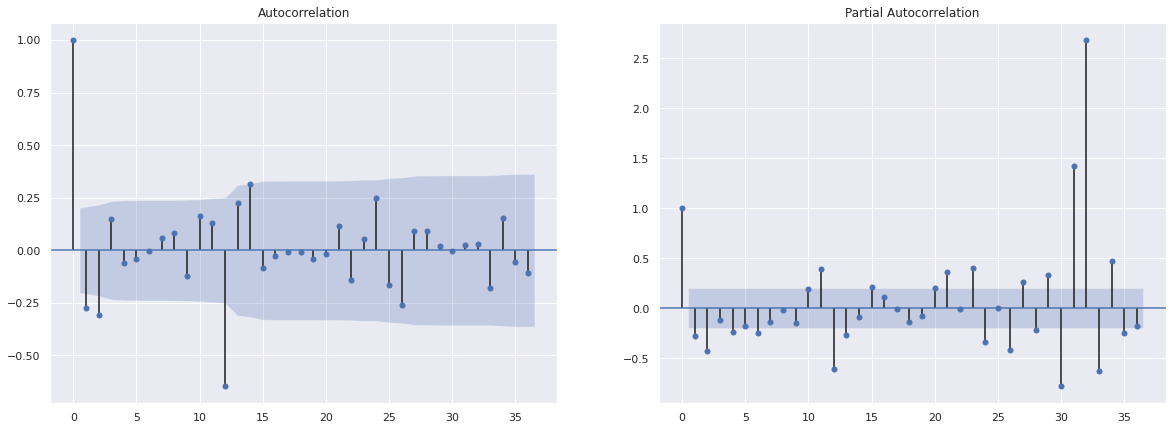

In [305]:
#  Visualisation sur 36 décalages des autocorrélogrammes simple et partiel de la série doublement différenciée
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

plot_acf(conso_n2, lags = 36, ax=ax1)
plot_pacf(conso_n2, lags = 36, ax=ax2)
plt.show()

In [306]:
# Modèle 1

# Instanciation d'un modèle SARIMAX : on repart de notre série non différenciée "conso_n" pour appliquer le modèle SARIMA qui se chargera de faire la différenciation
model=sm.tsa.SARIMAX(np.log(conso_n),order=(1,1,1),seasonal_order=(0,1,1,12))

# Ajustement du modèle sur les données
sarima=model.fit()

# Affichage des résultats
print(sarima.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       Consommation   No. Observations:                  107
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 152.159
Date:                            Fri, 11 Mar 2022   AIC                           -296.318
Time:                                    10:15:33   BIC                           -286.144
Sample:                                01-01-2013   HQIC                          -292.208
                                     - 11-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3784      0.098      3.848      0.000       0.186       0.571
ma.L1         -0.9533      0.070   

L’identification des combinaisons sera faite par l’approche d’optimisation des polynômes AR et MA. Nous cherchons à minimiser les critères d’informations BIC et AIC pour déterminer les ordres optimaux. La blancheur et normalité du résidu est également un critère à prendre en compte.

In [307]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.gofplots import ProbPlot
from scipy.stats import shapiro
from IPython.display import clear_output
from time import time

import itertools
import warnings                                  
warnings.filterwarnings('ignore')


%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Sélection des paramètres**

In [308]:
#Détermination du meilleur modèle de prévision 
from time import time
DUREE_PREDITE = 12 #prédiction sur 12 mois
troncature = DUREE_PREDITE
y = conso_n
#y = df
y_prevision = y[-troncature:]

#Calcul de toutes les combinaisons de p, d et q
pdq_list = list(itertools.product(range(3),
                             range(2), 
                             range(3)
           ))

#Calcul de toutes les combinaisons de P, D et Q
PDQ_list = [ (*val, 12) for val in list(itertools.product(
                            range(3), 
                            range(2), 
                            range(3))
            )]


#Nombre de configurations total pour un modèle SARIMA
n = len(pdq_list) * len(PDQ_list)

#Dataframe pour stockage des valeurs
results_SARIMA = pd.DataFrame({'modele':[], 'aic':[], 'bic':[], 'ljungbox':[], 'pvalues':[]})
counter = 1
s_time = time()

#Itération sur toutes les combinaisons possible
for pdq in pdq_list:
    for PDQ in PDQ_list:
        try:
            #Instanciation et entrainement du modèle SARIMA
            mod = SARIMAX(np.asarray(y), order = pdq, seasonal_order = PDQ, 
                          enforce_stationarity=False, enforce_invertibility=False)
            result = mod.fit()
                    
            #Intégration des indicateurs dans le précédent dataframe
            results_SARIMA = results_SARIMA.append({'modele':f"{pdq}x{PDQ}", 
                            'aic': result.aic, 
                            'bic': result.bic,
                            'ljungbox': acorr_ljungbox(result.resid, lags=12)[1].mean(),
                            'pvalues': result.pvalues.min()}, 
                            ignore_index=True)
        except:
            continue
            
        clear_output(' ')
        print(f"{counter}/{n} - {time() - s_time:.0f}s")
        counter += 1

324/324 - 166s


A partir des 90 sur 324 modèles, une sélection plus fine peut-être établie en triant ceux uniquement qui répondent aux critères suivants :

In [309]:
from pandas._libs.algos import rank_1d
from pandas.core.algorithms import rank
results_SARIMA_filter = results_SARIMA[(results_SARIMA['ljungbox'] > 0.05)]
results_SARIMA_filter = results_SARIMA_filter[results_SARIMA_filter['pvalues'] < 0.05]



In [310]:
#Utilisation de la fonction .rank() pour déterminer la position de chaque modèle selon la minimisation AIC / BIC
results_SARIMA_filter['rank_bic'] = results_SARIMA_filter['bic'].rank(ascending=True, )
results_SARIMA_filter['rank_aic'] = results_SARIMA_filter['aic'].rank(ascending=True)

In [311]:
#Visualisation des 30 modèles les plus performants sur les 324 initiaux
def highlight_greaterthan(x):
    if x.rank_bic == 15:
        return ['background-color: #2399f9']*7
    else:
        return ['background-color: None']*7

results_SARIMA_filter.sort_values(['rank_aic'], ascending=True)[:30].style.apply(highlight_greaterthan, axis=1)

,modele,aic,bic,ljungbox,pvalues,rank_bic,rank_aic
177,"(1, 1, 0)x(2, 1, 0, 12)",2334.698820,2343.635246,0.177554,0.000000,1.000000,1.000000
178,"(1, 1, 0)x(2, 1, 1, 12)",2335.747768,2346.918300,0.248531,0.000000,2.000000,2.000000
70,"(0, 1, 0)x(2, 1, 1, 12)",2353.733867,2362.727848,0.843645,0.000000,3.000000,3.000000
105,"(0, 1, 2)x(2, 1, 0, 12)",2354.513667,2365.756143,0.066490,0.000000,4.000000,4.000000
106,"(0, 1, 2)x(2, 1, 1, 12)",2356.486103,2369.977074,0.054330,0.000000,7.000000,5.000000
69,"(0, 1, 0)x(2, 1, 0, 12)",2359.254828,2366.000313,0.784913,0.000000,5.000000,6.000000
87,"(0, 1, 1)x(2, 1, 0, 12)",2360.982281,2369.976262,0.068381,0.000000,6.000000,7.000000
88,"(0, 1, 1)x(2, 1, 1, 12)",2362.964239,2374.206715,0.065140,0.000000,8.000000,8.000000
100,"(0, 1, 2)x(1, 1, 1, 12)",2659.590991,2671.438231,0.222200,0.000000,9.000000,9.000000
208,"(1, 1, 2)x(1, 1, 1, 12)",2659.863580,2674.080268,0.118245,0.000000,10.000000,10.000000


In [312]:
model=sm.tsa.SARIMAX(np.log(conso_n),order=(1,1,1),seasonal_order=(1,1,1,12))

# Ajustement du modèle sur les données
sarima=model.fit()

# Affichage des résultats
print(sarima.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       Consommation   No. Observations:                  107
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 157.509
Date:                            Fri, 11 Mar 2022   AIC                           -305.017
Time:                                    10:18:21   BIC                           -292.301
Sample:                                01-01-2013   HQIC                          -299.881
                                     - 11-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3403      0.129      2.634      0.008       0.087       0.594
ma.L1         -0.8948      0.077   

Selon la minimisation du critère AIC et BIC , le modèle (2, 1, 2)x(0, 0, 0, 12) ressort comme étant le plus optimal. Ce choix a été fait après plusieurs tests sur plusieurs modèles, il ressort comme étant le plus performant en tenant compte également de la significativité des paramètres. Les tests de significativité des paramètres sont validés au niveau 5%.

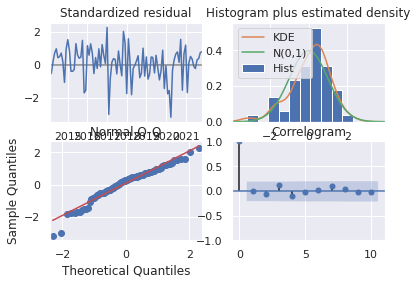

In [313]:
fig = sarima.plot_diagnostics()

La représentation "Standardized residual" et "Correlogram" confirment qu'il n'y a pas de corrélation des résidus. Les résidus sont normalement distribués KDE vs distribution normale - N (0,1). La distribution ordonnée des résidus représentée par le du Q-Q plot est globalement satisfaisant, il y a quand même des petites divergences vers les queues de distribution. Il est intéressant de coupler l'approche visuelle par des tests statistiques.

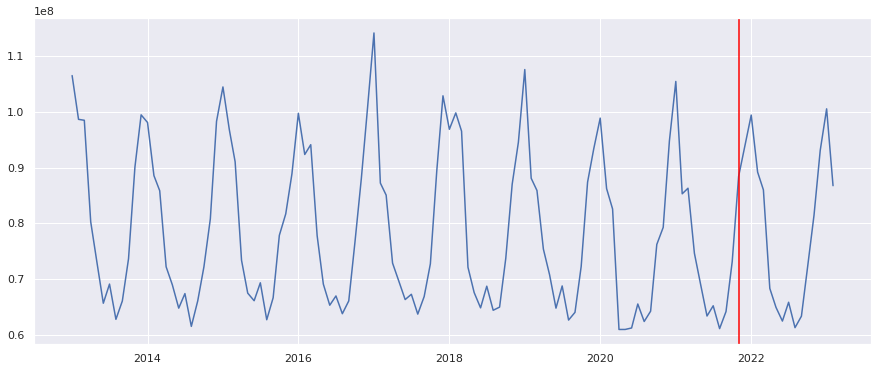

In [314]:
# Prédiction sur 2022 et Visualisation de la série avec les prédictions générées

import datetime

plt.figure(figsize = (15,6))
pred = np.exp(sarima.predict(108, 121))
df_pred = pd.concat([conso_n, pred])

plt.plot(df_pred)

plt.axvline(x= datetime.date(2021,11,1), color='red');

### Série temporelle - Consommation énergétique régionale

#### Retraitements avant itération

In [315]:
# On récupère le Dataframe "df_energy_r" crée pour les visualisations graphiques (1/) et on indexe la série par des données calendaires
df_energy_r.set_index('Date_YYMM', inplace = True)

In [316]:
# Visualisation du Dataset avec les données calendaires indexées
df_energy_r.head(5)

,Région,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Production_totale
Date_YYMM,,,,,,,,,,,
2013-01-01,11 - Île-de-France,16826536.0,1511681.0,0.0,5861.0,1614.0,86.0,0.0,187515.0,15116737.0,1706757.0
2013-01-01,24 - Centre-Val de Loire,4418962.0,142685.0,15413978.0,243996.0,6996.0,47386.0,0.0,33722.0,-11472246.0,15888763.0
2013-01-01,27 - Bourgogne-Franche-Comté,4704866.0,487702.0,0.0,42601.0,4347.0,241036.0,-6.0,20181.0,3903732.0,795861.0
2013-01-01,28 - Normandie,6496893.0,1359372.0,14923798.0,172793.0,3332.0,28783.0,0.0,75817.0,-10071821.0,16563895.0
2013-01-01,32 - Hauts-de-France,11056438.0,1655356.0,7314899.0,533164.0,2851.0,1486.0,0.0,103008.0,1440237.0,9610764.0


Toujours dans le cadre de la distinction logique nationale vs régionale, nous avons sélectionné 3 régions pour chacun des 3 groupes de régions identifiés lors de la constitution des visualisations graphiques:

*   excédent de production : **44 - Grand Est**
*   auto-suffisance : **32 - Hauts-de-France**
*   déficit de production : **11 - Île-de-France**





In [317]:
# Création des variables cibles pour chaque région sélectionnée
conso_r1 = df_energy_r['Consommation'][df_energy_r['Région'] == '44 - Grand Est']
conso_r2 = df_energy_r['Consommation'][df_energy_r['Région'] == '32 - Hauts-de-France']
conso_r3 = df_energy_r['Consommation'][df_energy_r['Région'] == '11 - Île-de-France']

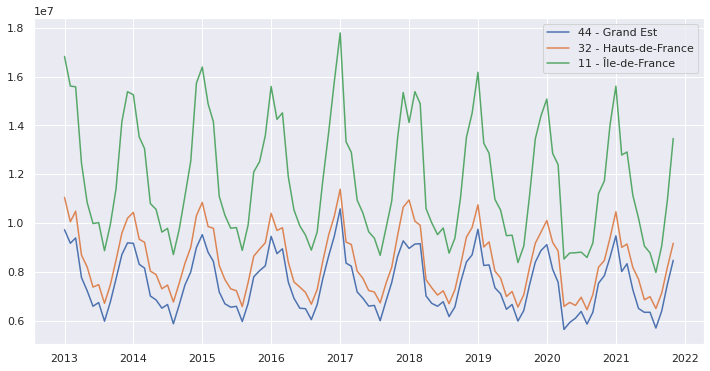

In [318]:
# Affichage des variables cibles pour chaque région sélectionnée
fig = plt.figure(figsize = (12,6))
plt.plot(conso_r1, label = "44 - Grand Est")
plt.plot(conso_r2, label = "32 - Hauts-de-France")
plt.plot(conso_r3, label = "11 - Île-de-France")
plt.legend()
plt.show()

#### Différentiation

In [319]:
# Différenciation ordre 1
conso_r1a = conso_r1.diff().dropna()
conso_r2a = conso_r2.diff().dropna()
conso_r3a = conso_r3.diff().dropna()

# Différenciation d'ordre 12
conso_r1b = conso_r1a.diff(periods = 12).dropna()
conso_r2b = conso_r2a.diff(periods = 12).dropna()
conso_r3b = conso_r3a.diff(periods = 12).dropna()

In [320]:
# Utilisation du test augmenté de Dickey-Fuller pour déterminer si les séries sont stationnaires ou non
import statsmodels.api as sm
_, p_value, _, _, _, _  = sm.tsa.stattools.adfuller(conso_r1b)
print(p_value)

_, p_value, _, _, _, _  = sm.tsa.stattools.adfuller(conso_r2b)
print(p_value)

_, p_value, _, _, _, _  = sm.tsa.stattools.adfuller(conso_r3b)
print(p_value)

0.00036660324140014273
1.8132264611055285e-05
0.00012982275076709121


**Les p-valeur obtenues sont inférieures à 5%, nous pouvons considérer les séries comme stationnaires.**

#### Ajustement du  modèle de prédiction

##### **Région - 44 - Grand Est**

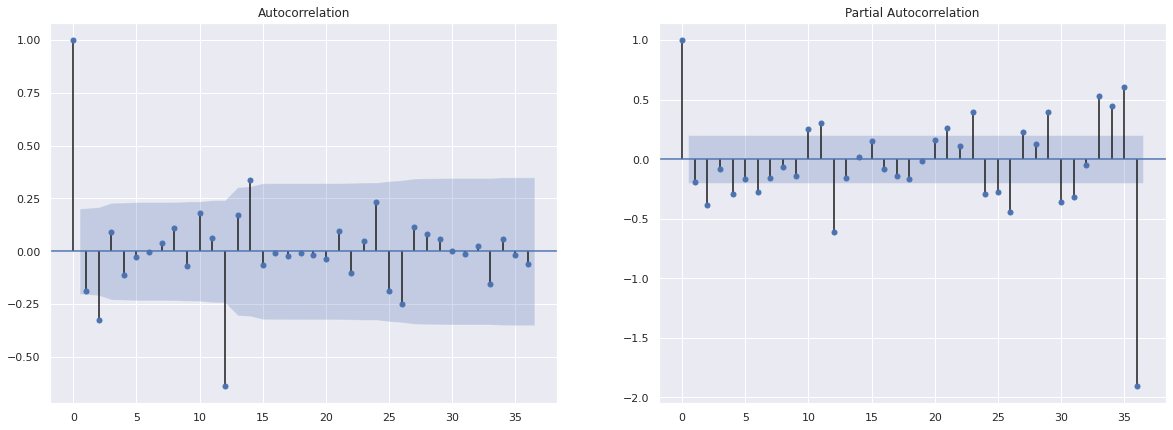

In [321]:
#  Visualisation sur 36 décalages des autocorrélogrammes simple et partiel de la série doublement différenciée
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

plot_acf(conso_r1b, lags = 36, ax=ax1)
plot_pacf(conso_r1b, lags = 36, ax=ax2)
plt.show()

In [322]:
# Instanciation d'un modèle SARIMAX : on repart de notre série non différenciée "conso_r1" pour appliquer le modèle SARIMA qui se chargera de faire la différenciation
model1=sm.tsa.SARIMAX(np.log(conso_r1),order=(1,1,1),seasonal_order=(0,1,1,12))

# Ajustement du modèle sur les données
sarima1=model1.fit()

# Affichage des résultats
print(sarima1.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       Consommation   No. Observations:                  107
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 160.363
Date:                            Fri, 11 Mar 2022   AIC                           -312.725
Time:                                    10:18:25   BIC                           -302.552
Sample:                                01-01-2013   HQIC                          -308.616
                                     - 11-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5128      0.100      5.129      0.000       0.317       0.709
ma.L1         -0.9548      0.085   

**Sélection des paramètres**

In [323]:
#Détermination du meilleur modèle de prévision 
from time import time
DUREE_PREDITE = 12 #prédiction sur 12 mois
troncature = DUREE_PREDITE
y = conso_n
#y = df
y_prevision = y[-troncature:]

#Calcul de toutes les combinaisons de p, d et q
pdq_list = list(itertools.product(range(3),
                             range(2), 
                             range(3)
           ))

#Calcul de toutes les combinaisons de P, D et Q
PDQ_list = [ (*val, 12) for val in list(itertools.product(
                            range(3), 
                            range(2), 
                            range(3))
            )]


#Nombre de configurations total pour un modèle SARIMA
n = len(pdq_list) * len(PDQ_list)

#Dataframe pour stockage des valeurs
results_SARIMA = pd.DataFrame({'modele':[], 'aic':[], 'bic':[], 'ljungbox':[], 'pvalues':[]})
counter = 1
s_time = time()

#Itération sur toutes les combinaisons possible
for pdq in pdq_list:
    for PDQ in PDQ_list:
        try:
            #Instanciation et entrainement du modèle SARIMA
            mod = SARIMAX(np.asarray(y), order = pdq, seasonal_order = PDQ, 
                          enforce_stationarity=False, enforce_invertibility=False)
            result = mod.fit()
                    
            #Intégration des indicateurs dans le précédent dataframe
            results_SARIMA = results_SARIMA.append({'modele':f"{pdq}x{PDQ}", 
                            'aic': result.aic, 
                            'bic': result.bic,
                            'ljungbox': acorr_ljungbox(result.resid, lags=12)[1].mean(),
                            'pvalues': result.pvalues.min()}, 
                            ignore_index=True)
        except:
            continue
            
        clear_output(' ')
        print(f"{counter}/{n} - {time() - s_time:.0f}s")
        counter += 1

324/324 - 164s


In [324]:
from pandas._libs.algos import rank_1d
from pandas.core.algorithms import rank
results_SARIMA_filter = results_SARIMA[(results_SARIMA['ljungbox'] > 0.05)]
results_SARIMA_filter = results_SARIMA_filter[results_SARIMA_filter['pvalues'] < 0.05]

#Utilisation de la fonction .rank() pour déterminer la position de chaque modèle selon la minimisation AIC / BIC
results_SARIMA_filter['rank_bic'] = results_SARIMA_filter['bic'].rank(ascending=True, )
results_SARIMA_filter['rank_aic'] = results_SARIMA_filter['aic'].rank(ascending=True)

#Visualisation des 30 modèles les plus performants sur les 324 initiaux
def highlight_greaterthan(x):
    if x.rank_bic == 15:
        return ['background-color: #2399f9']*7
    else:
        return ['background-color: None']*7

results_SARIMA_filter.sort_values(['rank_aic'], ascending=True)[:30].style.apply(highlight_greaterthan, axis=1)

,modele,aic,bic,ljungbox,pvalues,rank_bic,rank_aic
177,"(1, 1, 0)x(2, 1, 0, 12)",2334.698820,2343.635246,0.177554,0.000000,1.000000,1.000000
178,"(1, 1, 0)x(2, 1, 1, 12)",2335.747768,2346.918300,0.248531,0.000000,2.000000,2.000000
70,"(0, 1, 0)x(2, 1, 1, 12)",2353.733867,2362.727848,0.843645,0.000000,3.000000,3.000000
105,"(0, 1, 2)x(2, 1, 0, 12)",2354.513667,2365.756143,0.066490,0.000000,4.000000,4.000000
106,"(0, 1, 2)x(2, 1, 1, 12)",2356.486103,2369.977074,0.054330,0.000000,7.000000,5.000000
69,"(0, 1, 0)x(2, 1, 0, 12)",2359.254828,2366.000313,0.784913,0.000000,5.000000,6.000000
87,"(0, 1, 1)x(2, 1, 0, 12)",2360.982281,2369.976262,0.068381,0.000000,6.000000,7.000000
88,"(0, 1, 1)x(2, 1, 1, 12)",2362.964239,2374.206715,0.065140,0.000000,8.000000,8.000000
100,"(0, 1, 2)x(1, 1, 1, 12)",2659.590991,2671.438231,0.222200,0.000000,9.000000,9.000000
208,"(1, 1, 2)x(1, 1, 1, 12)",2659.863580,2674.080268,0.118245,0.000000,10.000000,10.000000


In [325]:
model1=sm.tsa.SARIMAX(np.log(conso_r1),order=(1,1,1),seasonal_order=(1,1,1,12))

# Ajustement du modèle sur les données
sarima1=model1.fit()

# Affichage des résultats
print(sarima1.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       Consommation   No. Observations:                  107
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 165.395
Date:                            Fri, 11 Mar 2022   AIC                           -320.789
Time:                                    10:21:13   BIC                           -308.073
Sample:                                01-01-2013   HQIC                          -315.653
                                     - 11-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4880      0.149      3.271      0.001       0.196       0.780
ma.L1         -0.9003      0.097   

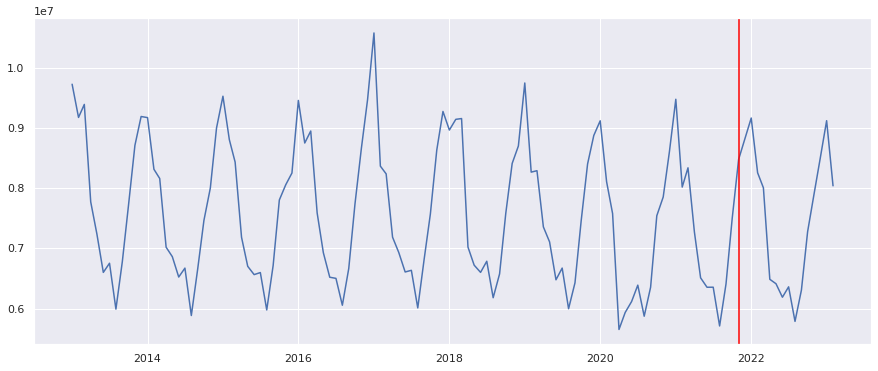

In [326]:
# Prédiction sur 2022 et Visualisation de la série avec les prédictions générées

import datetime

plt.figure(figsize = (15,6))
pred1 = np.exp(sarima1.predict(108, 121))
df_pred1 = pd.concat([conso_r1, pred1])

plt.plot(df_pred1)

plt.axvline(x= datetime.date(2021,11,1), color='red');

##### **Région - 32 - Hauts-de-France**

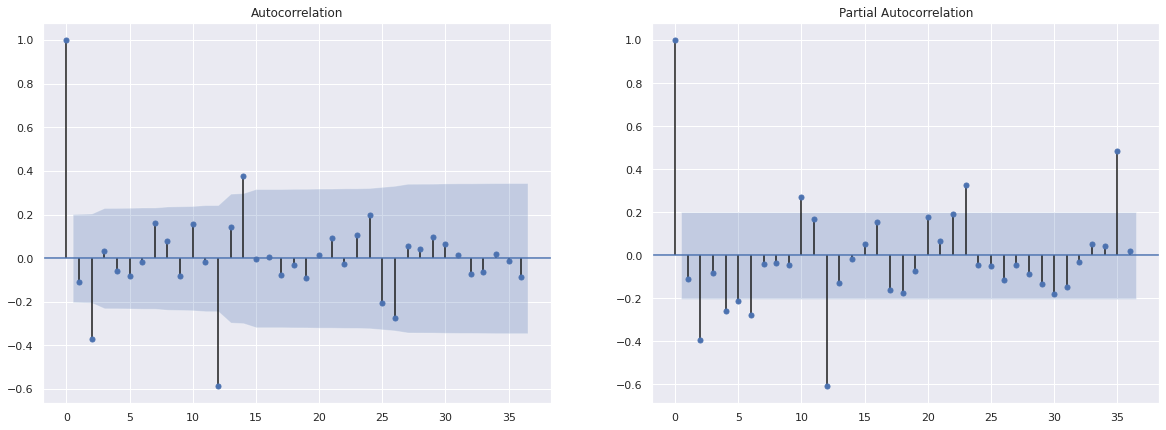

In [327]:
#  Visualisation sur 36 décalages des autocorrélogrammes simple et partiel de la série doublement différenciée
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

plot_acf(conso_r2b, lags = 36, ax=ax1)
plot_pacf(conso_r2b, lags = 36, ax=ax2)
plt.show()

**Sélection des paramètres**

In [328]:
# Instanciation d'un modèle SARIMAX : on repart de notre série non différenciée "conso_r2" pour appliquer le modèle SARIMA qui se chargera de faire la différenciation
model2=sm.tsa.SARIMAX(np.log(conso_r2),order=(1,1,1),seasonal_order=(0,1,1,12))

# Ajustement du modèle sur les données
sarima2=model2.fit()

# Affichage des résultats
print(sarima2.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       Consommation   No. Observations:                  107
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 176.246
Date:                            Fri, 11 Mar 2022   AIC                           -344.492
Time:                                    10:21:15   BIC                           -334.319
Sample:                                01-01-2013   HQIC                          -340.383
                                     - 11-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5185      0.111      4.662      0.000       0.300       0.736
ma.L1         -0.9898      0.236   

In [329]:
#Détermination du meilleur modèle de prévision 
from time import time
DUREE_PREDITE = 12 #prédiction sur 12 mois
troncature = DUREE_PREDITE
y = conso_n
#y = df
y_prevision = y[-troncature:]

#Calcul de toutes les combinaisons de p, d et q
pdq_list = list(itertools.product(range(3),
                             range(2), 
                             range(3)
           ))

#Calcul de toutes les combinaisons de P, D et Q
PDQ_list = [ (*val, 12) for val in list(itertools.product(
                            range(3), 
                            range(2), 
                            range(3))
            )]


#Nombre de configurations total pour un modèle SARIMA
n = len(pdq_list) * len(PDQ_list)

#Dataframe pour stockage des valeurs
results_SARIMA = pd.DataFrame({'modele':[], 'aic':[], 'bic':[], 'ljungbox':[], 'pvalues':[]})
counter = 1
s_time = time()

#Itération sur toutes les combinaisons possible
for pdq in pdq_list:
    for PDQ in PDQ_list:
        try:
            #Instanciation et entrainement du modèle SARIMA
            mod = SARIMAX(np.asarray(y), order = pdq, seasonal_order = PDQ, 
                          enforce_stationarity=False, enforce_invertibility=False)
            result = mod.fit()
                    
            #Intégration des indicateurs dans le précédent dataframe
            results_SARIMA = results_SARIMA.append({'modele':f"{pdq}x{PDQ}", 
                            'aic': result.aic, 
                            'bic': result.bic,
                            'ljungbox': acorr_ljungbox(result.resid, lags=12)[1].mean(),
                            'pvalues': result.pvalues.min()}, 
                            ignore_index=True)
        except:
            continue
            
        clear_output(' ')
        print(f"{counter}/{n} - {time() - s_time:.0f}s")
        counter += 1

324/324 - 165s


In [330]:
from pandas._libs.algos import rank_1d
from pandas.core.algorithms import rank
results_SARIMA_filter = results_SARIMA[(results_SARIMA['ljungbox'] > 0.05)]
results_SARIMA_filter = results_SARIMA_filter[results_SARIMA_filter['pvalues'] < 0.05]

#Utilisation de la fonction .rank() pour déterminer la position de chaque modèle selon la minimisation AIC / BIC
results_SARIMA_filter['rank_bic'] = results_SARIMA_filter['bic'].rank(ascending=True, )
results_SARIMA_filter['rank_aic'] = results_SARIMA_filter['aic'].rank(ascending=True)

#Visualisation des 30 modèles les plus performants sur les 324 initiaux
def highlight_greaterthan(x):
    if x.rank_bic == 15:
        return ['background-color: #2399f9']*7
    else:
        return ['background-color: None']*7

results_SARIMA_filter.sort_values(['rank_aic'], ascending=True)[:30].style.apply(highlight_greaterthan, axis=1)

,modele,aic,bic,ljungbox,pvalues,rank_bic,rank_aic
177,"(1, 1, 0)x(2, 1, 0, 12)",2334.698820,2343.635246,0.177554,0.000000,1.000000,1.000000
178,"(1, 1, 0)x(2, 1, 1, 12)",2335.747768,2346.918300,0.248531,0.000000,2.000000,2.000000
70,"(0, 1, 0)x(2, 1, 1, 12)",2353.733867,2362.727848,0.843645,0.000000,3.000000,3.000000
105,"(0, 1, 2)x(2, 1, 0, 12)",2354.513667,2365.756143,0.066490,0.000000,4.000000,4.000000
106,"(0, 1, 2)x(2, 1, 1, 12)",2356.486103,2369.977074,0.054330,0.000000,7.000000,5.000000
69,"(0, 1, 0)x(2, 1, 0, 12)",2359.254828,2366.000313,0.784913,0.000000,5.000000,6.000000
87,"(0, 1, 1)x(2, 1, 0, 12)",2360.982281,2369.976262,0.068381,0.000000,6.000000,7.000000
88,"(0, 1, 1)x(2, 1, 1, 12)",2362.964239,2374.206715,0.065140,0.000000,8.000000,8.000000
100,"(0, 1, 2)x(1, 1, 1, 12)",2659.590991,2671.438231,0.222200,0.000000,9.000000,9.000000
208,"(1, 1, 2)x(1, 1, 1, 12)",2659.863580,2674.080268,0.118245,0.000000,10.000000,10.000000


In [331]:
model2=sm.tsa.SARIMAX(np.log(conso_r2),order=(1,1,1),seasonal_order=(1,1,1,12))

# Ajustement du modèle sur les données
sarima2=model2.fit()

# Affichage des résultats
print(sarima2.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       Consommation   No. Observations:                  107
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 178.600
Date:                            Fri, 11 Mar 2022   AIC                           -347.200
Time:                                    10:24:03   BIC                           -334.483
Sample:                                01-01-2013   HQIC                          -342.063
                                     - 11-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4939      0.131      3.781      0.000       0.238       0.750
ma.L1         -0.9479      0.076   

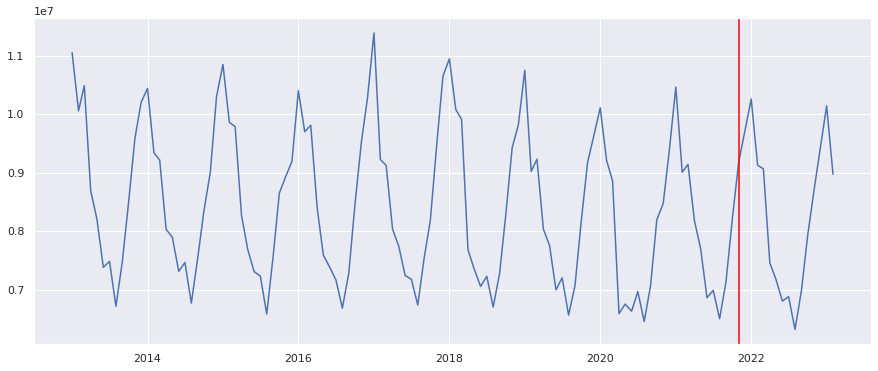

In [332]:
# Prédiction sur 2022 et Visualisation de la série avec les prédictions générées

import datetime

plt.figure(figsize = (15,6))
pred2 = np.exp(sarima2.predict(108, 121))
df_pred2 = pd.concat([conso_r2, pred2])

plt.plot(df_pred2)

plt.axvline(x= datetime.date(2021,11,1), color='red');

##### **Région - 11 - Île-de-France**

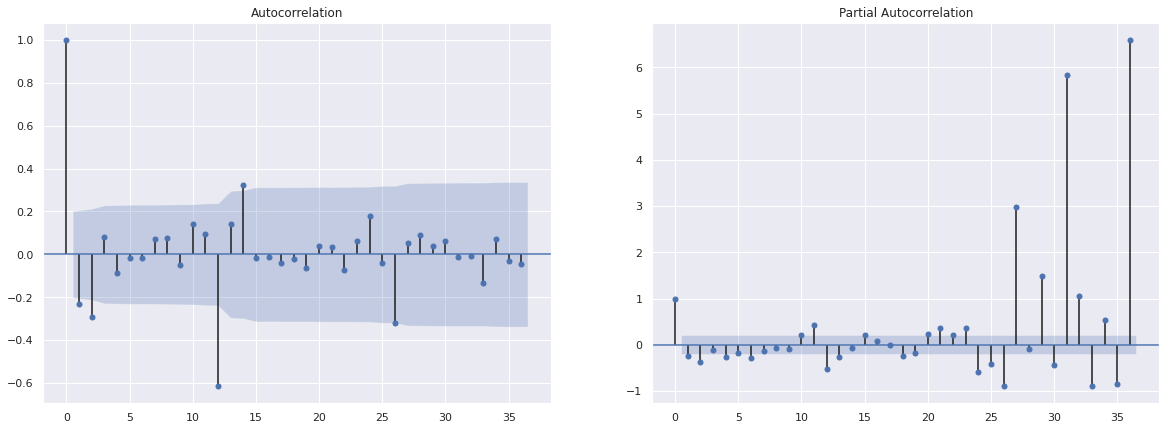

In [333]:
#  Visualisation sur 36 décalages des autocorrélogrammes simple et partiel de la série doublement différenciée
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

plot_acf(conso_r3b, lags = 36, ax=ax1)
plot_pacf(conso_r3b, lags = 36, ax=ax2)
plt.show()

**Sélection des paramètres**

In [334]:
# Instanciation d'un modèle SARIMAX : on repart de notre série non différenciée "conso_r2" pour appliquer le modèle SARIMA qui se chargera de faire la différenciation
model3=sm.tsa.SARIMAX(np.log(conso_r3),order=(1,1,1),seasonal_order=(0,1,1,12))

# Ajustement du modèle sur les données
sarima3=model3.fit()

# Affichage des résultats
print(sarima3.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       Consommation   No. Observations:                  107
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 136.489
Date:                            Fri, 11 Mar 2022   AIC                           -264.978
Time:                                    10:24:05   BIC                           -254.805
Sample:                                01-01-2013   HQIC                          -260.869
                                     - 11-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4030      0.095      4.237      0.000       0.217       0.589
ma.L1         -0.9893      0.213   

In [335]:
#Détermination du meilleur modèle de prévision 
from time import time
DUREE_PREDITE = 12 #prédiction sur 12 mois
troncature = DUREE_PREDITE
y = conso_n
#y = df
y_prevision = y[-troncature:]

#Calcul de toutes les combinaisons de p, d et q
pdq_list = list(itertools.product(range(3),
                             range(2), 
                             range(3)
           ))

#Calcul de toutes les combinaisons de P, D et Q
PDQ_list = [ (*val, 12) for val in list(itertools.product(
                            range(3), 
                            range(2), 
                            range(3))
            )]


#Nombre de configurations total pour un modèle SARIMA
n = len(pdq_list) * len(PDQ_list)

#Dataframe pour stockage des valeurs
results_SARIMA = pd.DataFrame({'modele':[], 'aic':[], 'bic':[], 'ljungbox':[], 'pvalues':[]})
counter = 1
s_time = time()

#Itération sur toutes les combinaisons possible
for pdq in pdq_list:
    for PDQ in PDQ_list:
        try:
            #Instanciation et entrainement du modèle SARIMA
            mod = SARIMAX(np.asarray(y), order = pdq, seasonal_order = PDQ, 
                          enforce_stationarity=False, enforce_invertibility=False)
            result = mod.fit()
                    
            #Intégration des indicateurs dans le précédent dataframe
            results_SARIMA = results_SARIMA.append({'modele':f"{pdq}x{PDQ}", 
                            'aic': result.aic, 
                            'bic': result.bic,
                            'ljungbox': acorr_ljungbox(result.resid, lags=12)[1].mean(),
                            'pvalues': result.pvalues.min()}, 
                            ignore_index=True)
        except:
            continue
            
        clear_output(' ')
        print(f"{counter}/{n} - {time() - s_time:.0f}s")
        counter += 1

324/324 - 167s


In [336]:
from pandas._libs.algos import rank_1d
from pandas.core.algorithms import rank
results_SARIMA_filter = results_SARIMA[(results_SARIMA['ljungbox'] > 0.05)]
results_SARIMA_filter = results_SARIMA_filter[results_SARIMA_filter['pvalues'] < 0.05]

#Utilisation de la fonction .rank() pour déterminer la position de chaque modèle selon la minimisation AIC / BIC
results_SARIMA_filter['rank_bic'] = results_SARIMA_filter['bic'].rank(ascending=True, )
results_SARIMA_filter['rank_aic'] = results_SARIMA_filter['aic'].rank(ascending=True)

#Visualisation des 30 modèles les plus performants sur les 324 initiaux
def highlight_greaterthan(x):
    if x.rank_bic == 15:
        return ['background-color: #2399f9']*7
    else:
        return ['background-color: None']*7

results_SARIMA_filter.sort_values(['rank_aic'], ascending=True)[:30].style.apply(highlight_greaterthan, axis=1)

,modele,aic,bic,ljungbox,pvalues,rank_bic,rank_aic
177,"(1, 1, 0)x(2, 1, 0, 12)",2334.698820,2343.635246,0.177554,0.000000,1.000000,1.000000
178,"(1, 1, 0)x(2, 1, 1, 12)",2335.747768,2346.918300,0.248531,0.000000,2.000000,2.000000
70,"(0, 1, 0)x(2, 1, 1, 12)",2353.733867,2362.727848,0.843645,0.000000,3.000000,3.000000
105,"(0, 1, 2)x(2, 1, 0, 12)",2354.513667,2365.756143,0.066490,0.000000,4.000000,4.000000
106,"(0, 1, 2)x(2, 1, 1, 12)",2356.486103,2369.977074,0.054330,0.000000,7.000000,5.000000
69,"(0, 1, 0)x(2, 1, 0, 12)",2359.254828,2366.000313,0.784913,0.000000,5.000000,6.000000
87,"(0, 1, 1)x(2, 1, 0, 12)",2360.982281,2369.976262,0.068381,0.000000,6.000000,7.000000
88,"(0, 1, 1)x(2, 1, 1, 12)",2362.964239,2374.206715,0.065140,0.000000,8.000000,8.000000
100,"(0, 1, 2)x(1, 1, 1, 12)",2659.590991,2671.438231,0.222200,0.000000,9.000000,9.000000
208,"(1, 1, 2)x(1, 1, 1, 12)",2659.863580,2674.080268,0.118245,0.000000,10.000000,10.000000


In [337]:
model3=sm.tsa.SARIMAX(np.log(conso_r3),order=(1,1,1),seasonal_order=(1,1,1,12))

# Ajustement du modèle sur les données
sarima3=model3.fit()

# Affichage des résultats
print(sarima3.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       Consommation   No. Observations:                  107
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 141.876
Date:                            Fri, 11 Mar 2022   AIC                           -273.753
Time:                                    10:26:54   BIC                           -261.036
Sample:                                01-01-2013   HQIC                          -268.616
                                     - 11-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3454      0.131      2.639      0.008       0.089       0.602
ma.L1         -0.9213      0.076   

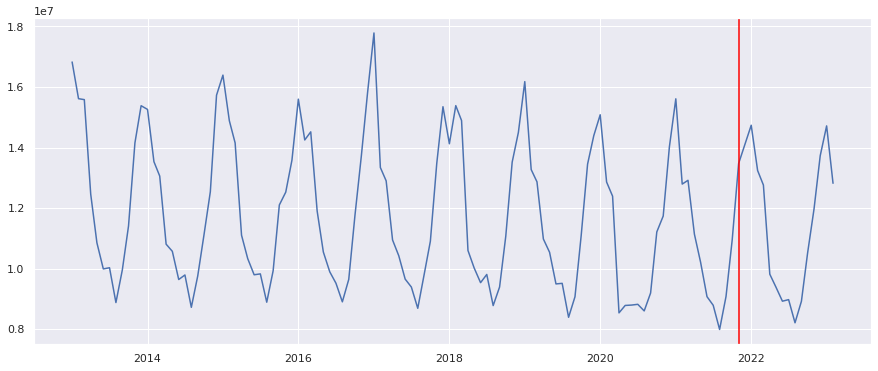

In [338]:
# Prédiction sur 2022 et Visualisation de la série avec les prédictions générées

import datetime

plt.figure(figsize = (15,6))
pred3 = np.exp(sarima3.predict(108, 121))
df_pred3 = pd.concat([conso_r3, pred3])

plt.plot(df_pred3)

plt.axvline(x= datetime.date(2021,11,1), color='red');

### **Conclusion Générale**

**L’exploration de ces données nous a révélé des caractéristiques telles que la non stationnarité de la série de consommation d’électricité et sa très forte inertie (autocorrélation forte et longue). Deux processus de différenciation ont été nécessaires pour rendre la série stationnaire.**
**Les prévisions de SARIMA sont globalement satisfaisantes. Le modèle SARIMA est bien adapté pour prédire la consommation d’électricité plus ponctuelle (à court terme). Il sera plus performant et plus robuste dans des prévisions devant prendre en compte de forts impacts saisonniers.**


## 2/ Régression linéaire - Consommation

### Régression linéaire - Consommation énergétique nationale

#### Intégration des données relatives à la température au Dataframe

In [339]:
df_meteo = pd.read_csv("/content/drive/MyDrive/DA - Projet Energie/Datasets/temperature-quotidienne-regionale.csv", sep = ";")

In [340]:
# Visualisation du Dataframe
df_meteo

,Date,Code INSEE région,Région,TMin (°C),TMax (°C),TMoy (°C)
0,01/01/2016,27,Bourgogne-Franche-Comté,2.22,9.52,5.87
1,01/01/2016,32,Hauts-de-France,1.72,7.72,4.72
2,01/01/2016,52,Pays de la Loire,5.35,10.95,8.15
3,02/01/2016,93,Provence-Alpes-Côte d'Azur,7.78,11.22,9.50
4,03/01/2016,44,Grand Est,3.81,7.37,5.59
...,...,...,...,...,...,...
28881,31/01/2022,53,Bretagne,5.50,10.27,7.89
28882,31/01/2022,24,Centre-Val de Loire,4.92,9.73,7.32
28883,31/01/2022,52,Pays de la Loire,6.20,10.60,8.40
28884,31/01/2022,84,Auvergne-Rhône-Alpes,0.72,7.15,3.94


In [341]:
# Vérification de l'absence de valeurs manquantes
df_meteo.isna().sum(axis = 0)

Date                 0
Code INSEE région    0
Région               0
TMin (°C)            0
TMax (°C)            0
TMoy (°C)            0
dtype: int64

In [342]:
# Concaténation pour ajouter à la colonne Région le code région
df_meteo['Région'] = df_meteo['Code INSEE région'].astype('str') + ' - ' + (df_meteo['Région'])

# Suppression variable 'Code INSEE région'
df_meteo = df_meteo.drop(columns = 'Code INSEE région', axis = 1)


In [343]:
# On souhaite obtenir la colonne "Date" en format datetime
df_meteo['Date'] = pd.to_datetime(df_meteo['Date'])

df_meteo['Date_YYMM'] = df_meteo['Date'].dt.strftime('%Y-%m')

# On transforme la colonne "Date_YYMM" au format datetime

df_meteo['Date_YYMM'] = pd.to_datetime(df_meteo['Date_YYMM'])

In [344]:
# Visualisation du Dataframe modifié
df_meteo

,Date,Région,TMin (°C),TMax (°C),TMoy (°C),Date_YYMM
0,2016-01-01,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01
1,2016-01-01,32 - Hauts-de-France,1.72,7.72,4.72,2016-01-01
2,2016-01-01,52 - Pays de la Loire,5.35,10.95,8.15,2016-01-01
3,2016-02-01,93 - Provence-Alpes-Côte d'Azur,7.78,11.22,9.50,2016-02-01
4,2016-03-01,44 - Grand Est,3.81,7.37,5.59,2016-03-01
...,...,...,...,...,...,...
28881,2022-01-31,53 - Bretagne,5.50,10.27,7.89,2022-01-01
28882,2022-01-31,24 - Centre-Val de Loire,4.92,9.73,7.32,2022-01-01
28883,2022-01-31,52 - Pays de la Loire,6.20,10.60,8.40,2022-01-01
28884,2022-01-31,84 - Auvergne-Rhône-Alpes,0.72,7.15,3.94,2022-01-01


In [345]:
# On utilise un groupby afin d'obtenir la somme des valeurs de consommation et production (pour chaque filière) par mois et années (en non plus par jour et par heure) sans tenir compte de la région
df_energy_merge = df_energy.groupby(['Date','Région']).agg({'Consommation':'sum',
                                               'Thermique':'sum',
                                               'Nucléaire':'sum',
                                               'Eolien':'sum',
                                               'Solaire':'sum',
                                               'Hydraulique':'sum',
                                               'Pompage':'sum',
                                               'Bioénergies':'sum',
                                               'Ech. physiques':'sum'})

In [346]:
# Fusion du DataFrame sur les températures et le Dataframe initial sur les colonnes 'Date' et 'Région'
df_merge = df_meteo.merge(right = df_energy, on = ["Date", "Région"], how = "inner")

In [347]:
# Visualisation du Dataset
df_merge

,Date,Région,TMin (°C),TMax (°C),TMoy (°C),Date_YYMM_x,Heure,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Date_YYMM_y,Date_YY
0,2016-01-01,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01,00:00,2456.0,117.0,0.0,85.0,0.0,23.0,0.0,19.0,2213.0,2016-01-01,2016
1,2016-01-01,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01,00:30,2330.0,119.0,0.0,96.0,0.0,22.0,0.0,19.0,2075.0,2016-01-01,2016
2,2016-01-01,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01,01:00,2243.0,119.0,0.0,87.0,0.0,22.0,0.0,19.0,1996.0,2016-01-01,2016
3,2016-01-01,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01,01:30,2332.0,118.0,0.0,79.0,0.0,22.0,0.0,18.0,2095.0,2016-01-01,2016
4,2016-01-01,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01,02:00,2407.0,121.0,0.0,78.0,0.0,23.0,0.0,18.0,2168.0,2016-01-01,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244155,2021-11-30,93 - Provence-Alpes-Côte d'Azur,0.22,9.63,4.92,2021-11-01,21:30,6456.0,1458.0,0.0,11.0,0.0,999.0,0.0,87.0,3902.0,2021-11-01,2021
1244156,2021-11-30,93 - Provence-Alpes-Côte d'Azur,0.22,9.63,4.92,2021-11-01,22:00,6334.0,1376.0,0.0,13.0,0.0,821.0,0.0,89.0,4035.0,2021-11-01,2021
1244157,2021-11-30,93 - Provence-Alpes-Côte d'Azur,0.22,9.63,4.92,2021-11-01,22:30,6282.0,1483.0,0.0,56.0,0.0,665.0,0.0,88.0,3990.0,2021-11-01,2021
1244158,2021-11-30,93 - Provence-Alpes-Côte d'Azur,0.22,9.63,4.92,2021-11-01,23:00,6325.0,1490.0,0.0,34.0,0.0,642.0,0.0,89.0,4071.0,2021-11-01,2021


In [348]:
 # On supprime les lignes ayant des valeurs manquantes dans la colonne 'consommation'
df_merge = df_merge.dropna(axis = 0, how = 'all', subset =['Consommation'])
 

In [349]:
df_merge

,Date,Région,TMin (°C),TMax (°C),TMoy (°C),Date_YYMM_x,Heure,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Date_YYMM_y,Date_YY
0,2016-01-01,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01,00:00,2456.0,117.0,0.0,85.0,0.0,23.0,0.0,19.0,2213.0,2016-01-01,2016
1,2016-01-01,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01,00:30,2330.0,119.0,0.0,96.0,0.0,22.0,0.0,19.0,2075.0,2016-01-01,2016
2,2016-01-01,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01,01:00,2243.0,119.0,0.0,87.0,0.0,22.0,0.0,19.0,1996.0,2016-01-01,2016
3,2016-01-01,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01,01:30,2332.0,118.0,0.0,79.0,0.0,22.0,0.0,18.0,2095.0,2016-01-01,2016
4,2016-01-01,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01,02:00,2407.0,121.0,0.0,78.0,0.0,23.0,0.0,18.0,2168.0,2016-01-01,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244155,2021-11-30,93 - Provence-Alpes-Côte d'Azur,0.22,9.63,4.92,2021-11-01,21:30,6456.0,1458.0,0.0,11.0,0.0,999.0,0.0,87.0,3902.0,2021-11-01,2021
1244156,2021-11-30,93 - Provence-Alpes-Côte d'Azur,0.22,9.63,4.92,2021-11-01,22:00,6334.0,1376.0,0.0,13.0,0.0,821.0,0.0,89.0,4035.0,2021-11-01,2021
1244157,2021-11-30,93 - Provence-Alpes-Côte d'Azur,0.22,9.63,4.92,2021-11-01,22:30,6282.0,1483.0,0.0,56.0,0.0,665.0,0.0,88.0,3990.0,2021-11-01,2021
1244158,2021-11-30,93 - Provence-Alpes-Côte d'Azur,0.22,9.63,4.92,2021-11-01,23:00,6325.0,1490.0,0.0,34.0,0.0,642.0,0.0,89.0,4071.0,2021-11-01,2021


In [350]:
df_merge_national = df_merge.drop(['Thermique', 'Nucléaire','Eolien', 'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies',
                                   'Ech. physiques'], axis = 1)

In [351]:
df_merge_national

,Date,Région,TMin (°C),TMax (°C),TMoy (°C),Date_YYMM_x,Heure,Consommation,Date_YYMM_y,Date_YY
0,2016-01-01,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01,00:00,2456.0,2016-01-01,2016
1,2016-01-01,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01,00:30,2330.0,2016-01-01,2016
2,2016-01-01,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01,01:00,2243.0,2016-01-01,2016
3,2016-01-01,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01,01:30,2332.0,2016-01-01,2016
4,2016-01-01,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01,02:00,2407.0,2016-01-01,2016
...,...,...,...,...,...,...,...,...,...,...
1244155,2021-11-30,93 - Provence-Alpes-Côte d'Azur,0.22,9.63,4.92,2021-11-01,21:30,6456.0,2021-11-01,2021
1244156,2021-11-30,93 - Provence-Alpes-Côte d'Azur,0.22,9.63,4.92,2021-11-01,22:00,6334.0,2021-11-01,2021
1244157,2021-11-30,93 - Provence-Alpes-Côte d'Azur,0.22,9.63,4.92,2021-11-01,22:30,6282.0,2021-11-01,2021
1244158,2021-11-30,93 - Provence-Alpes-Côte d'Azur,0.22,9.63,4.92,2021-11-01,23:00,6325.0,2021-11-01,2021


In [352]:
df_merge_national["Date"] = df_merge_national['Date'].dt.month

In [353]:
# Création col Heure2 puis conversion au format datetime

df_merge_national["Heure2"] = pd.to_datetime(df_merge_national["Heure"], format = "%H:%M")

# Conversion manuelle nouvelle series Heure2 en valeur numérique (équivalent de la fonction toordinal)

df_merge_national['Heure2'] = df_merge_national['Heure2'].dt.hour * 60 + df_merge_national['Heure2'].dt.minute

df_merge_national

,Date,Région,TMin (°C),TMax (°C),TMoy (°C),Date_YYMM_x,Heure,Consommation,Date_YYMM_y,Date_YY,Heure2
0,1,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01,00:00,2456.0,2016-01-01,2016,0
1,1,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01,00:30,2330.0,2016-01-01,2016,30
2,1,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01,01:00,2243.0,2016-01-01,2016,60
3,1,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01,01:30,2332.0,2016-01-01,2016,90
4,1,27 - Bourgogne-Franche-Comté,2.22,9.52,5.87,2016-01-01,02:00,2407.0,2016-01-01,2016,120
...,...,...,...,...,...,...,...,...,...,...,...
1244155,11,93 - Provence-Alpes-Côte d'Azur,0.22,9.63,4.92,2021-11-01,21:30,6456.0,2021-11-01,2021,1290
1244156,11,93 - Provence-Alpes-Côte d'Azur,0.22,9.63,4.92,2021-11-01,22:00,6334.0,2021-11-01,2021,1320
1244157,11,93 - Provence-Alpes-Côte d'Azur,0.22,9.63,4.92,2021-11-01,22:30,6282.0,2021-11-01,2021,1350
1244158,11,93 - Provence-Alpes-Côte d'Azur,0.22,9.63,4.92,2021-11-01,23:00,6325.0,2021-11-01,2021,1380


In [354]:
df_merge_national = df_merge_national.groupby(by = ["Date", "Heure"]).agg({"Consommation" : "sum", "TMin (°C)" : "mean", "TMax (°C)" : "mean", "TMoy (°C)" : "mean", "Heure2" : "mean"})

In [355]:
df_merge_national

Consommation  TMin (°C)  TMax (°C)  TMoy (°C)  Heure2
Date Heure                                                       
1    00:00    12954152.0   4.480681  11.884946   8.182728     0.0
     00:30    12652263.0   4.480681  11.884946   8.182728    30.0
     01:00    12182781.0   4.480681  11.884946   8.182728    60.0
     01:30    12146028.0   4.480681  11.884946   8.182728    90.0
     02:00    12039548.0   4.480681  11.884946   8.182728   120.0
...                  ...        ...        ...        ...     ...
12   21:30    10080384.0   5.320457  12.585742   8.953403  1290.0
     22:00     9882229.0   5.320457  12.585742   8.953403  1320.0
     22:30     9935671.0   5.320457  12.585742   8.953403  1350.0
     23:00    10321283.0   5.320457  12.585742   8.953403  1380.0
     23:30    10212971.0   5.320457  12.585742   8.953403  1410.0

[576 rows x 5 columns]

In [356]:
df_merge_national = df_merge_national.reset_index()

In [357]:
df_merge_national

,Date,Heure,Consommation,TMin (°C),TMax (°C),TMoy (°C),Heure2
0,1,00:00,12954152.0,4.480681,11.884946,8.182728,0.0
1,1,00:30,12652263.0,4.480681,11.884946,8.182728,30.0
2,1,01:00,12182781.0,4.480681,11.884946,8.182728,60.0
3,1,01:30,12146028.0,4.480681,11.884946,8.182728,90.0
4,1,02:00,12039548.0,4.480681,11.884946,8.182728,120.0
...,...,...,...,...,...,...,...
571,12,21:30,10080384.0,5.320457,12.585742,8.953403,1290.0
572,12,22:00,9882229.0,5.320457,12.585742,8.953403,1320.0
573,12,22:30,9935671.0,5.320457,12.585742,8.953403,1350.0
574,12,23:00,10321283.0,5.320457,12.585742,8.953403,1380.0


#### Entraînement du modèle sur la consommation au niveau national

In [358]:
df_merge_national

,Date,Heure,Consommation,TMin (°C),TMax (°C),TMoy (°C),Heure2
0,1,00:00,12954152.0,4.480681,11.884946,8.182728,0.0
1,1,00:30,12652263.0,4.480681,11.884946,8.182728,30.0
2,1,01:00,12182781.0,4.480681,11.884946,8.182728,60.0
3,1,01:30,12146028.0,4.480681,11.884946,8.182728,90.0
4,1,02:00,12039548.0,4.480681,11.884946,8.182728,120.0
...,...,...,...,...,...,...,...
571,12,21:30,10080384.0,5.320457,12.585742,8.953403,1290.0
572,12,22:00,9882229.0,5.320457,12.585742,8.953403,1320.0
573,12,22:30,9935671.0,5.320457,12.585742,8.953403,1350.0
574,12,23:00,10321283.0,5.320457,12.585742,8.953403,1380.0


In [359]:
data_national = df_merge_national.drop(["Consommation", "Heure"], axis = 1)

In [360]:
data_national

,Date,TMin (°C),TMax (°C),TMoy (°C),Heure2
0,1,4.480681,11.884946,8.182728,0.0
1,1,4.480681,11.884946,8.182728,30.0
2,1,4.480681,11.884946,8.182728,60.0
3,1,4.480681,11.884946,8.182728,90.0
4,1,4.480681,11.884946,8.182728,120.0
...,...,...,...,...,...
571,12,5.320457,12.585742,8.953403,1290.0
572,12,5.320457,12.585742,8.953403,1320.0
573,12,5.320457,12.585742,8.953403,1350.0
574,12,5.320457,12.585742,8.953403,1380.0


In [361]:
target_national = df_merge_national['Consommation']

In [362]:
target_national

0      12954152.0
1      12652263.0
2      12182781.0
3      12146028.0
4      12039548.0
          ...    
571    10080384.0
572     9882229.0
573     9935671.0
574    10321283.0
575    10212971.0
Name: Consommation, Length: 576, dtype: float64

In [363]:
X_train_national, X_test_national, y_train_national, y_test_national = train_test_split(data_national, target_national, test_size = 0.2)


In [364]:
# Instanciation d'un régresseur lr de la classe LinearRegression.


lrm_national = LinearRegression()


# Ajustement du modèle


lrm_national.fit(X_train_national, y_train_national)

LinearRegression()

In [365]:
# Affichage de l'intercept ainsi que des coefficients de chaque variable estimée par le modèle. 

coeffs_national = list(lrm_national.coef_)
coeffs_national.insert(0, lrm_national.intercept_)

feats_national = list(data_national.columns)
feats_national.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs_national}, index=feats_national)

,valeur estimée
intercept,1.861831e+07
Date,-1.632772e+05
TMin (°C),1.299652e+09
TMax (°C),1.298432e+09
TMoy (°C),-2.598307e+09
Heure2,9.386182e+02


In [366]:
# Affichage du score (R²) du modèle sur l'échantillon d'apprentissage national

print(lrm_national.score(X_train_national, y_train_national))

# Affichage du score obtenu par validation croisée grâce à la fonction cross_val_score().

print(cross_val_score(lrm_national, X_train_national, y_train_national).mean())

0.8243888418626433
0.8141196127513399


**Les scores obtenus sur l'échantillon d'apprentissage sont satisfaisants, aussi bien pour le R² que pour la validation croisée.**

In [367]:
# Affichage du score du modèle sur l'ensemble de test national

print(lrm_national.score(X_test_national, y_test_national))

0.7404899535101236


Observation : le score obtenu sur l'échantillon de test est également satisfaisant et ne suppose pas de problème d'overfitting.

In [368]:
# Stockage des prédictions du modèle pour X_test dans pred_test 

pred_test_national = lrm_national.predict(X_test_national)

In [369]:
pred_test_national

array([10830029.87392959, 10371481.34491166,  8976931.79907236,
        8440369.08055219, 10568591.16392097,  9342992.89151821,
       12502419.24203882,  9637067.83019313,  8383347.18242607,
       10248130.31898174,  8382312.78148469,  8128885.87132987,
        8607581.14606676,  9083444.60421571,  9366415.97094497,
       11618469.14996681, 11244396.25766715, 10801871.32835683,
        8887720.69620809, 10624908.25506648, 10678934.01638517,
        8832849.51064882,  8803245.05948982,  8049653.22631034,
       12671370.51547536,  8970810.42192468, 11731103.33225784,
        8045444.63555297, 10427798.43605718,  8861008.05622157,
        7965177.58959207,  8495981.3647171 ,  9455627.07380924,
        7764563.98680601,  9568261.25610027,  7847300.4156023 ,
        8100727.32575712, 13516126.88265809,  8664932.63815364,
        9310098.87979946,  7908860.49844655,  9033248.89021787,
        7430165.22370967, 10097152.24483499,  7201393.07535085,
       11027139.69293889,  8692056.78278

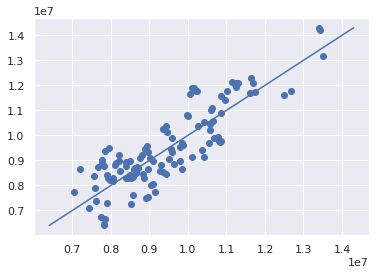

In [370]:
# Affichage dans un graphique du nuage de points entre pred_test et y_test, en ajoutant la droite d'équation  y=x

plt.scatter(pred_test_national, y_test_national)
plt.plot((y_test_national.min(), y_test_national.max()), (y_test_national.min(), y_test_national.max()));

**Les points sont proches de la droite, ce qui signifie que la régression est de bonne qualité.**

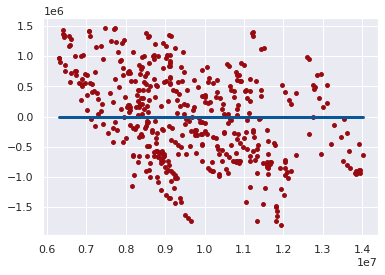

In [371]:
# Calculer les valeurs ajustées (pred_train) puis les résidus (residus) du modèle.lrm

pred_train_national = lrm_national.predict(X_train_national)

residus_national = pred_train_national - y_train_national

# Afficher le nuage des points représentant les résidus en fonction des valeurs de y_train.

plt.scatter(y_train_national, residus_national, color='#980a10', s=15)

plt.plot((y_train_national.min(), y_train_national.max()), (0, 0), lw=3, color='#0a5798')

**Les résidus sont équitablement répartis des deux côtés de la droite de régression.**

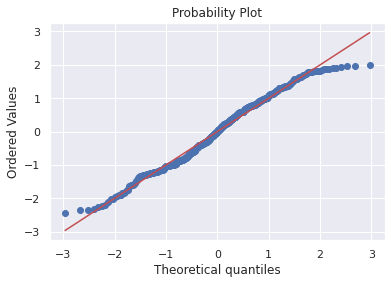

In [372]:
#Centrer réduire les résidus dans un vecteur appelé residus_norm.

residus_norm_national = (residus_national-residus_national.mean())/residus_national.std()

# Afficher le QQ-Plot en appliquant la fonction stats.probplot à residus_norm.


stats.probplot(residus_norm_national)

# Ajouter l'argument plot=plt pour pouvoir l'afficher avec matplotlib grâce à la commande plt.show().

stats.probplot(residus_norm_national, plot = plt)

plt.show()

**L'hypothèse de normalité est plausible, les points s'alignent le long de la droite.**

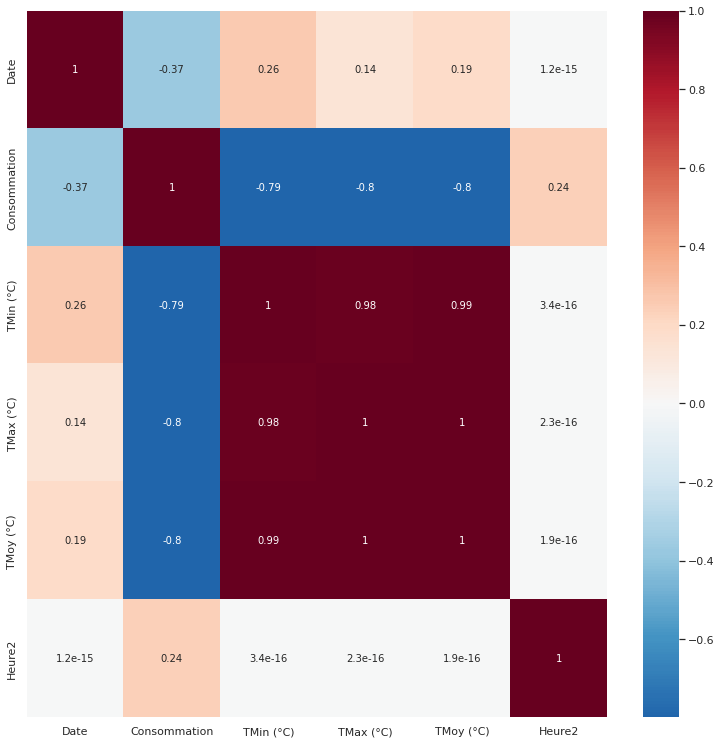

In [373]:
# Afficher une heatmap des corrélations entre chaque paire de variables de df, avec 0 pour centre et 
# utiliser la palette 'RdBu_r'.

plt.figure(figsize=(13, 13))

sns.heatmap(df_merge_national.corr(), annot = True, cmap = 'RdBu_r', center = 0)

**Cette heatmap nous permet de confirmer que la variable Consommation est fortement négativement corrélée aux variables liées à la température, c'est-à-dire que plus la température augmente et plus la consommation diminue.**

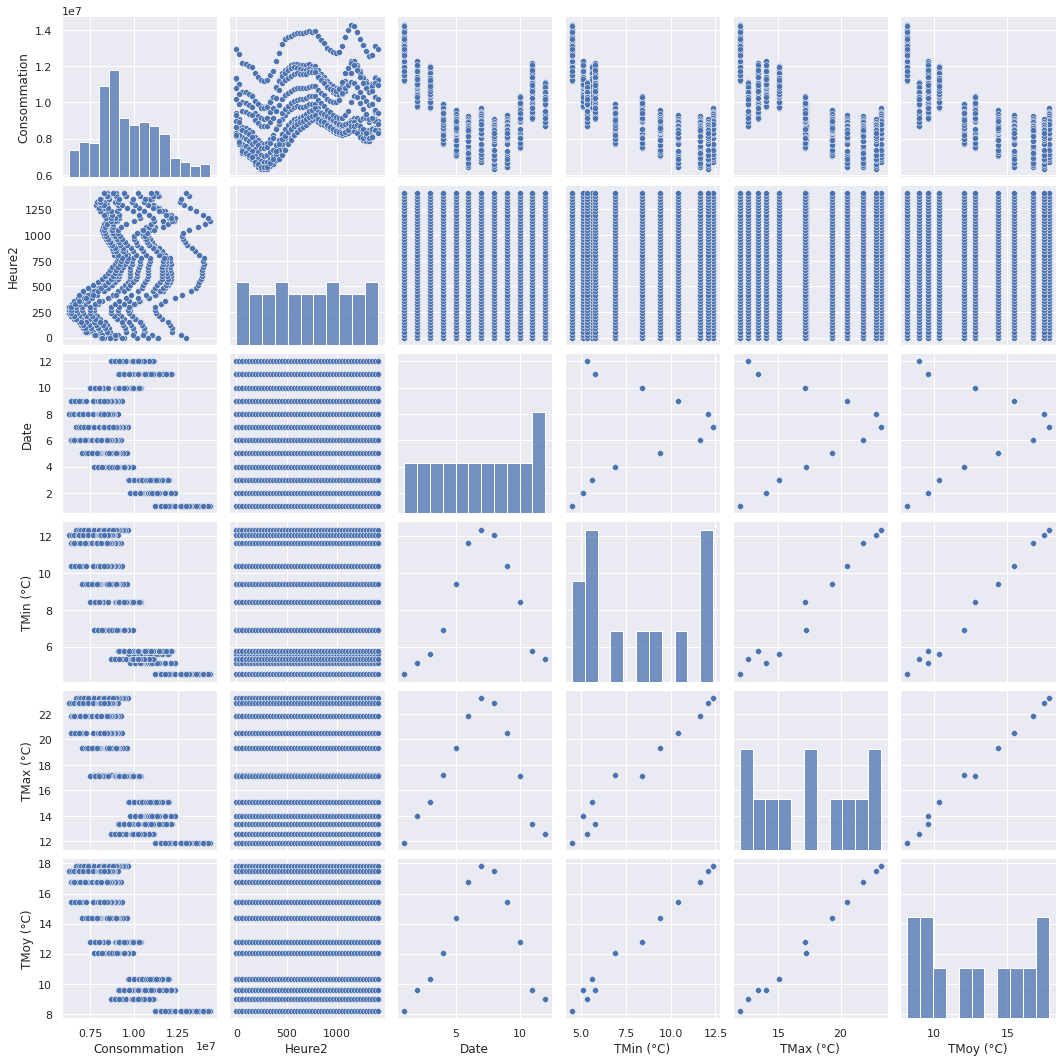

In [374]:
# Afficher une matrice des nuages de points entre les variables 'curb-weight', 'horsepower', 'highway-mpg', 'height', 
# 'bore', 'width' et 'price' de df.

sns.pairplot(df_merge_national[['Consommation', 'Heure2', 'Date', 'TMin (°C)', 'TMax (°C)', 'TMoy (°C)']]);


**Ce pairplot confirme que la régression linéaire est possible entre les variables Consommation et les variables de Température.**
**Les variables Date et Heure2 ne permettent pas d'établir de corrélation linéaire avec la Consommation mais de constater une saisonnalité.**

### Prédiction de la consommation au 1er semestre 2023, en considérant une hypothèse de réchauffement climatique de 10% (par rapport aux températures moyennes des 6 dernières années)

In [375]:
df_merge_national

,Date,Heure,Consommation,TMin (°C),TMax (°C),TMoy (°C),Heure2
0,1,00:00,12954152.0,4.480681,11.884946,8.182728,0.0
1,1,00:30,12652263.0,4.480681,11.884946,8.182728,30.0
2,1,01:00,12182781.0,4.480681,11.884946,8.182728,60.0
3,1,01:30,12146028.0,4.480681,11.884946,8.182728,90.0
4,1,02:00,12039548.0,4.480681,11.884946,8.182728,120.0
...,...,...,...,...,...,...,...
571,12,21:30,10080384.0,5.320457,12.585742,8.953403,1290.0
572,12,22:00,9882229.0,5.320457,12.585742,8.953403,1320.0
573,12,22:30,9935671.0,5.320457,12.585742,8.953403,1350.0
574,12,23:00,10321283.0,5.320457,12.585742,8.953403,1380.0


In [376]:
X_futur_national = df_merge_national.drop(["Consommation", "Heure"], axis = 1)

In [377]:
X_futur_national

,Date,TMin (°C),TMax (°C),TMoy (°C),Heure2
0,1,4.480681,11.884946,8.182728,0.0
1,1,4.480681,11.884946,8.182728,30.0
2,1,4.480681,11.884946,8.182728,60.0
3,1,4.480681,11.884946,8.182728,90.0
4,1,4.480681,11.884946,8.182728,120.0
...,...,...,...,...,...
571,12,5.320457,12.585742,8.953403,1290.0
572,12,5.320457,12.585742,8.953403,1320.0
573,12,5.320457,12.585742,8.953403,1350.0
574,12,5.320457,12.585742,8.953403,1380.0


In [378]:
X_futur_national = X_futur_national[X_futur_national["Date"] <= 6]

In [379]:
X_futur_national

,Date,TMin (°C),TMax (°C),TMoy (°C),Heure2
0,1,4.480681,11.884946,8.182728,0.0
1,1,4.480681,11.884946,8.182728,30.0
2,1,4.480681,11.884946,8.182728,60.0
3,1,4.480681,11.884946,8.182728,90.0
4,1,4.480681,11.884946,8.182728,120.0
...,...,...,...,...,...
283,6,11.654583,21.842398,16.748537,1290.0
284,6,11.654583,21.842398,16.748537,1320.0
285,6,11.654583,21.842398,16.748537,1350.0
286,6,11.654583,21.842398,16.748537,1380.0


In [380]:
X_futur_national[["TMin (°C)", "TMax (°C)", "TMoy (°C)"]] = X_futur_national[["TMin (°C)", "TMax (°C)", "TMoy (°C)"]] * 1.1

In [381]:
X_futur_national

,Date,TMin (°C),TMax (°C),TMoy (°C),Heure2
0,1,4.928749,13.073441,9.001001,0.0
1,1,4.928749,13.073441,9.001001,30.0
2,1,4.928749,13.073441,9.001001,60.0
3,1,4.928749,13.073441,9.001001,90.0
4,1,4.928749,13.073441,9.001001,120.0
...,...,...,...,...,...
283,6,12.820042,24.026638,18.423391,1290.0
284,6,12.820042,24.026638,18.423391,1320.0
285,6,12.820042,24.026638,18.423391,1350.0
286,6,12.820042,24.026638,18.423391,1380.0


In [382]:
pred_futur_national = lrm_national.predict(X_futur_national)

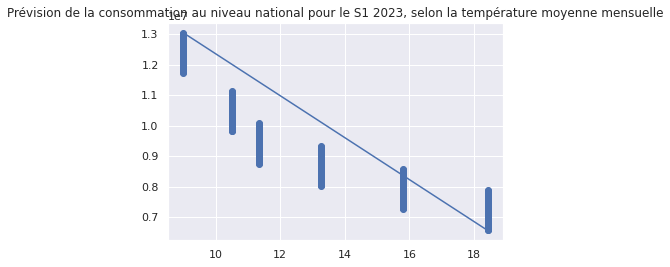

In [383]:
plt.scatter(X_futur_national["TMoy (°C)"], pred_futur_national)
plt.plot((X_futur_national["TMoy (°C)"].min(), X_futur_national["TMoy (°C)"].max()), (pred_futur_national.max(), pred_futur_national.min()));
plt.title("Prévision de la consommation au niveau national pour le S1 2023, selon la température moyenne mensuelle");

**Pour les 6 premiers mois de 2023, avec une hypothèse d'augmentation de 10% de la température moyenne mensuelle, et pour chaque demi-heure, on peut observer une variation de consommation nationale corrélée aux demi-heures.**
**La tendance globale de ces variations horaires reste baissière selon la température moyenne mensuelle.**

### Régression linéaire - Consommation énergétique régionale

Nous recuperons les régions Grand Est, Hauts de France et Ile de France, identifiées respectivement comme régions en excédent de production, en auto-suffisance de production et en déficit de production, lors de la constitution des visualisations graphiques:

*   excédent de production : **44 - Grand Est**
*   auto-suffisance de production : **32 - Hauts de France**
*   déficit de production : **11 - Ile de France**

#### **Région - 44 - Grand Est**

In [384]:
 # On filtre sur "44 - Grand Est" en associant à "df_merge_GE"

df_merge_GE = df_merge[df_merge["Région"] == '44 - Grand Est']
df_merge_GE

,Date,Région,TMin (°C),TMax (°C),TMoy (°C),Date_YYMM_x,Heure,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Date_YYMM_y,Date_YY
192,2016-03-01,44 - Grand Est,3.81,7.37,5.59,2016-03-01,00:00,6484.0,1424.0,10185.0,447.0,0.0,1044.0,0.0,102.0,-6716.0,2016-03-01,2016
193,2016-03-01,44 - Grand Est,3.81,7.37,5.59,2016-03-01,00:30,6263.0,1322.0,10198.0,402.0,0.0,1028.0,0.0,96.0,-6784.0,2016-03-01,2016
194,2016-03-01,44 - Grand Est,3.81,7.37,5.59,2016-03-01,01:00,6200.0,1277.0,10191.0,301.0,0.0,1033.0,-537.0,96.0,-6160.0,2016-03-01,2016
195,2016-03-01,44 - Grand Est,3.81,7.37,5.59,2016-03-01,01:30,6107.0,1323.0,10210.0,241.0,0.0,1031.0,-535.0,97.0,-6259.0,2016-03-01,2016
196,2016-03-01,44 - Grand Est,3.81,7.37,5.59,2016-03-01,02:00,6289.0,1274.0,10067.0,179.0,0.0,1025.0,-534.0,96.0,-5817.0,2016-03-01,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242619,2021-11-29,44 - Grand Est,0.34,3.62,1.98,2021-11-01,21:30,6470.0,2404.0,8035.0,1090.0,1.0,437.0,0.0,149.0,-5646.0,2021-11-01,2021
1242620,2021-11-29,44 - Grand Est,0.34,3.62,1.98,2021-11-01,22:00,6397.0,2236.0,8035.0,1247.0,1.0,427.0,-354.0,148.0,-5344.0,2021-11-01,2021
1242621,2021-11-29,44 - Grand Est,0.34,3.62,1.98,2021-11-01,22:30,6340.0,2189.0,8036.0,1343.0,1.0,443.0,-352.0,148.0,-5467.0,2021-11-01,2021
1242622,2021-11-29,44 - Grand Est,0.34,3.62,1.98,2021-11-01,23:00,6449.0,2229.0,8033.0,1363.0,1.0,443.0,-351.0,146.0,-5415.0,2021-11-01,2021


In [385]:
# Suppression de colonnes et visualisation
df_merge_GE = df_merge_GE.drop(['Thermique', 'Nucléaire','Eolien', 'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies','Ech. physiques', 'Date_YYMM_y', 'Date_YY','Date_YYMM_x'], axis = 1)
df_merge_GE

,Date,Région,TMin (°C),TMax (°C),TMoy (°C),Heure,Consommation
192,2016-03-01,44 - Grand Est,3.81,7.37,5.59,00:00,6484.0
193,2016-03-01,44 - Grand Est,3.81,7.37,5.59,00:30,6263.0
194,2016-03-01,44 - Grand Est,3.81,7.37,5.59,01:00,6200.0
195,2016-03-01,44 - Grand Est,3.81,7.37,5.59,01:30,6107.0
196,2016-03-01,44 - Grand Est,3.81,7.37,5.59,02:00,6289.0
...,...,...,...,...,...,...,...
1242619,2021-11-29,44 - Grand Est,0.34,3.62,1.98,21:30,6470.0
1242620,2021-11-29,44 - Grand Est,0.34,3.62,1.98,22:00,6397.0
1242621,2021-11-29,44 - Grand Est,0.34,3.62,1.98,22:30,6340.0
1242622,2021-11-29,44 - Grand Est,0.34,3.62,1.98,23:00,6449.0


In [386]:
# Création colonne des mois
df_merge_GE["Month"] = df_merge_GE['Date'].dt.month
df_merge_GE

,Date,Région,TMin (°C),TMax (°C),TMoy (°C),Heure,Consommation,Month
192,2016-03-01,44 - Grand Est,3.81,7.37,5.59,00:00,6484.0,3
193,2016-03-01,44 - Grand Est,3.81,7.37,5.59,00:30,6263.0,3
194,2016-03-01,44 - Grand Est,3.81,7.37,5.59,01:00,6200.0,3
195,2016-03-01,44 - Grand Est,3.81,7.37,5.59,01:30,6107.0,3
196,2016-03-01,44 - Grand Est,3.81,7.37,5.59,02:00,6289.0,3
...,...,...,...,...,...,...,...,...
1242619,2021-11-29,44 - Grand Est,0.34,3.62,1.98,21:30,6470.0,11
1242620,2021-11-29,44 - Grand Est,0.34,3.62,1.98,22:00,6397.0,11
1242621,2021-11-29,44 - Grand Est,0.34,3.62,1.98,22:30,6340.0,11
1242622,2021-11-29,44 - Grand Est,0.34,3.62,1.98,23:00,6449.0,11


In [387]:
# Réalisation aggrégation sur les colonnes "Month" et "Heure"
functions_to_apply = {'TMin (°C)' : 'mean',
                      'TMax (°C)' : 'mean',
                      'TMoy (°C)' : 'mean',
                      'Consommation' : 'sum'}

df_merge_GE = df_merge_GE.groupby(["Month", "Heure"]).agg(functions_to_apply)

df_merge_GE = df_merge_GE.reset_index()

# Création col Heure2 puis conversion au format datetime

df_merge_GE["Heure2"] = pd.to_datetime(df_merge_GE["Heure"], format = "%H:%M")

# Conversion manuelle nouvelle series Heure2 en valeur numérique (équivalent de la fonction toordinal)

df_merge_GE['Heure2'] = df_merge_GE['Heure2'].dt.hour * 60 + df_merge_GE['Heure2'].dt.minute

df_merge_GE

,Month,Heure,TMin (°C),TMax (°C),TMoy (°C),Consommation,Heure2
0,1,00:00,2.450376,9.780914,6.115591,1150176.0,0
1,1,00:30,2.450376,9.780914,6.115591,1127328.0,30
2,1,01:00,2.450376,9.780914,6.115591,1096770.0,60
3,1,01:30,2.450376,9.780914,6.115591,1103896.0,90
4,1,02:00,2.450376,9.780914,6.115591,1118381.0,120
...,...,...,...,...,...,...,...
571,12,21:30,3.870323,10.910387,7.390452,929762.0,1290
572,12,22:00,3.870323,10.910387,7.390452,910701.0,1320
573,12,22:30,3.870323,10.910387,7.390452,913438.0,1350
574,12,23:00,3.870323,10.910387,7.390452,914311.0,1380


#### **Région - 32 - Hauts de France**

In [388]:
# On filtre sur "32 - Hauts de France" en associant à "df_merge_HDF"

df_merge_HDF = df_merge[df_merge["Région"] == '32 - Hauts-de-France']

df_merge_HDF


,Date,Région,TMin (°C),TMax (°C),TMoy (°C),Date_YYMM_x,Heure,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Date_YYMM_y,Date_YY
48,2016-01-01,32 - Hauts-de-France,1.72,7.72,4.72,2016-01-01,00:00,5969.0,510.0,5223.0,882.0,0.0,2.0,0.0,136.0,-784.0,2016-01-01,2016
49,2016-01-01,32 - Hauts-de-France,1.72,7.72,4.72,2016-01-01,00:30,5970.0,478.0,5166.0,868.0,0.0,2.0,0.0,125.0,-670.0,2016-01-01,2016
50,2016-01-01,32 - Hauts-de-France,1.72,7.72,4.72,2016-01-01,01:00,5755.0,528.0,5022.0,779.0,0.0,2.0,0.0,126.0,-703.0,2016-01-01,2016
51,2016-01-01,32 - Hauts-de-France,1.72,7.72,4.72,2016-01-01,01:30,5793.0,526.0,5161.0,657.0,0.0,2.0,0.0,125.0,-679.0,2016-01-01,2016
52,2016-01-01,32 - Hauts-de-France,1.72,7.72,4.72,2016-01-01,02:00,5695.0,523.0,5140.0,563.0,0.0,2.0,0.0,125.0,-658.0,2016-01-01,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243867,2021-11-28,32 - Hauts-de-France,2.12,4.82,3.47,2021-11-01,21:30,6754.0,2044.0,3681.0,1429.0,0.0,2.0,0.0,114.0,-516.0,2021-11-01,2021
1243868,2021-11-28,32 - Hauts-de-France,2.12,4.82,3.47,2021-11-01,22:00,6767.0,1965.0,3679.0,1441.0,0.0,2.0,0.0,114.0,-434.0,2021-11-01,2021
1243869,2021-11-28,32 - Hauts-de-France,2.12,4.82,3.47,2021-11-01,22:30,6535.0,1894.0,3680.0,1370.0,0.0,2.0,0.0,112.0,-522.0,2021-11-01,2021
1243870,2021-11-28,32 - Hauts-de-France,2.12,4.82,3.47,2021-11-01,23:00,6590.0,1924.0,3666.0,1475.0,0.0,2.0,0.0,116.0,-592.0,2021-11-01,2021


In [389]:
# Suppression de colonnes et visualisation
df_merge_HDF = df_merge_HDF.drop(['Thermique', 'Nucléaire','Eolien', 'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies','Ech. physiques', 'Date_YYMM_y', 'Date_YY','Date_YYMM_x'], axis = 1)
df_merge_HDF

,Date,Région,TMin (°C),TMax (°C),TMoy (°C),Heure,Consommation
48,2016-01-01,32 - Hauts-de-France,1.72,7.72,4.72,00:00,5969.0
49,2016-01-01,32 - Hauts-de-France,1.72,7.72,4.72,00:30,5970.0
50,2016-01-01,32 - Hauts-de-France,1.72,7.72,4.72,01:00,5755.0
51,2016-01-01,32 - Hauts-de-France,1.72,7.72,4.72,01:30,5793.0
52,2016-01-01,32 - Hauts-de-France,1.72,7.72,4.72,02:00,5695.0
...,...,...,...,...,...,...,...
1243867,2021-11-28,32 - Hauts-de-France,2.12,4.82,3.47,21:30,6754.0
1243868,2021-11-28,32 - Hauts-de-France,2.12,4.82,3.47,22:00,6767.0
1243869,2021-11-28,32 - Hauts-de-France,2.12,4.82,3.47,22:30,6535.0
1243870,2021-11-28,32 - Hauts-de-France,2.12,4.82,3.47,23:00,6590.0


In [390]:
# Création colonne des mois
df_merge_HDF["Month"] = df_merge_HDF['Date'].dt.month
df_merge_HDF

,Date,Région,TMin (°C),TMax (°C),TMoy (°C),Heure,Consommation,Month
48,2016-01-01,32 - Hauts-de-France,1.72,7.72,4.72,00:00,5969.0,1
49,2016-01-01,32 - Hauts-de-France,1.72,7.72,4.72,00:30,5970.0,1
50,2016-01-01,32 - Hauts-de-France,1.72,7.72,4.72,01:00,5755.0,1
51,2016-01-01,32 - Hauts-de-France,1.72,7.72,4.72,01:30,5793.0,1
52,2016-01-01,32 - Hauts-de-France,1.72,7.72,4.72,02:00,5695.0,1
...,...,...,...,...,...,...,...,...
1243867,2021-11-28,32 - Hauts-de-France,2.12,4.82,3.47,21:30,6754.0,11
1243868,2021-11-28,32 - Hauts-de-France,2.12,4.82,3.47,22:00,6767.0,11
1243869,2021-11-28,32 - Hauts-de-France,2.12,4.82,3.47,22:30,6535.0,11
1243870,2021-11-28,32 - Hauts-de-France,2.12,4.82,3.47,23:00,6590.0,11


In [391]:
# Réalisation aggrégation sur les colonnes "Month" et "Heure"
functions_to_apply = {'TMin (°C)' : 'mean',
                      'TMax (°C)' : 'mean',
                      'TMoy (°C)' : 'mean',
                      'Consommation' : 'sum'}

df_merge_HDF = df_merge_HDF.groupby(["Month", "Heure"]).agg(functions_to_apply)

df_merge_HDF = df_merge_HDF.reset_index()

# Création col Heure2 puis conversion au format datetime

df_merge_HDF["Heure2"] = pd.to_datetime(df_merge_HDF["Heure"], format = "%H:%M")

# Conversion manuelle nouvelle series Heure2 en valeur numérique (équivalent de la fonction toordinal)

df_merge_HDF['Heure2'] = df_merge_HDF['Heure2'].dt.hour * 60 + df_merge_HDF['Heure2'].dt.minute

df_merge_HDF

,Month,Heure,TMin (°C),TMax (°C),TMoy (°C),Consommation,Heure2
0,1,00:00,4.012796,9.996989,7.004892,1329682.0,0
1,1,00:30,4.012796,9.996989,7.004892,1316067.0,30
2,1,01:00,4.012796,9.996989,7.004892,1278922.0,60
3,1,01:30,4.012796,9.996989,7.004892,1287343.0,90
4,1,02:00,4.012796,9.996989,7.004892,1257137.0,120
...,...,...,...,...,...,...,...
571,12,21:30,5.317484,11.081097,8.199290,1019986.0,1290
572,12,22:00,5.317484,11.081097,8.199290,1015620.0,1320
573,12,22:30,5.317484,11.081097,8.199290,1000808.0,1350
574,12,23:00,5.317484,11.081097,8.199290,1004642.0,1380


#### **Région - 11 - Ile de France**

In [392]:
# On filtre sur "11 - Ile de France" en associant à "df_merge_IDF"

df_merge_IDF = df_merge[df_merge["Région"] == '11 - Île-de-France']
df_merge_IDF

,Date,Région,TMin (°C),TMax (°C),TMoy (°C),Date_YYMM_x,Heure,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Date_YYMM_y,Date_YY
1248,2016-11-01,11 - Île-de-France,3.64,8.80,6.22,2016-11-01,00:00,7906.0,297.0,0.0,4.0,0.0,9.0,0.0,151.0,7444.0,2016-11-01,2016
1249,2016-11-01,11 - Île-de-France,3.64,8.80,6.22,2016-11-01,00:30,7624.0,300.0,0.0,4.0,0.0,9.0,0.0,154.0,7157.0,2016-11-01,2016
1250,2016-11-01,11 - Île-de-France,3.64,8.80,6.22,2016-11-01,01:00,7230.0,305.0,0.0,3.0,0.0,9.0,0.0,152.0,6761.0,2016-11-01,2016
1251,2016-11-01,11 - Île-de-France,3.64,8.80,6.22,2016-11-01,01:30,6860.0,317.0,0.0,2.0,0.0,9.0,0.0,149.0,6382.0,2016-11-01,2016
1252,2016-11-01,11 - Île-de-France,3.64,8.80,6.22,2016-11-01,02:00,6658.0,327.0,0.0,3.0,0.0,9.0,0.0,151.0,6168.0,2016-11-01,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243435,2021-11-25,11 - Île-de-France,0.72,6.42,3.57,2021-11-01,21:30,10582.0,542.0,0.0,27.0,0.0,3.0,0.0,146.0,9863.0,2021-11-01,2021
1243436,2021-11-25,11 - Île-de-France,0.72,6.42,3.57,2021-11-01,22:00,10218.0,546.0,0.0,20.0,0.0,3.0,0.0,145.0,9504.0,2021-11-01,2021
1243437,2021-11-25,11 - Île-de-France,0.72,6.42,3.57,2021-11-01,22:30,10106.0,545.0,0.0,28.0,0.0,3.0,0.0,148.0,9383.0,2021-11-01,2021
1243438,2021-11-25,11 - Île-de-France,0.72,6.42,3.57,2021-11-01,23:00,10376.0,545.0,0.0,41.0,0.0,3.0,0.0,149.0,9638.0,2021-11-01,2021


In [393]:
# Suppression de colonnes et visualisation
df_merge_IDF = df_merge_IDF.drop(['Thermique', 'Nucléaire','Eolien', 'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies','Ech. physiques', 'Date_YYMM_y', 'Date_YY','Date_YYMM_x'], axis = 1)
df_merge_IDF

,Date,Région,TMin (°C),TMax (°C),TMoy (°C),Heure,Consommation
1248,2016-11-01,11 - Île-de-France,3.64,8.80,6.22,00:00,7906.0
1249,2016-11-01,11 - Île-de-France,3.64,8.80,6.22,00:30,7624.0
1250,2016-11-01,11 - Île-de-France,3.64,8.80,6.22,01:00,7230.0
1251,2016-11-01,11 - Île-de-France,3.64,8.80,6.22,01:30,6860.0
1252,2016-11-01,11 - Île-de-France,3.64,8.80,6.22,02:00,6658.0
...,...,...,...,...,...,...,...
1243435,2021-11-25,11 - Île-de-France,0.72,6.42,3.57,21:30,10582.0
1243436,2021-11-25,11 - Île-de-France,0.72,6.42,3.57,22:00,10218.0
1243437,2021-11-25,11 - Île-de-France,0.72,6.42,3.57,22:30,10106.0
1243438,2021-11-25,11 - Île-de-France,0.72,6.42,3.57,23:00,10376.0


In [394]:
# Création colonne des mois
df_merge_IDF["Month"] = df_merge_IDF['Date'].dt.month
df_merge_IDF

,Date,Région,TMin (°C),TMax (°C),TMoy (°C),Heure,Consommation,Month
1248,2016-11-01,11 - Île-de-France,3.64,8.80,6.22,00:00,7906.0,11
1249,2016-11-01,11 - Île-de-France,3.64,8.80,6.22,00:30,7624.0,11
1250,2016-11-01,11 - Île-de-France,3.64,8.80,6.22,01:00,7230.0,11
1251,2016-11-01,11 - Île-de-France,3.64,8.80,6.22,01:30,6860.0,11
1252,2016-11-01,11 - Île-de-France,3.64,8.80,6.22,02:00,6658.0,11
...,...,...,...,...,...,...,...,...
1243435,2021-11-25,11 - Île-de-France,0.72,6.42,3.57,21:30,10582.0,11
1243436,2021-11-25,11 - Île-de-France,0.72,6.42,3.57,22:00,10218.0,11
1243437,2021-11-25,11 - Île-de-France,0.72,6.42,3.57,22:30,10106.0,11
1243438,2021-11-25,11 - Île-de-France,0.72,6.42,3.57,23:00,10376.0,11


In [395]:
# Réalisation aggrégation sur les colonnes "Month" et "Heure"
functions_to_apply = {'TMin (°C)' : 'mean',
                      'TMax (°C)' : 'mean',
                      'TMoy (°C)' : 'mean',
                      'Consommation' : 'sum'}

df_merge_IDF = df_merge_IDF.groupby(["Month", "Heure"]).agg(functions_to_apply)

df_merge_IDF = df_merge_IDF.reset_index()

# Création col Heure2 puis conversion au format datetime

df_merge_IDF["Heure2"] = pd.to_datetime(df_merge_IDF["Heure"], format = "%H:%M")

# Conversion manuelle nouvelle series Heure2 en valeur numérique (équivalent de la fonction toordinal)

df_merge_IDF['Heure2'] = df_merge_IDF['Heure2'].dt.hour * 60 + df_merge_IDF['Heure2'].dt.minute

df_merge_IDF

,Month,Heure,TMin (°C),TMax (°C),TMoy (°C),Consommation,Heure2
0,1,00:00,4.600430,10.889677,7.745054,1916368.0,0
1,1,00:30,4.600430,10.889677,7.745054,1864725.0,30
2,1,01:00,4.600430,10.889677,7.745054,1777032.0,60
3,1,01:30,4.600430,10.889677,7.745054,1705254.0,90
4,1,02:00,4.600430,10.889677,7.745054,1652054.0,120
...,...,...,...,...,...,...,...
571,12,21:30,5.590903,11.702194,8.646516,1570976.0,1290
572,12,22:00,5.590903,11.702194,8.646516,1519617.0,1320
573,12,22:30,5.590903,11.702194,8.646516,1526200.0,1350
574,12,23:00,5.590903,11.702194,8.646516,1602599.0,1380


#### **Entraînement du modèle sur la région Grand Est**





In [396]:
#Création variables cibles et explicatives
data_GE = df_merge_GE.drop(['Consommation','Heure'], axis = 1)

target_GE = df_merge_GE['Consommation']

X_train_GE, X_test_GE, y_train_GE, y_test_GE = train_test_split(data_GE, target_GE, test_size = 0.2)

In [397]:
# Instanciation d'un régresseur lr de la classe LinearRegression.
lrm_GE = LinearRegression()

# Ajustement du modèle
lrm_GE.fit(X_train_GE, y_train_GE)

LinearRegression()

In [398]:
# Affichage de l'intercept ainsi que des coefficients de chaque variable estimée par le modèle. 

coeffs_GE = list(lrm_GE.coef_)
coeffs_GE.insert(0, lrm_GE.intercept_)

feats_GE = list(data_GE.columns)
feats_GE.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs_GE}, index=feats_GE)

,valeur estimée
intercept,1.525150e+06
Month,-1.579686e+04
TMin (°C),2.652410e+06
TMax (°C),2.570283e+06
TMoy (°C),-5.235931e+06
Heure2,8.377824e+01


In [399]:
# Affichage du score (R²) du modèle sur l'échantillon d'apprentissage GE

print(lrm_GE.score(X_train_GE, y_train_GE))

# Affichage du score obtenu par validation croisée grâce à la fonction cross_val_score().

print(cross_val_score(lrm_GE, X_train_GE, y_train_GE).mean())

0.7731277763025411
0.7672140724093283


**Les scores obtenus sur l'échantillon d'apprentissage sont satisfaisants, aussi bien pour le R² que pour la validation croisée.**

In [400]:
# Affichage du score du modèle sur l'ensemble de test GE

print(lrm_GE.score(X_test_GE, y_test_GE))

0.7210939335586861


**Le score obtenu sur l'échantillon de test est également satisfaisant et ne suppose pas de problème d'overfitting.**

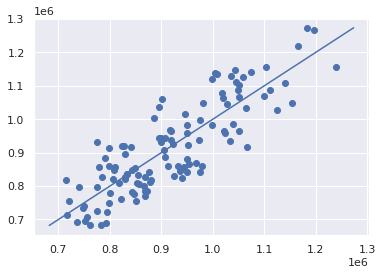

In [401]:
# Stockage des prédictions du modèle pour X_test dans pred_test 
pred_test_GE = lrm_GE.predict(X_test_GE)

# Affichage dans un graphique du nuage de points entre pred_test et y_test, en ajoutant la droite d'équation  y=x
plt.scatter(pred_test_GE, y_test_GE)
plt.plot((y_test_GE.min(), y_test_GE.max()), (y_test_GE.min(), y_test_GE.max()));

**Les points sont proches de la droite, ce qui signifie que la régression est de bonne qualité.**

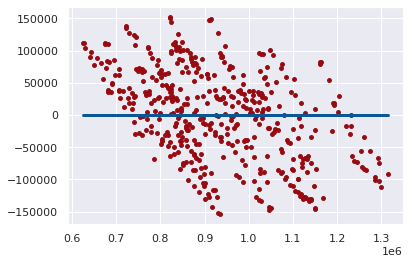

In [402]:
# Calculer les valeurs ajustées (pred_train) puis les résidus (residus) du modèle.lrm

pred_train_GE = lrm_GE.predict(X_train_GE)

residus_GE = pred_train_GE - y_train_GE

# Afficher le nuage des points représentant les résidus en fonction des valeurs de y_train.

plt.scatter(y_train_GE, residus_GE, color='#980a10', s=15)

plt.plot((y_train_GE.min(), y_train_GE.max()), (0, 0), lw=3, color='#0a5798')

**Les résidus sont équitablement répartis des deux côtés de la droite de régression.**

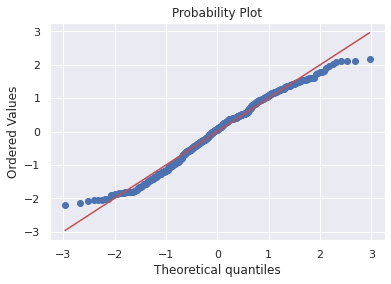

In [403]:
#Centrer réduire les résidus dans un vecteur appelé residus_norm.

residus_norm_GE = (residus_GE-residus_GE.mean())/residus_GE.std()

# Afficher le QQ-Plot en appliquant la fonction stats.probplot à residus_norm.
stats.probplot(residus_norm_GE)

# Ajouter l'argument plot=plt pour pouvoir l'afficher avec matplotlib grâce à la commande plt.show().
stats.probplot(residus_norm_GE, plot = plt)
plt.show()

**L'hypothèse de normalité est plausible, les points s'alignent le long de la droite.**
**Au regard du nombre de variables expplicatives, nous estimons que le modèle fonctionne.**

**L'analyse d'une heatmap nous a permis de confirmer que la variable Consommation est très fortement négativement corrélée aux variables liées à la température, plus la température augmente, plus la consommation diminue.**
**De même, l'analyse d'un pairplot nous confirme qu'une régression linéaire est possible entre la variable Consommation et les variables de Température.**
**Cependant, les variables Date et Heure2 ne permettent pas d'établir de corrélation linéaire avec la Consommation mais de constater une saisonnalité.**

#### **Prediction de la Consommation au 1er semestre 2023 (Grand Est)**

Nous allons considérer une hypothèse de réchauffement climatique de 10% (par rapport aux températures moyennes des 6 dernières années)

In [404]:
X_GE = df_merge_GE.drop(["Consommation", "Heure"], axis = 1)

In [405]:
X_GE = X_GE[X_GE["Month"] <= 6]

In [406]:
X_GE[["TMin (°C)", "TMax (°C)", "TMoy (°C)"]] = X_GE[["TMin (°C)", "TMax (°C)", "TMoy (°C)"]] * 1.1

In [407]:
pred_futur_GE = lrm_GE.predict(X_GE)

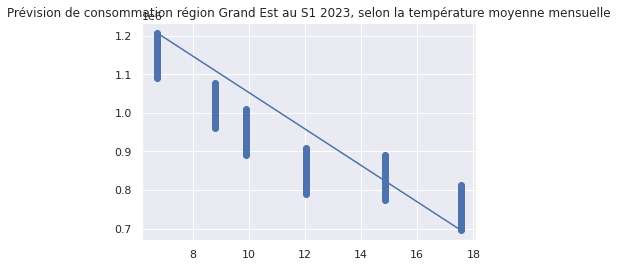

In [408]:
plt.scatter(X_GE["TMoy (°C)"], pred_futur_GE)
plt.plot((X_GE["TMoy (°C)"].min(), X_GE["TMoy (°C)"].max()), (pred_futur_GE.max(), pred_futur_GE.min()));
plt.title("Prévision de consommation région Grand Est au S1 2023, selon la température moyenne mensuelle");

**Comme pour la consommation au niveau national, pour les 6 premiers mois de 2023, avec une hypothèse d'augmentation de 10% de la température moyenne mensuelle, et pour chaque demi-heure, on peut observer une variation de consommation corrélée aux demi-heures.**
**La tendance globale de ces variations horaires reste baissière selon la température moyenne mensuelle.**

#### **Entraînement du modèle sur la région Hauts de France**

In [409]:
#Création variables cibles et explicatives
data_HDF = df_merge_HDF.drop(['Consommation','Heure'], axis = 1)

target_HDF = df_merge_HDF['Consommation']

X_train_HDF, X_test_HDF, y_train_HDF, y_test_HDF = train_test_split(data_HDF, target_HDF, test_size = 0.2)

In [410]:
# Instanciation d'un régresseur lr de la classe LinearRegression.


lrm_HDF = LinearRegression()


# Ajustement du modèle


lrm_HDF.fit(X_train_HDF, y_train_HDF)

LinearRegression()

In [411]:
# Affichage de l'intercept ainsi que des coefficients de chaque variable estimée par le modèle. 

coeffs_HDF = list(lrm_HDF.coef_)
coeffs_HDF.insert(0, lrm_HDF.intercept_)

feats_HDF = list(data_HDF.columns)
feats_HDF.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs_HDF}, index=feats_HDF)

,valeur estimée
intercept,1.911762e+06
Month,-2.346949e+04
TMin (°C),-9.077377e+08
TMax (°C),-9.079173e+08
TMoy (°C),1.815648e+09
Heure2,6.481011e+01


In [412]:
# Affichage du score (R²) du modèle sur l'échantillon d'apprentissage HDF

print(lrm_HDF.score(X_train_HDF, y_train_HDF))

# Affichage du score obtenu par validation croisée grâce à la fonction cross_val_score().

print(cross_val_score(lrm_HDF, X_train_HDF, y_train_HDF).mean())

0.803375380038606
0.7968068755935805


**Les scores obtenus sur l'échantillon d'apprentissage sont satisfaisants, aussi bien pour le R² que pour la validation croisée.**

In [413]:
# Affichage du score du modèle sur l'ensemble de test HDF

print(lrm_HDF.score(X_test_HDF, y_test_HDF))

0.8007738759055315


**Le score obtenu sur l'échantillon de test est également satisfaisant et ne suppose pas de problème d'overfitting.**

In [414]:
# Stockage des prédictions du modèle pour X_test dans pred_test 

pred_test_HDF = lrm_HDF.predict(X_test_HDF)

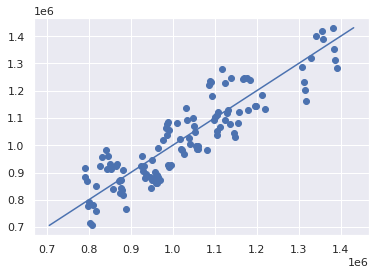

In [415]:
# Affichage dans un graphique du nuage de points entre pred_test et y_test, en ajoutant la droite d'équation  y=x

plt.scatter(pred_test_HDF, y_test_HDF)
plt.plot((y_test_HDF.min(), y_test_HDF.max()), (y_test_HDF.min(), y_test_HDF.max()));

**Les points sont proches de la droite, ce qui signifie que la régression est de bonne qualité.**

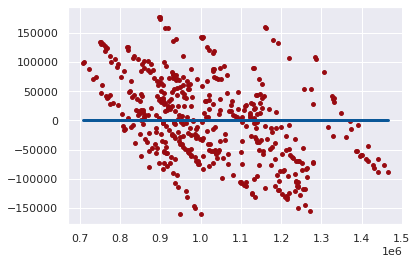

In [416]:
# Calculer les valeurs ajustées (pred_train) puis les résidus (residus) du modèle.lrm

pred_train_HDF = lrm_HDF.predict(X_train_HDF)

residus_HDF = pred_train_HDF - y_train_HDF

# Afficher le nuage des points représentant les résidus en fonction des valeurs de y_train.

plt.scatter(y_train_HDF, residus_HDF, color='#980a10', s=15)

plt.plot((y_train_HDF.min(), y_train_HDF.max()), (0, 0), lw=3, color='#0a5798')

**Les résidus sont équitablement répartis des deux côtés de la droite de régression.**

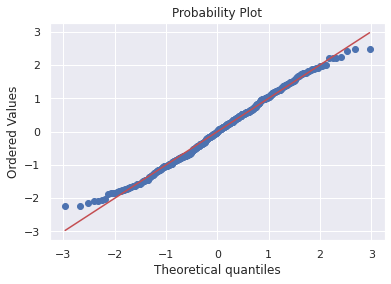

In [417]:
#Centrer réduire les résidus dans un vecteur appelé residus_norm.

residus_norm_HDF = (residus_HDF-residus_HDF.mean())/residus_HDF.std()

# Afficher le QQ-Plot en appliquant la fonction stats.probplot à residus_norm.


stats.probplot(residus_norm_HDF)

# Ajouter l'argument plot=plt pour pouvoir l'afficher avec matplotlib grâce à la commande plt.show().

stats.probplot(residus_norm_HDF, plot = plt)

plt.show()

**L'hypothèse de normalité est plausible, les points s'alignent le long de la droite.**

**L'analyse d'une heatmap nous a permis de confirmer que la variable Consommation est très fortement négativement corrélée aux variables liées à la température, plus la température augmente, plus la consommation diminue.**

**De même, l'analyse d'un pairplot nous confirme qu'une régression linéaire est possible entre la variable Consommation et les variables de Température.**

**Cependant, les variables Date et Heure2 ne permettent pas d'établir de corrélation linéaire avec la Consommation mais de constater une saisonnalité.**

#### **Prediction de la Consommation au 1er semestre 2023 (Hauts de France)**

In [418]:
df_merge_HDF

,Month,Heure,TMin (°C),TMax (°C),TMoy (°C),Consommation,Heure2
0,1,00:00,4.012796,9.996989,7.004892,1329682.0,0
1,1,00:30,4.012796,9.996989,7.004892,1316067.0,30
2,1,01:00,4.012796,9.996989,7.004892,1278922.0,60
3,1,01:30,4.012796,9.996989,7.004892,1287343.0,90
4,1,02:00,4.012796,9.996989,7.004892,1257137.0,120
...,...,...,...,...,...,...,...
571,12,21:30,5.317484,11.081097,8.199290,1019986.0,1290
572,12,22:00,5.317484,11.081097,8.199290,1015620.0,1320
573,12,22:30,5.317484,11.081097,8.199290,1000808.0,1350
574,12,23:00,5.317484,11.081097,8.199290,1004642.0,1380


In [419]:
X_futur_HDF = df_merge_HDF.drop(["Consommation", "Heure"], axis = 1)

In [420]:
X_futur_HDF = X_futur_HDF[X_futur_HDF["Month"] <= 6]

In [421]:
X_futur_HDF[["TMin (°C)", "TMax (°C)", "TMoy (°C)"]] = X_futur_HDF[["TMin (°C)", "TMax (°C)", "TMoy (°C)"]] * 1.1

In [422]:
pred_futur_HDF = lrm_HDF.predict(X_futur_HDF)

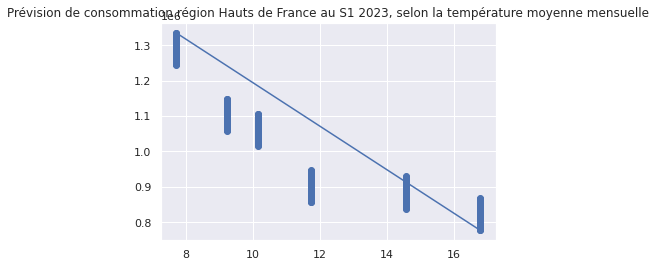

In [423]:
plt.scatter(X_futur_HDF["TMoy (°C)"], pred_futur_HDF)
plt.plot((X_futur_HDF["TMoy (°C)"].min(), X_futur_HDF["TMoy (°C)"].max()), (pred_futur_HDF.max(), pred_futur_HDF.min()));
plt.title("Prévision de consommation région Hauts de France au S1 2023, selon la température moyenne mensuelle");

**Comme pour la consommation au niveau national, et sur la région Grand Est, pour les 6 premiers mois de 2023, avec une hypothèse d'augmentation de 10% de la température moyenne mensuelle, et pour chaque demi-heure, on peut observer une variation de consommation corrélée aux demi-heures. **
**La tendance globale de ces variations horaires reste baissière selon la température moyenne mensuelle.**

#### **Entraînement du modèle sur la région Ile de France**

In [424]:
#Création variables cibles et explicatives
data_IDF = df_merge_IDF.drop(['Consommation','Heure'], axis = 1)

target_IDF = df_merge_IDF['Consommation']

X_train_IDF, X_test_IDF, y_train_IDF, y_test_IDF = train_test_split(data_IDF, target_IDF, test_size = 0.2)

In [425]:
# Instanciation d'un régresseur lr de la classe LinearRegression.


lrm_IDF = LinearRegression()


# Ajustement du modèle


lrm_IDF.fit(X_train_IDF, y_train_IDF)

LinearRegression()

In [426]:
# Affichage de l'intercept ainsi que des coefficients de chaque variable estimée par le modèle. 

coeffs_IDF = list(lrm_IDF.coef_)
coeffs_IDF.insert(0, lrm_IDF.intercept_)

feats_IDF = list(data_IDF.columns)
feats_IDF.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs_IDF}, index=feats_IDF)

,valeur estimée
intercept,2.782701e+06
Month,-3.539181e+04
TMin (°C),-8.364248e+07
TMax (°C),-8.390709e+07
TMoy (°C),1.675321e+08
Heure2,2.868773e+02


In [427]:
# Affichage du score (R²) du modèle sur l'échantillon d'apprentissage IDF

print(lrm_IDF.score(X_train_IDF, y_train_IDF))

# Affichage du score obtenu par validation croisée grâce à la fonction cross_val_score().

print(cross_val_score(lrm_IDF, X_train_IDF, y_train_IDF).mean())

0.8159360303216828
0.809671564911655


**Les scores obtenus sur l'échantillon d'apprentissage sont satisfaisants, aussi bien pour le R² que pour la validation croisée.**

In [428]:
# Affichage du score du modèle sur l'ensemble de test IDF

print(lrm_IDF.score(X_test_IDF, y_test_IDF))

0.7915437728316855


**Le score obtenu sur l'échantillon de test est également satisfaisant et ne suppose pas de problème d'overfitting.**

In [429]:
# Stockage des prédictions du modèle pour X_test dans pred_test 

pred_test_IDF = lrm_IDF.predict(X_test_IDF)

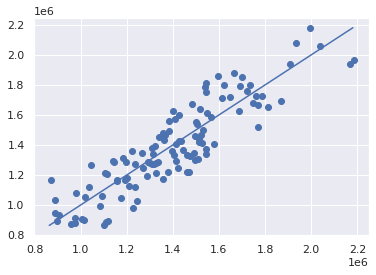

In [430]:
# Affichage dans un graphique du nuage de points entre pred_test et y_test, en ajoutant la droite d'équation  y=x

plt.scatter(pred_test_IDF, y_test_IDF)
plt.plot((y_test_IDF.min(), y_test_IDF.max()), (y_test_IDF.min(), y_test_IDF.max()));

**Les points sont proches de la droite, ce qui signifie que la régression est de bonne qualité.**

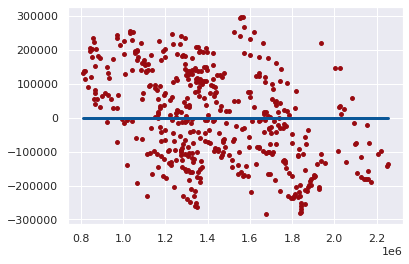

In [431]:
# Calculer les valeurs ajustées (pred_train) puis les résidus (residus) du modèle.lrm

pred_train_IDF = lrm_IDF.predict(X_train_IDF)

residus_IDF = pred_train_IDF - y_train_IDF

# Afficher le nuage des points représentant les résidus en fonction des valeurs de y_train.

plt.scatter(y_train_IDF, residus_IDF, color='#980a10', s=15)

plt.plot((y_train_IDF.min(), y_train_IDF.max()), (0, 0), lw=3, color='#0a5798')

**Les résidus sont équitablement répartis des deux côtés de la droite de régression.**

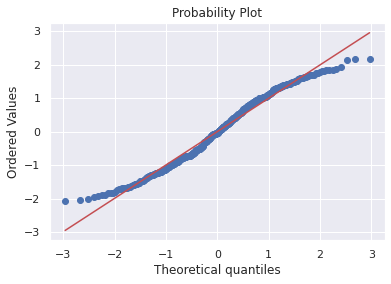

In [432]:
#Centrer réduire les résidus dans un vecteur appelé residus_norm.

residus_norm_IDF = (residus_IDF-residus_IDF.mean())/residus_IDF.std()

# Afficher le QQ-Plot en appliquant la fonction stats.probplot à residus_norm.


stats.probplot(residus_norm_IDF)

# Ajouter l'argument plot=plt pour pouvoir l'afficher avec matplotlib grâce à la commande plt.show().

stats.probplot(residus_norm_IDF, plot = plt)

plt.show()

**Observation : L'hypothèse de normalité est plausible, les points s'alignent le long de la droite.**

**L'analyse d'une heatmap nous a permis de confirmer que la variable Consommation est très fortement négativement corrélée aux variables liées à la température, plus la température augmente, plus la consommation diminue.**

**De même, l'analyse d'un pairplot nous confirme qu'une régression linéaire est possible entre la variable Consommation et les variables de Température.**

**Cependant, les variables Date et Heure2 ne permettent pas d'établir de corrélation linéaire avec la Consommation mais de constater une saisonnalité.**

#### **Prediction de la Consommation au 1er semestre 2023 (Ile de France)**

In [433]:
X_futur_IDF = df_merge_IDF.drop(["Consommation", "Heure"], axis = 1)

In [434]:
X_futur_IDF = X_futur_IDF[X_futur_IDF["Month"] <= 6]

In [435]:
X_futur_IDF[["TMin (°C)", "TMax (°C)", "TMoy (°C)"]] = X_futur_IDF[["TMin (°C)", "TMax (°C)", "TMoy (°C)"]] * 1.1

In [436]:
pred_futur_IDF = lrm_IDF.predict(X_futur_IDF)

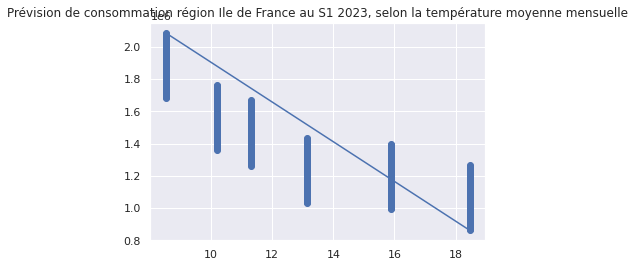

In [437]:
plt.scatter(X_futur_IDF["TMoy (°C)"], pred_futur_IDF)
plt.plot((X_futur_IDF["TMoy (°C)"].min(), X_futur_IDF["TMoy (°C)"].max()), (pred_futur_IDF.max(), pred_futur_IDF.min()));
plt.title("Prévision de consommation région Ile de France au S1 2023, selon la température moyenne mensuelle");

**Observation : Comme pour la consommation au niveau national, et sur les régions Grand Est et Hauts de France, pour les 6 premiers mois de 2023, avec une hypothèse d'augmentation de 10% de la température moyenne mensuelle, et pour chaque demi-heure, on peut observer une variation de consommation corrélée aux demi-heures.**
**La tendance globale de ces variations horaires reste baissière selon la température moyenne mensuelle.**

### **Conclusion Générale**

**De manière générale, il existe une forte corrélation entre la température et la consommation au niveau national.**
**Que l'on se place au niveau national ou régional, la consommation est corrélée négativement à la température.** 

## 3/ Régression linéaire - Production

### Prédiction de l'évolution de la production selon le mix énergétique et selon l'année

#### Evolution des 3 variables du mix énergétique de 2013 à 2021 (Energie Nucléaire, énergie thermique, énergies renouvelables)

In [438]:
df_prod_mix_energie = df_energy[['Date', 'Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies']]

In [439]:
df_prod_mix_energie

,Date,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies
0,2013-01-01,240.0,4993.0,175.0,0.0,427.0,0.0,142.0
1,2013-01-01,127.0,0.0,182.0,0.0,0.0,0.0,32.0
2,2013-01-01,236.0,0.0,106.0,0.0,105.0,0.0,12.0
3,2013-01-01,319.0,9137.0,1109.0,0.0,1418.0,0.0,57.0
4,2013-01-01,685.0,0.0,16.0,0.0,0.0,0.0,142.0
...,...,...,...,...,...,...,...,...
1875343,2021-11-30,1486.0,0.0,35.0,0.0,544.0,0.0,89.0
1875344,2021-11-30,83.0,7831.0,1022.0,0.0,1.0,0.0,53.0
1875345,2021-11-30,173.0,0.0,635.0,0.0,32.0,0.0,47.0
1875346,2021-11-30,275.0,0.0,672.0,0.0,90.0,-1.0,50.0


In [440]:
import datetime

df_prod_mix_energie['Date'] = pd.to_datetime(df_prod_mix_energie['Date'])

In [441]:
df_prod_mix_energie['Date'] = df_energy['Date'].dt.year 

In [442]:
reno = {'Nucléaire':'Production Nucléaire',
        'Thermique':'Production Thermique'}

# On renomme les variables grâce à la méthode rename
df_prod_mix_energie = df_prod_mix_energie.rename(reno, axis = 1)

df_prod_mix_energie

,Date,Production Thermique,Production Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies
0,2013,240.0,4993.0,175.0,0.0,427.0,0.0,142.0
1,2013,127.0,0.0,182.0,0.0,0.0,0.0,32.0
2,2013,236.0,0.0,106.0,0.0,105.0,0.0,12.0
3,2013,319.0,9137.0,1109.0,0.0,1418.0,0.0,57.0
4,2013,685.0,0.0,16.0,0.0,0.0,0.0,142.0
...,...,...,...,...,...,...,...,...
1875343,2021,1486.0,0.0,35.0,0.0,544.0,0.0,89.0
1875344,2021,83.0,7831.0,1022.0,0.0,1.0,0.0,53.0
1875345,2021,173.0,0.0,635.0,0.0,32.0,0.0,47.0
1875346,2021,275.0,0.0,672.0,0.0,90.0,-1.0,50.0


In [443]:
df_prod_mix_energie['Production Renouvelable'] = df_prod_mix_energie['Eolien'] + df_prod_mix_energie['Solaire'] + df_prod_mix_energie['Hydraulique'] + df_prod_mix_energie['Pompage'] + df_prod_mix_energie['Bioénergies']

In [444]:
df_prod_mix_energie = df_prod_mix_energie.drop(['Eolien', 'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies'], axis = 1)

In [445]:
df_prod_mix_energie

,Date,Production Thermique,Production Nucléaire,Production Renouvelable
0,2013,240.0,4993.0,744.0
1,2013,127.0,0.0,214.0
2,2013,236.0,0.0,223.0
3,2013,319.0,9137.0,2584.0
4,2013,685.0,0.0,158.0
...,...,...,...,...
1875343,2021,1486.0,0.0,668.0
1875344,2021,83.0,7831.0,1076.0
1875345,2021,173.0,0.0,714.0
1875346,2021,275.0,0.0,811.0


In [446]:
df_prod_mix_energie = df_prod_mix_energie.groupby(by = 'Date').sum()

In [447]:
df_prod_mix_energie

,Production Thermique,Production Nucléaire,Production Renouvelable
Date,,,
2013,87261288.0,806364225.0,187656346.0
2014,49924365.0,831008785.0,179517516.0
2015,66714884.0,832908808.0,175856211.0
2016,88787737.0,767408645.0,188999321.0
2017,105507116.0,757772631.0,176771711.0
2018,75986264.0,785967028.0,216537478.0
2019,82152897.0,758459526.0,217295395.0
2020,73543103.0,670460374.0,240769122.0
2021,63973035.0,658052510.0,209159735.0


In [448]:
df_prod_mix_energie = df_prod_mix_energie.reset_index()

In [449]:
df_prod_mix_energie

,Date,Production Thermique,Production Nucléaire,Production Renouvelable
0,2013,87261288.0,806364225.0,187656346.0
1,2014,49924365.0,831008785.0,179517516.0
2,2015,66714884.0,832908808.0,175856211.0
3,2016,88787737.0,767408645.0,188999321.0
4,2017,105507116.0,757772631.0,176771711.0
5,2018,75986264.0,785967028.0,216537478.0
6,2019,82152897.0,758459526.0,217295395.0
7,2020,73543103.0,670460374.0,240769122.0
8,2021,63973035.0,658052510.0,209159735.0


##### Production nucléaire

In [450]:
data_mix_energie_1 =  df_prod_mix_energie[["Date"]]

data_mix_energie_1

,Date
0,2013
1,2014
2,2015
3,2016
4,2017
5,2018
6,2019
7,2020
8,2021


In [451]:
target_mix_energie_1 = df_prod_mix_energie['Production Nucléaire']

target_mix_energie_1

0    806364225.0
1    831008785.0
2    832908808.0
3    767408645.0
4    757772631.0
5    785967028.0
6    758459526.0
7    670460374.0
8    658052510.0
Name: Production Nucléaire, dtype: float64

In [452]:
X_train_mix_1, X_test_mix_1, y_train_mix_1, y_test_mix_1 = train_test_split(data_mix_energie_1, target_mix_energie_1, test_size = 0.2)

In [453]:
# Instanciation d'un régresseur lr de la classe LinearRegression.


lrm_mix_energie = LinearRegression()


# Ajustement du modèle


lrm_mix_energie.fit(X_train_mix_1, y_train_mix_1)

LinearRegression()

In [454]:
# Affichage de l'intercept ainsi que des coefficients de chaque variable estimée par le modèle. 


coeffs_mix = list(lrm_mix_energie.coef_)
coeffs_mix.insert(0, lrm_mix_energie.intercept_)

feats_mix = list(data_mix_energie_1.columns)
feats_mix.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs_mix}, index=feats_mix)

,valeur estimée
intercept,4.964579e+10
Date,-2.423113e+07


In [455]:
# Affichage du score (R²) du modèle sur l'échantillon d'apprentissage 

print(lrm_mix_energie.score(X_train_mix_1, y_train_mix_1))

# Affichage du score obtenu par validation croisée grâce à la fonction cross_val_score().

print(cross_val_score(lrm_mix_energie, X_train_mix_1, y_train_mix_1).mean())

0.8312455157473178
nan


**Le score obtenu sur l'échantillon d'apprentissage est satisfaisant.**
**Il n'y a pas assez de points pour établir un score par validation croisée.**

In [456]:
# Affichage du score du modèle sur l'ensemble de test

print(lrm_mix_energie.score(X_test_mix_1, y_test_mix_1))

-2.434680805775519


**Le score obtenu n'est probablement pas significatif dû au faible nombre de points.**

In [457]:
# Stockage des prédictions du modèle pour X_test dans pred_test 

pred_test_mix_energie = lrm_mix_energie.predict(X_test_mix_1)

pred_test_mix_energie

array([8.68523125e+08, 7.71598600e+08])

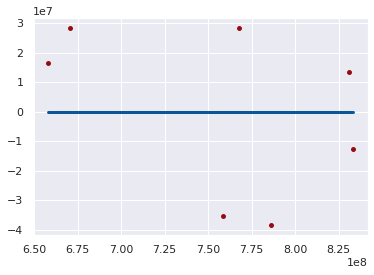

In [458]:
# Calculer les valeurs ajustées (pred_train) puis les résidus (residus) du modèle.lrm

pred_train_mix_1 = lrm_mix_energie.predict(X_train_mix_1)

residus_mix_1 = pred_train_mix_1 - y_train_mix_1

# Afficher le nuage des points représentant les résidus en fonction des valeurs de y_train.

plt.scatter(y_train_mix_1, residus_mix_1, color='#980a10', s=15)

plt.plot((y_train_mix_1.min(), y_train_mix_1.max()), (0, 0), lw=3, color='#0a5798')

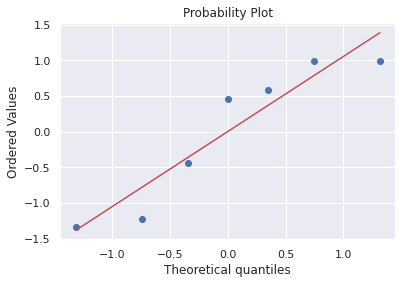

In [459]:
#Centrer réduire les résidus dans un vecteur appelé residus_norm.

residus_norm_mix_1 = (residus_mix_1-residus_mix_1.mean())/residus_mix_1.std()

# Afficher le QQ-Plot en appliquant la fonction stats.probplot à residus_norm.


stats.probplot(residus_norm_mix_1)

# Ajouter l'argument plot=plt pour pouvoir l'afficher avec matplotlib grâce à la commande plt.show().

stats.probplot(residus_norm_mix_1, plot = plt)

plt.show()

**L'hypothèse de normalité est plausible, les points s'alignent approximativement le long de la droite.**

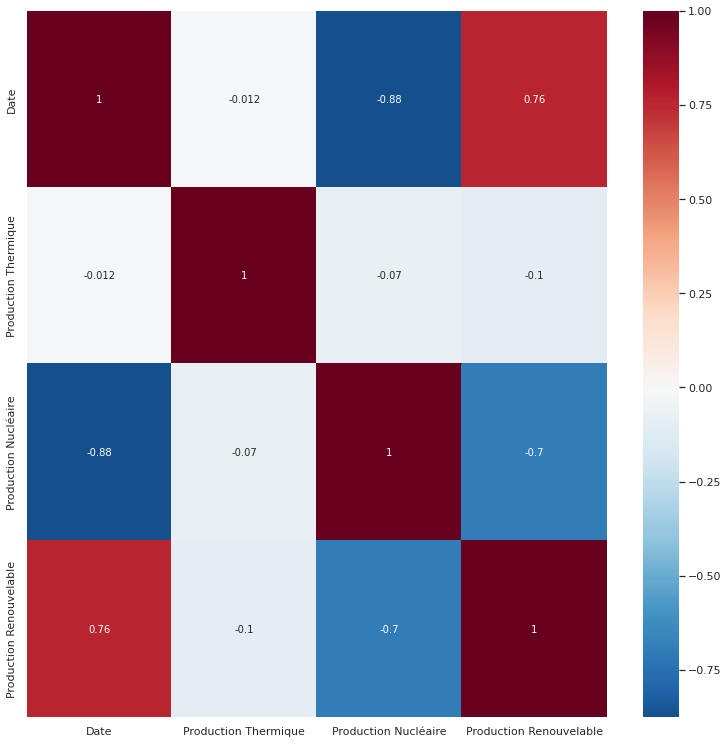

In [460]:
# Afficher une heatmap des corrélations entre chaque paire de variables de df, avec 0 pour centre et 
# utiliser la palette 'RdBu_r'.

plt.figure(figsize=(13, 13))

sns.heatmap(df_prod_mix_energie.corr(), annot = True, cmap = 'RdBu_r', center = 0)

**On peut observer que la production nucléaire est négativement corrélée à la date, ce qui signifie que plus le temps passe, plus le niveau de production nucléaire diminue.**
**La Production Renouvelable quant à elle est positivement corrélée, et augmente avec le temps.**

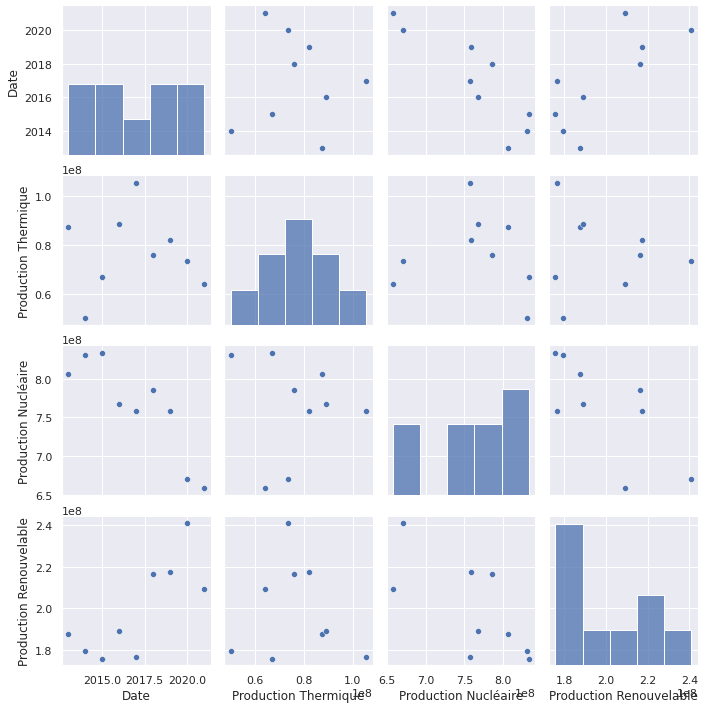

In [461]:
# Afficher une matrice des nuages de points entre les variables 'curb-weight', 'horsepower', 'highway-mpg', 'height', 
# 'bore', 'width' et 'price' de df.


sns.pairplot(df_prod_mix_energie[['Date', 'Production Thermique', 'Production Nucléaire', 'Production Renouvelable']]);

**Il est possible de constater à ce stade que les variables Production Nucléaire, Production Renouvelable et date sont corrélées linéairement, et qu'il n'est pas possible de tracer une tendance claire pour la Production Thermique.**

### Prédiction de l'hypothèse d'évolution dans le temps des productions du mix énergétique

#### Prédiction de l'hypothèse de l'évolution de la production nucléaire de 2025 à 2070

In [462]:
X_futur_nucleaire = pd.DataFrame([2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070])

In [463]:
pred_futur_nucleaire = lrm_mix_energie.predict(X_futur_nucleaire)

pred_futur_nucleaire

array([ 5.77749550e+08,  4.56593894e+08,  3.35438238e+08,  2.14282582e+08,
        9.31269254e+07, -2.80287308e+07, -1.49184387e+08, -2.70340043e+08,
       -3.91495699e+08, -5.12651356e+08])

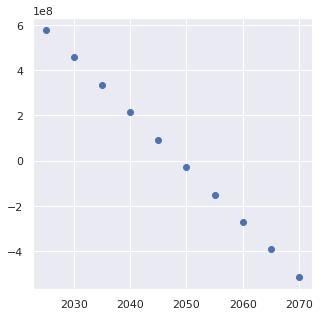

In [464]:
plt.figure(figsize=(5,5))
plt.scatter(X_futur_nucleaire, pred_futur_nucleaire)

#### Part du nucléaire en 2021 et prévision du nucléaire en 2050 et 2055


In [465]:
target_mix_energie_1

0    806364225.0
1    831008785.0
2    832908808.0
3    767408645.0
4    757772631.0
5    785967028.0
6    758459526.0
7    670460374.0
8    658052510.0
Name: Production Nucléaire, dtype: float64

In [466]:
pred_futur_nucleaire

array([ 5.77749550e+08,  4.56593894e+08,  3.35438238e+08,  2.14282582e+08,
        9.31269254e+07, -2.80287308e+07, -1.49184387e+08, -2.70340043e+08,
       -3.91495699e+08, -5.12651356e+08])

In [467]:
X_futur_nucleaire

,0
0,2025
1,2030
2,2035
3,2040
4,2045
5,2050
6,2055
7,2060
8,2065
9,2070


**Part du nucléaire en 2021 rapporté à la prévision du nucléaire en 2050 (dernière valeur positive avant que la prévision ne devienne négative)**

In [468]:
8.92935481e+07 / 658052510.0 * 100

13.5693651711776

**Part du nucléaire en 2021 rapporté à la prévision du nucléaire en 2055 (première valeur négative => où la prévision devient négative)**

In [469]:
-1.17189384e+07 / 658052510.0 * 100

-1.7808515615266023

**Observation :**

Selon cette hypothèse de prédiction :

En 2050, la part du nucléaire représentera 13% de son niveau de production de 2021 
En 2055, il n'y aura plus de production nucléaire

**Observation 2 :** les outputs relatifs à la prédiction sont susceptibles de varier en raison de la randomisation lors de la séparation en ensembles d'entrainement et de test.

##### Production Renouvelable

In [470]:
data_mix_energie_2 = df_prod_mix_energie[["Date"]]


In [471]:
data_mix_energie_2

,Date
0,2013
1,2014
2,2015
3,2016
4,2017
5,2018
6,2019
7,2020
8,2021


In [472]:
target_mix_energie_2 = df_prod_mix_energie['Production Renouvelable']


In [473]:
target_mix_energie_2

0    187656346.0
1    179517516.0
2    175856211.0
3    188999321.0
4    176771711.0
5    216537478.0
6    217295395.0
7    240769122.0
8    209159735.0
Name: Production Renouvelable, dtype: float64

In [474]:
X_train_mix_2, X_test_mix_2, y_train_mix_2, y_test_mix_2 = train_test_split(data_mix_energie_2, target_mix_energie_2, test_size = 0.2)

In [475]:
# Instanciation d'un régresseur lr de la classe LinearRegression.


lrm_mix_energie_2 = LinearRegression()


# Ajustement du modèle


lrm_mix_energie_2.fit(X_train_mix_2, y_train_mix_2)

LinearRegression()

In [476]:
# Affichage du score (R²) du modèle sur l'échantillon d'apprentissage 

print(lrm_mix_energie_2.score(X_train_mix_2, y_train_mix_2))

# Affichage du score obtenu par validation croisée grâce à la fonction cross_val_score().

print(cross_val_score(lrm_mix_energie_2, X_train_mix_2, y_train_mix_2).mean())

0.5407641626969717
nan


**Observation : Le score obtenu sur l'échantillon d'apprentissage est correct.
Il n'y a pas assez de points pour établir un score par validation croisée.**

In [477]:
print(lrm_mix_energie_2.score(X_test_mix_2, y_test_mix_2))

0.7662486688553963


**Observation : le score obtenu n'est probablement pas significatif dû au faible nombre de points**

In [478]:
# Stockage des prédictions du modèle pour X_test dans pred_test 

pred_test_mix_energie_2 = lrm_mix_energie_2.predict(X_test_mix_2)


In [479]:
pred_test_mix_energie_2

array([2.03882590e+08, 1.79346358e+08])

#### Prédiction de l'hypothèse d'évolution de la production renouvelable de 2025 à 2070

In [480]:
X_futur_renouvelable = pd.DataFrame([2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070])

In [481]:
X_futur_renouvelable

,0
0,2025
1,2030
2,2035
3,2040
4,2045
5,2050
6,2055
7,2060
8,2065
9,2070


In [482]:
pred_futur_renouvelable = lrm_mix_energie_2.predict(X_futur_renouvelable)

pred_futur_renouvelable

array([2.46820997e+08, 2.77491287e+08, 3.08161578e+08, 3.38831868e+08,
       3.69502159e+08, 4.00172449e+08, 4.30842740e+08, 4.61513030e+08,
       4.92183321e+08, 5.22853611e+08])

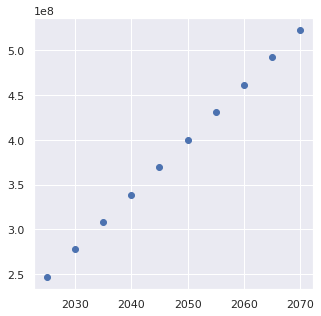

In [483]:
plt.figure(figsize=(5,5))
plt.scatter(X_futur_renouvelable, pred_futur_renouvelable)

#### Part du renouvelable en 2021 et prévision du renouvelable en 2070

In [484]:
target_mix_energie_2

0    187656346.0
1    179517516.0
2    175856211.0
3    188999321.0
4    176771711.0
5    216537478.0
6    217295395.0
7    240769122.0
8    209159735.0
Name: Production Renouvelable, dtype: float64

In [485]:
pred_futur_renouvelable

array([2.46820997e+08, 2.77491287e+08, 3.08161578e+08, 3.38831868e+08,
       3.69502159e+08, 4.00172449e+08, 4.30842740e+08, 4.61513030e+08,
       4.92183321e+08, 5.22853611e+08])

In [486]:
4.20178605e+08 / 209159735.0 * 100

200.88885893836115

**Observation :**

Selon cette hypothèse de prédiction :

En 2070, la part du renouvelable pourrait augmenter de 200% par rapport à son niveau de production de 2021, c'est-à-dire qu'elle pourrait quasiment doubler.


**Observation 2 :** les outputs relatifs à la prédiction sont susceptibles de varier en raison de la randomisation lors de la séparation en ensembles d'entrainement et de test.

#### Production Thermique

**Observation :**

Selon les observations précédentes, il n'est pas possible de tracer une tendance claire concernant l'évolution dans le temps de la production Thermique

### **Conclusion Générale**

**Selon les hypothèses calculées, la part de la production nucléaire tend à diminuer régulièrement dans le temps.**
**La part de la production renouvelable suit la tendance inverse et augmente avec le temps.**
**La tendance d'évolution dans le temps de la part d'énergie thermique n'est pas clairement déterminable.**